## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_stem_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  


In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX
0,0.85,12.233545,19.097736
1,1.00,14.964220,17.704655
2,1.00,15.329449,17.559893
3,0.97,15.392742,20.676994
4,1.00,17.944009,21.851387


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_stem_kg_m2
0,1.792
1,2.496
2,2.546
3,2.643
4,2.643


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9185999086295552, 0.9369953363636283, 0.9150460326248963]
    Mean: 0.924
    Std: 0.010

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.36006591 0.27330416 0.29216985]
    Mean: 0.309
    Std: 0.037

 --------------------
Mean absolute error (MAE): 

    Scores: [0.29928595677954806, 0.20170586872802063, 0.23502185502560705]
    Mean: 0.245
    Std: 0.040

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8565852435738817                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.12940676640076693                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.029546354081746842                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 189          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.3060599314998912                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8565852435738817
Gamma: 0.12940676640076693
Learning_rate: 0.029546354081746842
Max_depth: 3
N_estimators: 189
Subsample: 0.3060599314998912


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.77348	validation_1-rmse:1.73983
[1]	validation_0-rmse:1.72537	validation_1-rmse:1.69780
[2]	validation_0-rmse:1.68210	validation_1-rmse:1.65861
[3]	validation_0-rmse:1.64101	validation_1-rmse:1.62302
[4]	validation_0-rmse:1.60239	validation_1-rmse:1.59050
[5]	validation_0-rmse:1.56538	validation_1-rmse:1.55643
[6]	validation_0-rmse:1.52547	validation_1-rmse:1.52208
[7]	validation_0-rmse:1.49075	validation_1-rmse:1.48909
[8]	validation_0-rmse:1.45355	validation_1-rmse:1.45712
[9]	validation_0-rmse:1.41691	validation_1-rmse:1.42370


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.38381	validation_1-rmse:1.39352
[11]	validation_0-rmse:1.35137	validation_1-rmse:1.36366
[12]	validation_0-rmse:1.31950	validation_1-rmse:1.33489
[13]	validation_0-rmse:1.28786	validation_1-rmse:1.30606
[14]	validation_0-rmse:1.25501	validation_1-rmse:1.27804
[15]	validation_0-rmse:1.22236	validation_1-rmse:1.24932
[16]	validation_0-rmse:1.19294	validation_1-rmse:1.22478
[17]	validation_0-rmse:1.16044	validation_1-rmse:1.19942
[18]	validation_0-rmse:1.12990	validation_1-rmse:1.17396
[19]	validation_0-rmse:1.10265	validation_1-rmse:1.15057
[20]	validation_0-rmse:1.07540	validation_1-rmse:1.12817
[21]	validation_0-rmse:1.04716	validation_1-rmse:1.10664
[22]	validation_0-rmse:1.02167	validation_1-rmse:1.08678
[23]	validation_0-rmse:0.99666	validation_1-rmse:1.06506
[24]	validation_0-rmse:0.97283	validation_1-rmse:1.04550
[25]	validation_0-rmse:0.95064	validation_1-rmse:1.02891
[26]	validation_0-rmse:0.92964	validation_1-rmse:1.01031
[27]	validation_0-rmse:0.90951	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76327	validation_1-rmse:1.78459
[1]	validation_0-rmse:1.71683	validation_1-rmse:1.74161
[2]	validation_0-rmse:1.67027	validation_1-rmse:1.70309
[3]	validation_0-rmse:1.62753	validation_1-rmse:1.66049
[4]	validation_0-rmse:1.58651	validation_1-rmse:1.62526
[5]	validation_0-rmse:1.54700	validation_1-rmse:1.58589
[6]	validation_0-rmse:1.50787	validation_1-rmse:1.55034
[7]	validation_0-rmse:1.47066	validation_1-rmse:1.51605


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43784	validation_1-rmse:1.48759
[9]	validation_0-rmse:1.40444	validation_1-rmse:1.45393
[10]	validation_0-rmse:1.37223	validation_1-rmse:1.42400
[11]	validation_0-rmse:1.33580	validation_1-rmse:1.38751
[12]	validation_0-rmse:1.30003	validation_1-rmse:1.35243
[13]	validation_0-rmse:1.26749	validation_1-rmse:1.32224
[14]	validation_0-rmse:1.23689	validation_1-rmse:1.29289
[15]	validation_0-rmse:1.20569	validation_1-rmse:1.26400
[16]	validation_0-rmse:1.17604	validation_1-rmse:1.23383
[17]	validation_0-rmse:1.14594	validation_1-rmse:1.20547
[18]	validation_0-rmse:1.11712	validation_1-rmse:1.17984
[19]	validation_0-rmse:1.08821	validation_1-rmse:1.15265
[20]	validation_0-rmse:1.06084	validation_1-rmse:1.12428
[21]	validation_0-rmse:1.03592	validation_1-rmse:1.09870
[22]	validation_0-rmse:1.01204	validation_1-rmse:1.07308
[23]	validation_0-rmse:0.98771	validation_1-rmse:1.05128
[24]	validation_0-rmse:0.96286	validation_1-rmse:1.02467
[25]	validation_0-rmse:0.94025	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75384	validation_1-rmse:1.81601
[1]	validation_0-rmse:1.70754	validation_1-rmse:1.76647
[2]	validation_0-rmse:1.66234	validation_1-rmse:1.71756
[3]	validation_0-rmse:1.61965	validation_1-rmse:1.67081
[4]	validation_0-rmse:1.58162	validation_1-rmse:1.62937
[5]	validation_0-rmse:1.54168	validation_1-rmse:1.58763
[6]	validation_0-rmse:1.50312	validation_1-rmse:1.54520
[7]	validation_0-rmse:1.46466	validation_1-rmse:1.50798
[8]	validation_0-rmse:1.42711	validation_1-rmse:1.46890
[9]	validation_0-rmse:1.39240	validation_1-rmse:1.43282
[10]	validation_0-rmse:1.36190	validation_1-rmse:1.40241


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.32903	validation_1-rmse:1.36596
[12]	validation_0-rmse:1.29624	validation_1-rmse:1.33099
[13]	validation_0-rmse:1.26309	validation_1-rmse:1.29551
[14]	validation_0-rmse:1.23200	validation_1-rmse:1.26186
[15]	validation_0-rmse:1.20309	validation_1-rmse:1.23375
[16]	validation_0-rmse:1.17358	validation_1-rmse:1.20230
[17]	validation_0-rmse:1.14375	validation_1-rmse:1.17080
[18]	validation_0-rmse:1.11894	validation_1-rmse:1.14526
[19]	validation_0-rmse:1.09261	validation_1-rmse:1.11655
[20]	validation_0-rmse:1.06624	validation_1-rmse:1.08804
[21]	validation_0-rmse:1.04487	validation_1-rmse:1.06476
[22]	validation_0-rmse:1.02233	validation_1-rmse:1.04240
[23]	validation_0-rmse:0.99772	validation_1-rmse:1.01698
[24]	validation_0-rmse:0.97473	validation_1-rmse:0.99265
[25]	validation_0-rmse:0.95260	validation_1-rmse:0.96872
[26]	validation_0-rmse:0.93166	validation_1-rmse:0.94637
[27]	validation_0-rmse:0.90944	validation_1-rmse:0.92444
[28]	validation_0-rmse:0.88695	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76053	validation_1-rmse:1.79323
[1]	validation_0-rmse:1.71582	validation_1-rmse:1.74604
[2]	validation_0-rmse:1.67136	validation_1-rmse:1.70028
[3]	validation_0-rmse:1.63073	validation_1-rmse:1.65621
[4]	validation_0-rmse:1.59291	validation_1-rmse:1.61955
[5]	validation_0-rmse:1.55265	validation_1-rmse:1.57678
[6]	validation_0-rmse:1.51747	validation_1-rmse:1.53756


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.48283	validation_1-rmse:1.50185
[8]	validation_0-rmse:1.44657	validation_1-rmse:1.46567
[9]	validation_0-rmse:1.40850	validation_1-rmse:1.42465
[10]	validation_0-rmse:1.37929	validation_1-rmse:1.39358
[11]	validation_0-rmse:1.35010	validation_1-rmse:1.36070
[12]	validation_0-rmse:1.31852	validation_1-rmse:1.32688
[13]	validation_0-rmse:1.28743	validation_1-rmse:1.29337
[14]	validation_0-rmse:1.25528	validation_1-rmse:1.25888
[15]	validation_0-rmse:1.22585	validation_1-rmse:1.22885
[16]	validation_0-rmse:1.19724	validation_1-rmse:1.19698
[17]	validation_0-rmse:1.16660	validation_1-rmse:1.16529
[18]	validation_0-rmse:1.13736	validation_1-rmse:1.13327
[19]	validation_0-rmse:1.10926	validation_1-rmse:1.10451
[20]	validation_0-rmse:1.08294	validation_1-rmse:1.07589
[21]	validation_0-rmse:1.05553	validation_1-rmse:1.04460
[22]	validation_0-rmse:1.02876	validation_1-rmse:1.01712
[23]	validation_0-rmse:1.00357	validation_1-rmse:0.98795
[24]	validation_0-rmse:0.97891	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84323	validation_1-rmse:1.43627
[1]	validation_0-rmse:1.79555	validation_1-rmse:1.39525
[2]	validation_0-rmse:1.74907	validation_1-rmse:1.35037
[3]	validation_0-rmse:1.70153	validation_1-rmse:1.30695
[4]	validation_0-rmse:1.66166	validation_1-rmse:1.27139
[5]	validation_0-rmse:1.61684	validation_1-rmse:1.23048
[6]	validation_0-rmse:1.57532	validation_1-rmse:1.19126
[7]	validation_0-rmse:1.53374	validation_1-rmse:1.15541


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.49509	validation_1-rmse:1.11992
[9]	validation_0-rmse:1.45905	validation_1-rmse:1.08545
[10]	validation_0-rmse:1.42753	validation_1-rmse:1.05561
[11]	validation_0-rmse:1.40247	validation_1-rmse:1.03343
[12]	validation_0-rmse:1.36551	validation_1-rmse:0.99911
[13]	validation_0-rmse:1.33140	validation_1-rmse:0.96790
[14]	validation_0-rmse:1.29974	validation_1-rmse:0.93824
[15]	validation_0-rmse:1.26911	validation_1-rmse:0.91260
[16]	validation_0-rmse:1.23770	validation_1-rmse:0.88419
[17]	validation_0-rmse:1.20572	validation_1-rmse:0.85819
[18]	validation_0-rmse:1.17700	validation_1-rmse:0.83346
[19]	validation_0-rmse:1.14486	validation_1-rmse:0.80673
[20]	validation_0-rmse:1.11729	validation_1-rmse:0.78338
[21]	validation_0-rmse:1.08892	validation_1-rmse:0.75834
[22]	validation_0-rmse:1.06259	validation_1-rmse:0.73634
[23]	validation_0-rmse:1.03581	validation_1-rmse:0.71111
[24]	validation_0-rmse:1.01179	validation_1-rmse:0.69049
[25]	validation_0-rmse:0.98810	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75990	validation_1-rmse:1.77483
[1]	validation_0-rmse:1.71588	validation_1-rmse:1.73587
[2]	validation_0-rmse:1.66788	validation_1-rmse:1.69261
[3]	validation_0-rmse:1.62380	validation_1-rmse:1.65340
[4]	validation_0-rmse:1.58519	validation_1-rmse:1.61789
[5]	validation_0-rmse:1.54240	validation_1-rmse:1.57854
[6]	validation_0-rmse:1.50548	validation_1-rmse:1.54143
[7]	validation_0-rmse:1.46681	validation_1-rmse:1.50584
[8]	validation_0-rmse:1.42843	validation_1-rmse:1.47343
[9]	validation_0-rmse:1.39836	validation_1-rmse:1.44456
[10]	validation_0-rmse:1.36436	validation_1-rmse:1.41291
[11]	validation_0-rmse:1.33259	validation_1-rmse:1.38350
[12]	validation_0-rmse:1.29557	validation_1-rmse:1.34960
[13]	validation_0-rmse:1.26392	validation_1-rmse:1.31798
[14]	validation_0-rmse:1.23167	validation_1-rmse:1.28897
[15]	validation_0-rmse:1.20188	validation_1-rmse:1.26014
[16]	validation_0-rmse:1.17108	validation_1-rmse:1.23107
[17]	validation_0-rmse:1.14228	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74332	validation_1-rmse:1.85056
[1]	validation_0-rmse:1.69912	validation_1-rmse:1.80336
[2]	validation_0-rmse:1.65477	validation_1-rmse:1.75577
[3]	validation_0-rmse:1.61278	validation_1-rmse:1.71029
[4]	validation_0-rmse:1.57334	validation_1-rmse:1.66581
[5]	validation_0-rmse:1.53221	validation_1-rmse:1.62173
[6]	validation_0-rmse:1.49498	validation_1-rmse:1.58045
[7]	validation_0-rmse:1.45822	validation_1-rmse:1.54061
[8]	validation_0-rmse:1.42206	validation_1-rmse:1.50317
[9]	validation_0-rmse:1.38638	validation_1-rmse:1.46471
[10]	validation_0-rmse:1.35270	validation_1-rmse:1.42855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31815	validation_1-rmse:1.39433
[12]	validation_0-rmse:1.28350	validation_1-rmse:1.35685
[13]	validation_0-rmse:1.24884	validation_1-rmse:1.31896
[14]	validation_0-rmse:1.22028	validation_1-rmse:1.28825
[15]	validation_0-rmse:1.19026	validation_1-rmse:1.25577
[16]	validation_0-rmse:1.16080	validation_1-rmse:1.22461
[17]	validation_0-rmse:1.13196	validation_1-rmse:1.19375
[18]	validation_0-rmse:1.10654	validation_1-rmse:1.16601
[19]	validation_0-rmse:1.08086	validation_1-rmse:1.13893
[20]	validation_0-rmse:1.05352	validation_1-rmse:1.10971
[21]	validation_0-rmse:1.02958	validation_1-rmse:1.08567
[22]	validation_0-rmse:1.00512	validation_1-rmse:1.06044
[23]	validation_0-rmse:0.98426	validation_1-rmse:1.03799
[24]	validation_0-rmse:0.96035	validation_1-rmse:1.01222
[25]	validation_0-rmse:0.93992	validation_1-rmse:0.98806
[26]	validation_0-rmse:0.91889	validation_1-rmse:0.96514
[27]	validation_0-rmse:0.89631	validation_1-rmse:0.94041
[28]	validation_0-rmse:0.87436	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78469	validation_1-rmse:1.66543
[1]	validation_0-rmse:1.73960	validation_1-rmse:1.62217
[2]	validation_0-rmse:1.69371	validation_1-rmse:1.57679
[3]	validation_0-rmse:1.64987	validation_1-rmse:1.53741
[4]	validation_0-rmse:1.60808	validation_1-rmse:1.50240
[5]	validation_0-rmse:1.56652	validation_1-rmse:1.46142


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52520	validation_1-rmse:1.42307
[7]	validation_0-rmse:1.48537	validation_1-rmse:1.38353
[8]	validation_0-rmse:1.44614	validation_1-rmse:1.34436
[9]	validation_0-rmse:1.40727	validation_1-rmse:1.30886
[10]	validation_0-rmse:1.36847	validation_1-rmse:1.27275
[11]	validation_0-rmse:1.33433	validation_1-rmse:1.24858
[12]	validation_0-rmse:1.29978	validation_1-rmse:1.21625
[13]	validation_0-rmse:1.26715	validation_1-rmse:1.18628
[14]	validation_0-rmse:1.23743	validation_1-rmse:1.15980
[15]	validation_0-rmse:1.20650	validation_1-rmse:1.13069
[16]	validation_0-rmse:1.17862	validation_1-rmse:1.10628
[17]	validation_0-rmse:1.14872	validation_1-rmse:1.08036
[18]	validation_0-rmse:1.11698	validation_1-rmse:1.05242
[19]	validation_0-rmse:1.08906	validation_1-rmse:1.02724
[20]	validation_0-rmse:1.06335	validation_1-rmse:1.00368
[21]	validation_0-rmse:1.03859	validation_1-rmse:0.97903
[22]	validation_0-rmse:1.01518	validation_1-rmse:0.95723
[23]	validation_0-rmse:0.99064	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78769	validation_1-rmse:1.66332
[1]	validation_0-rmse:1.74364	validation_1-rmse:1.61818
[2]	validation_0-rmse:1.69808	validation_1-rmse:1.57046
[3]	validation_0-rmse:1.65405	validation_1-rmse:1.52790
[4]	validation_0-rmse:1.61166	validation_1-rmse:1.48423
[5]	validation_0-rmse:1.56784	validation_1-rmse:1.43973
[6]	validation_0-rmse:1.53139	validation_1-rmse:1.40027
[7]	validation_0-rmse:1.49342	validation_1-rmse:1.35976


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.45419	validation_1-rmse:1.31901
[9]	validation_0-rmse:1.41821	validation_1-rmse:1.28525
[10]	validation_0-rmse:1.38149	validation_1-rmse:1.24629
[11]	validation_0-rmse:1.35114	validation_1-rmse:1.21314
[12]	validation_0-rmse:1.31934	validation_1-rmse:1.18106
[13]	validation_0-rmse:1.28658	validation_1-rmse:1.14767
[14]	validation_0-rmse:1.25864	validation_1-rmse:1.12141
[15]	validation_0-rmse:1.22851	validation_1-rmse:1.08914
[16]	validation_0-rmse:1.19571	validation_1-rmse:1.05872
[17]	validation_0-rmse:1.16706	validation_1-rmse:1.03059
[18]	validation_0-rmse:1.13966	validation_1-rmse:1.00347
[19]	validation_0-rmse:1.11198	validation_1-rmse:0.97747
[20]	validation_0-rmse:1.08302	validation_1-rmse:0.94892
[21]	validation_0-rmse:1.05731	validation_1-rmse:0.92441
[22]	validation_0-rmse:1.03212	validation_1-rmse:0.90124
[23]	validation_0-rmse:1.00814	validation_1-rmse:0.87769
[24]	validation_0-rmse:0.98297	validation_1-rmse:0.85126
[25]	validation_0-rmse:0.96066	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79813	validation_1-rmse:1.61594
[1]	validation_0-rmse:1.75261	validation_1-rmse:1.57485
[2]	validation_0-rmse:1.70327	validation_1-rmse:1.53022
[3]	validation_0-rmse:1.66068	validation_1-rmse:1.49023
[4]	validation_0-rmse:1.61744	validation_1-rmse:1.44920
[5]	validation_0-rmse:1.57587	validation_1-rmse:1.41216
[6]	validation_0-rmse:1.53527	validation_1-rmse:1.37593
[7]	validation_0-rmse:1.49797	validation_1-rmse:1.34544
[8]	validation_0-rmse:1.45933	validation_1-rmse:1.30991


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42266	validation_1-rmse:1.27608
[10]	validation_0-rmse:1.38990	validation_1-rmse:1.24588
[11]	validation_0-rmse:1.35579	validation_1-rmse:1.21493
[12]	validation_0-rmse:1.32200	validation_1-rmse:1.18504
[13]	validation_0-rmse:1.29014	validation_1-rmse:1.15587
[14]	validation_0-rmse:1.25867	validation_1-rmse:1.12749
[15]	validation_0-rmse:1.22693	validation_1-rmse:1.09701
[16]	validation_0-rmse:1.19699	validation_1-rmse:1.06990
[17]	validation_0-rmse:1.16719	validation_1-rmse:1.04397
[18]	validation_0-rmse:1.13794	validation_1-rmse:1.01611
[19]	validation_0-rmse:1.11116	validation_1-rmse:0.99099
[20]	validation_0-rmse:1.08315	validation_1-rmse:0.96688
[21]	validation_0-rmse:1.05651	validation_1-rmse:0.94188
[22]	validation_0-rmse:1.03130	validation_1-rmse:0.92055
[23]	validation_0-rmse:1.00679	validation_1-rmse:0.89792
[24]	validation_0-rmse:0.98115	validation_1-rmse:0.87597
[25]	validation_0-rmse:0.95791	validation_1-rmse:0.85785
[26]	validation_0-rmse:0.93706	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74031	validation_1-rmse:1.85847
[1]	validation_0-rmse:1.69714	validation_1-rmse:1.81186
[2]	validation_0-rmse:1.65110	validation_1-rmse:1.76448
[3]	validation_0-rmse:1.61105	validation_1-rmse:1.71901
[4]	validation_0-rmse:1.57180	validation_1-rmse:1.67716
[5]	validation_0-rmse:1.53235	validation_1-rmse:1.63372
[6]	validation_0-rmse:1.49637	validation_1-rmse:1.59438
[7]	validation_0-rmse:1.46022	validation_1-rmse:1.55912
[8]	validation_0-rmse:1.42593	validation_1-rmse:1.52097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39246	validation_1-rmse:1.48285
[10]	validation_0-rmse:1.36132	validation_1-rmse:1.45005
[11]	validation_0-rmse:1.33305	validation_1-rmse:1.41624
[12]	validation_0-rmse:1.29833	validation_1-rmse:1.37725
[13]	validation_0-rmse:1.26450	validation_1-rmse:1.34429
[14]	validation_0-rmse:1.23315	validation_1-rmse:1.31056
[15]	validation_0-rmse:1.20261	validation_1-rmse:1.27910
[16]	validation_0-rmse:1.17258	validation_1-rmse:1.24579
[17]	validation_0-rmse:1.14152	validation_1-rmse:1.21092
[18]	validation_0-rmse:1.11953	validation_1-rmse:1.18782
[19]	validation_0-rmse:1.09193	validation_1-rmse:1.15715
[20]	validation_0-rmse:1.06445	validation_1-rmse:1.12613
[21]	validation_0-rmse:1.03979	validation_1-rmse:1.09892
[22]	validation_0-rmse:1.01880	validation_1-rmse:1.07673
[23]	validation_0-rmse:0.99540	validation_1-rmse:1.05003
[24]	validation_0-rmse:0.97031	validation_1-rmse:1.02221
[25]	validation_0-rmse:0.94736	validation_1-rmse:0.99883
[26]	validation_0-rmse:0.92577	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78277	validation_1-rmse:1.69988
[1]	validation_0-rmse:1.73729	validation_1-rmse:1.65462
[2]	validation_0-rmse:1.69359	validation_1-rmse:1.61154
[3]	validation_0-rmse:1.64990	validation_1-rmse:1.57009
[4]	validation_0-rmse:1.60973	validation_1-rmse:1.53724
[5]	validation_0-rmse:1.56986	validation_1-rmse:1.49933
[6]	validation_0-rmse:1.52850	validation_1-rmse:1.45702


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.49384	validation_1-rmse:1.42210
[8]	validation_0-rmse:1.45652	validation_1-rmse:1.38716
[9]	validation_0-rmse:1.42306	validation_1-rmse:1.35539
[10]	validation_0-rmse:1.38751	validation_1-rmse:1.32098
[11]	validation_0-rmse:1.35376	validation_1-rmse:1.28950
[12]	validation_0-rmse:1.31839	validation_1-rmse:1.25689
[13]	validation_0-rmse:1.28642	validation_1-rmse:1.22796
[14]	validation_0-rmse:1.25238	validation_1-rmse:1.19527
[15]	validation_0-rmse:1.22058	validation_1-rmse:1.16565
[16]	validation_0-rmse:1.18974	validation_1-rmse:1.13579
[17]	validation_0-rmse:1.15787	validation_1-rmse:1.10714
[18]	validation_0-rmse:1.13085	validation_1-rmse:1.08082
[19]	validation_0-rmse:1.10321	validation_1-rmse:1.05405
[20]	validation_0-rmse:1.07602	validation_1-rmse:1.02746
[21]	validation_0-rmse:1.04935	validation_1-rmse:1.00308
[22]	validation_0-rmse:1.02552	validation_1-rmse:0.98008
[23]	validation_0-rmse:1.00012	validation_1-rmse:0.95514
[24]	validation_0-rmse:0.97666	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77096	validation_1-rmse:1.75882
[1]	validation_0-rmse:1.72381	validation_1-rmse:1.71506
[2]	validation_0-rmse:1.67977	validation_1-rmse:1.67584
[3]	validation_0-rmse:1.63235	validation_1-rmse:1.63087
[4]	validation_0-rmse:1.59314	validation_1-rmse:1.59536
[5]	validation_0-rmse:1.55472	validation_1-rmse:1.55690
[6]	validation_0-rmse:1.51700	validation_1-rmse:1.51972
[7]	validation_0-rmse:1.48107	validation_1-rmse:1.48466


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44393	validation_1-rmse:1.44552
[9]	validation_0-rmse:1.40739	validation_1-rmse:1.40881
[10]	validation_0-rmse:1.37041	validation_1-rmse:1.37229
[11]	validation_0-rmse:1.33683	validation_1-rmse:1.34517
[12]	validation_0-rmse:1.30134	validation_1-rmse:1.31034
[13]	validation_0-rmse:1.26781	validation_1-rmse:1.28010
[14]	validation_0-rmse:1.23787	validation_1-rmse:1.25366
[15]	validation_0-rmse:1.20831	validation_1-rmse:1.22454
[16]	validation_0-rmse:1.17904	validation_1-rmse:1.19412
[17]	validation_0-rmse:1.14682	validation_1-rmse:1.16358
[18]	validation_0-rmse:1.11767	validation_1-rmse:1.13535
[19]	validation_0-rmse:1.08946	validation_1-rmse:1.10821
[20]	validation_0-rmse:1.06424	validation_1-rmse:1.08240
[21]	validation_0-rmse:1.03655	validation_1-rmse:1.05421
[22]	validation_0-rmse:1.01386	validation_1-rmse:1.03242
[23]	validation_0-rmse:0.98921	validation_1-rmse:1.00787
[24]	validation_0-rmse:0.96560	validation_1-rmse:0.98245
[25]	validation_0-rmse:0.94292	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80063	validation_1-rmse:1.61284
[1]	validation_0-rmse:1.75404	validation_1-rmse:1.57157
[2]	validation_0-rmse:1.70653	validation_1-rmse:1.53255
[3]	validation_0-rmse:1.66390	validation_1-rmse:1.49416
[4]	validation_0-rmse:1.61955	validation_1-rmse:1.45507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.57953	validation_1-rmse:1.41954
[6]	validation_0-rmse:1.54098	validation_1-rmse:1.38986
[7]	validation_0-rmse:1.50379	validation_1-rmse:1.35231
[8]	validation_0-rmse:1.46506	validation_1-rmse:1.31919
[9]	validation_0-rmse:1.43062	validation_1-rmse:1.28724
[10]	validation_0-rmse:1.39579	validation_1-rmse:1.25731
[11]	validation_0-rmse:1.36004	validation_1-rmse:1.22626
[12]	validation_0-rmse:1.32591	validation_1-rmse:1.19613
[13]	validation_0-rmse:1.29485	validation_1-rmse:1.16641
[14]	validation_0-rmse:1.26201	validation_1-rmse:1.13514
[15]	validation_0-rmse:1.23093	validation_1-rmse:1.11042
[16]	validation_0-rmse:1.20021	validation_1-rmse:1.08222
[17]	validation_0-rmse:1.16967	validation_1-rmse:1.05240
[18]	validation_0-rmse:1.14178	validation_1-rmse:1.02803
[19]	validation_0-rmse:1.11306	validation_1-rmse:1.00378
[20]	validation_0-rmse:1.08364	validation_1-rmse:0.97582
[21]	validation_0-rmse:1.05852	validation_1-rmse:0.95504
[22]	validation_0-rmse:1.03328	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77529	validation_1-rmse:1.69754
[1]	validation_0-rmse:1.72949	validation_1-rmse:1.64991
[2]	validation_0-rmse:1.68301	validation_1-rmse:1.60249
[3]	validation_0-rmse:1.64493	validation_1-rmse:1.56102
[4]	validation_0-rmse:1.60604	validation_1-rmse:1.52275
[5]	validation_0-rmse:1.56403	validation_1-rmse:1.47922


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52598	validation_1-rmse:1.44035
[7]	validation_0-rmse:1.48738	validation_1-rmse:1.40013
[8]	validation_0-rmse:1.45059	validation_1-rmse:1.36195
[9]	validation_0-rmse:1.41451	validation_1-rmse:1.32758
[10]	validation_0-rmse:1.38107	validation_1-rmse:1.29191
[11]	validation_0-rmse:1.34764	validation_1-rmse:1.25978
[12]	validation_0-rmse:1.31282	validation_1-rmse:1.22339
[13]	validation_0-rmse:1.28154	validation_1-rmse:1.19125
[14]	validation_0-rmse:1.25105	validation_1-rmse:1.16146
[15]	validation_0-rmse:1.22132	validation_1-rmse:1.13062
[16]	validation_0-rmse:1.19421	validation_1-rmse:1.10371
[17]	validation_0-rmse:1.16502	validation_1-rmse:1.07404
[18]	validation_0-rmse:1.14155	validation_1-rmse:1.04758
[19]	validation_0-rmse:1.11120	validation_1-rmse:1.01648
[20]	validation_0-rmse:1.08384	validation_1-rmse:0.98936
[21]	validation_0-rmse:1.06106	validation_1-rmse:0.96500
[22]	validation_0-rmse:1.03512	validation_1-rmse:0.93901
[23]	validation_0-rmse:1.01165	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77719	validation_1-rmse:1.72370
[1]	validation_0-rmse:1.73467	validation_1-rmse:1.68595
[2]	validation_0-rmse:1.68751	validation_1-rmse:1.64527
[3]	validation_0-rmse:1.64527	validation_1-rmse:1.60820
[4]	validation_0-rmse:1.60242	validation_1-rmse:1.56629
[5]	validation_0-rmse:1.56442	validation_1-rmse:1.53189


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52661	validation_1-rmse:1.49614
[7]	validation_0-rmse:1.48967	validation_1-rmse:1.46166
[8]	validation_0-rmse:1.45369	validation_1-rmse:1.43096
[9]	validation_0-rmse:1.41690	validation_1-rmse:1.39747
[10]	validation_0-rmse:1.38232	validation_1-rmse:1.36946
[11]	validation_0-rmse:1.34876	validation_1-rmse:1.34221
[12]	validation_0-rmse:1.31573	validation_1-rmse:1.31287
[13]	validation_0-rmse:1.28643	validation_1-rmse:1.28621
[14]	validation_0-rmse:1.25359	validation_1-rmse:1.25521
[15]	validation_0-rmse:1.22116	validation_1-rmse:1.22775
[16]	validation_0-rmse:1.18808	validation_1-rmse:1.19857
[17]	validation_0-rmse:1.15934	validation_1-rmse:1.17276
[18]	validation_0-rmse:1.13138	validation_1-rmse:1.14629
[19]	validation_0-rmse:1.10550	validation_1-rmse:1.12399
[20]	validation_0-rmse:1.07746	validation_1-rmse:1.09936
[21]	validation_0-rmse:1.04909	validation_1-rmse:1.07292
[22]	validation_0-rmse:1.02580	validation_1-rmse:1.05483
[23]	validation_0-rmse:1.00001	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69136	validation_1-rmse:2.02108
[1]	validation_0-rmse:1.64712	validation_1-rmse:1.97052
[2]	validation_0-rmse:1.60381	validation_1-rmse:1.92139
[3]	validation_0-rmse:1.56371	validation_1-rmse:1.87454
[4]	validation_0-rmse:1.52296	validation_1-rmse:1.82680
[5]	validation_0-rmse:1.48417	validation_1-rmse:1.78227
[6]	validation_0-rmse:1.44644	validation_1-rmse:1.73812
[7]	validation_0-rmse:1.41100	validation_1-rmse:1.69785


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.38133	validation_1-rmse:1.66526
[9]	validation_0-rmse:1.34906	validation_1-rmse:1.62681
[10]	validation_0-rmse:1.31912	validation_1-rmse:1.59341
[11]	validation_0-rmse:1.28778	validation_1-rmse:1.55870
[12]	validation_0-rmse:1.25537	validation_1-rmse:1.51866
[13]	validation_0-rmse:1.22048	validation_1-rmse:1.47935
[14]	validation_0-rmse:1.19521	validation_1-rmse:1.45018
[15]	validation_0-rmse:1.16672	validation_1-rmse:1.41606
[16]	validation_0-rmse:1.14007	validation_1-rmse:1.38467
[17]	validation_0-rmse:1.11300	validation_1-rmse:1.35164
[18]	validation_0-rmse:1.09000	validation_1-rmse:1.32128
[19]	validation_0-rmse:1.06347	validation_1-rmse:1.28793
[20]	validation_0-rmse:1.03656	validation_1-rmse:1.25540
[21]	validation_0-rmse:1.01210	validation_1-rmse:1.22489
[22]	validation_0-rmse:0.98942	validation_1-rmse:1.19662
[23]	validation_0-rmse:0.96722	validation_1-rmse:1.16992
[24]	validation_0-rmse:0.94622	validation_1-rmse:1.14510
[25]	validation_0-rmse:0.92537	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71149	validation_1-rmse:1.95513
[1]	validation_0-rmse:1.66590	validation_1-rmse:1.90837
[2]	validation_0-rmse:1.62284	validation_1-rmse:1.86738
[3]	validation_0-rmse:1.58147	validation_1-rmse:1.82738
[4]	validation_0-rmse:1.54172	validation_1-rmse:1.78989
[5]	validation_0-rmse:1.50683	validation_1-rmse:1.75786


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.46785	validation_1-rmse:1.71698
[7]	validation_0-rmse:1.42863	validation_1-rmse:1.67779
[8]	validation_0-rmse:1.39361	validation_1-rmse:1.64201
[9]	validation_0-rmse:1.36120	validation_1-rmse:1.61035
[10]	validation_0-rmse:1.32757	validation_1-rmse:1.57599
[11]	validation_0-rmse:1.29521	validation_1-rmse:1.54317
[12]	validation_0-rmse:1.26163	validation_1-rmse:1.51050
[13]	validation_0-rmse:1.22724	validation_1-rmse:1.47585
[14]	validation_0-rmse:1.19609	validation_1-rmse:1.44213
[15]	validation_0-rmse:1.16727	validation_1-rmse:1.40944
[16]	validation_0-rmse:1.13551	validation_1-rmse:1.37860
[17]	validation_0-rmse:1.10848	validation_1-rmse:1.35205
[18]	validation_0-rmse:1.08257	validation_1-rmse:1.32809
[19]	validation_0-rmse:1.05939	validation_1-rmse:1.30386
[20]	validation_0-rmse:1.03245	validation_1-rmse:1.27645
[21]	validation_0-rmse:1.01023	validation_1-rmse:1.25672
[22]	validation_0-rmse:0.98596	validation_1-rmse:1.23250
[23]	validation_0-rmse:0.96099	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75501	validation_1-rmse:1.80706
[1]	validation_0-rmse:1.71073	validation_1-rmse:1.76160
[2]	validation_0-rmse:1.66754	validation_1-rmse:1.71769
[3]	validation_0-rmse:1.62378	validation_1-rmse:1.67269
[4]	validation_0-rmse:1.58707	validation_1-rmse:1.63510
[5]	validation_0-rmse:1.54572	validation_1-rmse:1.59128


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.50606	validation_1-rmse:1.55084
[7]	validation_0-rmse:1.46861	validation_1-rmse:1.51095
[8]	validation_0-rmse:1.42972	validation_1-rmse:1.47019
[9]	validation_0-rmse:1.39457	validation_1-rmse:1.43446
[10]	validation_0-rmse:1.36187	validation_1-rmse:1.39758
[11]	validation_0-rmse:1.32783	validation_1-rmse:1.36125
[12]	validation_0-rmse:1.29465	validation_1-rmse:1.32607
[13]	validation_0-rmse:1.26420	validation_1-rmse:1.29439
[14]	validation_0-rmse:1.23363	validation_1-rmse:1.26265
[15]	validation_0-rmse:1.20156	validation_1-rmse:1.22900
[16]	validation_0-rmse:1.17157	validation_1-rmse:1.19820
[17]	validation_0-rmse:1.14084	validation_1-rmse:1.16620
[18]	validation_0-rmse:1.11267	validation_1-rmse:1.13623
[19]	validation_0-rmse:1.08495	validation_1-rmse:1.10697
[20]	validation_0-rmse:1.05879	validation_1-rmse:1.07900
[21]	validation_0-rmse:1.03255	validation_1-rmse:1.05290
[22]	validation_0-rmse:1.00789	validation_1-rmse:1.02702
[23]	validation_0-rmse:0.98283	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76890	validation_1-rmse:1.74226
[1]	validation_0-rmse:1.72057	validation_1-rmse:1.69204
[2]	validation_0-rmse:1.67836	validation_1-rmse:1.64723
[3]	validation_0-rmse:1.63419	validation_1-rmse:1.59829
[4]	validation_0-rmse:1.59349	validation_1-rmse:1.55755
[5]	validation_0-rmse:1.55193	validation_1-rmse:1.51533
[6]	validation_0-rmse:1.51686	validation_1-rmse:1.47898
[7]	validation_0-rmse:1.47491	validation_1-rmse:1.43635


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43461	validation_1-rmse:1.39980
[9]	validation_0-rmse:1.40464	validation_1-rmse:1.37568
[10]	validation_0-rmse:1.37077	validation_1-rmse:1.34059
[11]	validation_0-rmse:1.33976	validation_1-rmse:1.30934
[12]	validation_0-rmse:1.30400	validation_1-rmse:1.27392
[13]	validation_0-rmse:1.27054	validation_1-rmse:1.24484
[14]	validation_0-rmse:1.23970	validation_1-rmse:1.21315
[15]	validation_0-rmse:1.20774	validation_1-rmse:1.18459
[16]	validation_0-rmse:1.17939	validation_1-rmse:1.15494
[17]	validation_0-rmse:1.15038	validation_1-rmse:1.12989
[18]	validation_0-rmse:1.12337	validation_1-rmse:1.10259
[19]	validation_0-rmse:1.09612	validation_1-rmse:1.07461
[20]	validation_0-rmse:1.06703	validation_1-rmse:1.05119
[21]	validation_0-rmse:1.03821	validation_1-rmse:1.02141
[22]	validation_0-rmse:1.01177	validation_1-rmse:0.99528
[23]	validation_0-rmse:0.98512	validation_1-rmse:0.96898
[24]	validation_0-rmse:0.96235	validation_1-rmse:0.94697
[25]	validation_0-rmse:0.94250	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78829	validation_1-rmse:1.65316
[1]	validation_0-rmse:1.74514	validation_1-rmse:1.60746
[2]	validation_0-rmse:1.70250	validation_1-rmse:1.56496
[3]	validation_0-rmse:1.66023	validation_1-rmse:1.52291
[4]	validation_0-rmse:1.61954	validation_1-rmse:1.48124
[5]	validation_0-rmse:1.58134	validation_1-rmse:1.44217
[6]	validation_0-rmse:1.54332	validation_1-rmse:1.40288
[7]	validation_0-rmse:1.50207	validation_1-rmse:1.36079


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46454	validation_1-rmse:1.32808
[9]	validation_0-rmse:1.42793	validation_1-rmse:1.29084
[10]	validation_0-rmse:1.39303	validation_1-rmse:1.25580
[11]	validation_0-rmse:1.35987	validation_1-rmse:1.22188
[12]	validation_0-rmse:1.32389	validation_1-rmse:1.18612
[13]	validation_0-rmse:1.29233	validation_1-rmse:1.15283
[14]	validation_0-rmse:1.25853	validation_1-rmse:1.11916
[15]	validation_0-rmse:1.23044	validation_1-rmse:1.09129
[16]	validation_0-rmse:1.20112	validation_1-rmse:1.06167
[17]	validation_0-rmse:1.17112	validation_1-rmse:1.03047
[18]	validation_0-rmse:1.14493	validation_1-rmse:1.00516
[19]	validation_0-rmse:1.11636	validation_1-rmse:0.97587
[20]	validation_0-rmse:1.08852	validation_1-rmse:0.94708
[21]	validation_0-rmse:1.06146	validation_1-rmse:0.91959
[22]	validation_0-rmse:1.03509	validation_1-rmse:0.89290
[23]	validation_0-rmse:1.00890	validation_1-rmse:0.86713
[24]	validation_0-rmse:0.98441	validation_1-rmse:0.84565
[25]	validation_0-rmse:0.96194	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74105	validation_1-rmse:1.86287
[1]	validation_0-rmse:1.69748	validation_1-rmse:1.81230
[2]	validation_0-rmse:1.65424	validation_1-rmse:1.76470
[3]	validation_0-rmse:1.61462	validation_1-rmse:1.72240
[4]	validation_0-rmse:1.57118	validation_1-rmse:1.67751
[5]	validation_0-rmse:1.53009	validation_1-rmse:1.63266
[6]	validation_0-rmse:1.48884	validation_1-rmse:1.58878
[7]	validation_0-rmse:1.45620	validation_1-rmse:1.55663


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.42028	validation_1-rmse:1.51881
[9]	validation_0-rmse:1.38453	validation_1-rmse:1.48026
[10]	validation_0-rmse:1.35371	validation_1-rmse:1.44714
[11]	validation_0-rmse:1.32020	validation_1-rmse:1.41445
[12]	validation_0-rmse:1.28587	validation_1-rmse:1.37569
[13]	validation_0-rmse:1.25447	validation_1-rmse:1.34155
[14]	validation_0-rmse:1.22335	validation_1-rmse:1.30662
[15]	validation_0-rmse:1.19474	validation_1-rmse:1.27811
[16]	validation_0-rmse:1.16548	validation_1-rmse:1.25087
[17]	validation_0-rmse:1.13943	validation_1-rmse:1.22254
[18]	validation_0-rmse:1.11334	validation_1-rmse:1.19359
[19]	validation_0-rmse:1.08905	validation_1-rmse:1.17143
[20]	validation_0-rmse:1.06069	validation_1-rmse:1.13974
[21]	validation_0-rmse:1.03306	validation_1-rmse:1.10936
[22]	validation_0-rmse:1.00853	validation_1-rmse:1.08272
[23]	validation_0-rmse:0.98550	validation_1-rmse:1.05469
[24]	validation_0-rmse:0.96212	validation_1-rmse:1.03172
[25]	validation_0-rmse:0.94274	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73011	validation_1-rmse:1.90401
[1]	validation_0-rmse:1.68569	validation_1-rmse:1.85664
[2]	validation_0-rmse:1.64032	validation_1-rmse:1.81228
[3]	validation_0-rmse:1.59783	validation_1-rmse:1.77094
[4]	validation_0-rmse:1.55854	validation_1-rmse:1.73166
[5]	validation_0-rmse:1.51694	validation_1-rmse:1.69066
[6]	validation_0-rmse:1.47750	validation_1-rmse:1.64927
[7]	validation_0-rmse:1.44418	validation_1-rmse:1.61496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.40684	validation_1-rmse:1.57647
[9]	validation_0-rmse:1.37356	validation_1-rmse:1.54421
[10]	validation_0-rmse:1.34376	validation_1-rmse:1.51381
[11]	validation_0-rmse:1.31025	validation_1-rmse:1.47790
[12]	validation_0-rmse:1.27603	validation_1-rmse:1.44454
[13]	validation_0-rmse:1.24584	validation_1-rmse:1.41457
[14]	validation_0-rmse:1.21490	validation_1-rmse:1.38533
[15]	validation_0-rmse:1.18510	validation_1-rmse:1.35578
[16]	validation_0-rmse:1.15883	validation_1-rmse:1.32869
[17]	validation_0-rmse:1.13065	validation_1-rmse:1.30166
[18]	validation_0-rmse:1.10235	validation_1-rmse:1.27367
[19]	validation_0-rmse:1.07567	validation_1-rmse:1.24496
[20]	validation_0-rmse:1.04937	validation_1-rmse:1.21676
[21]	validation_0-rmse:1.02594	validation_1-rmse:1.19391
[22]	validation_0-rmse:1.00044	validation_1-rmse:1.16719
[23]	validation_0-rmse:0.97574	validation_1-rmse:1.14084
[24]	validation_0-rmse:0.95266	validation_1-rmse:1.11755
[25]	validation_0-rmse:0.93005	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77488	validation_1-rmse:1.75235
[1]	validation_0-rmse:1.73440	validation_1-rmse:1.71145
[2]	validation_0-rmse:1.68680	validation_1-rmse:1.66381
[3]	validation_0-rmse:1.64337	validation_1-rmse:1.62121
[4]	validation_0-rmse:1.60211	validation_1-rmse:1.58042
[5]	validation_0-rmse:1.55936	validation_1-rmse:1.53814
[6]	validation_0-rmse:1.52034	validation_1-rmse:1.49900
[7]	validation_0-rmse:1.48420	validation_1-rmse:1.46307
[8]	validation_0-rmse:1.44667	validation_1-rmse:1.42632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41155	validation_1-rmse:1.39096
[10]	validation_0-rmse:1.37725	validation_1-rmse:1.35898
[11]	validation_0-rmse:1.34621	validation_1-rmse:1.32624
[12]	validation_0-rmse:1.31282	validation_1-rmse:1.29201
[13]	validation_0-rmse:1.28219	validation_1-rmse:1.26169
[14]	validation_0-rmse:1.25061	validation_1-rmse:1.23076
[15]	validation_0-rmse:1.22262	validation_1-rmse:1.20513
[16]	validation_0-rmse:1.19340	validation_1-rmse:1.17601
[17]	validation_0-rmse:1.16282	validation_1-rmse:1.14406
[18]	validation_0-rmse:1.13813	validation_1-rmse:1.11874
[19]	validation_0-rmse:1.10727	validation_1-rmse:1.08927
[20]	validation_0-rmse:1.07890	validation_1-rmse:1.06206
[21]	validation_0-rmse:1.05223	validation_1-rmse:1.03489
[22]	validation_0-rmse:1.02755	validation_1-rmse:1.01189
[23]	validation_0-rmse:1.00266	validation_1-rmse:0.98609
[24]	validation_0-rmse:0.97870	validation_1-rmse:0.96270
[25]	validation_0-rmse:0.95566	validation_1-rmse:0.93820
[26]	validation_0-rmse:0.93126	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79632	validation_1-rmse:1.65396
[1]	validation_0-rmse:1.74993	validation_1-rmse:1.61059
[2]	validation_0-rmse:1.70427	validation_1-rmse:1.56858
[3]	validation_0-rmse:1.66116	validation_1-rmse:1.52762
[4]	validation_0-rmse:1.61750	validation_1-rmse:1.48575
[5]	validation_0-rmse:1.57530	validation_1-rmse:1.44583
[6]	validation_0-rmse:1.53424	validation_1-rmse:1.40809
[7]	validation_0-rmse:1.49993	validation_1-rmse:1.37382


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46282	validation_1-rmse:1.33913
[9]	validation_0-rmse:1.42206	validation_1-rmse:1.30332
[10]	validation_0-rmse:1.38760	validation_1-rmse:1.27318
[11]	validation_0-rmse:1.35458	validation_1-rmse:1.24100
[12]	validation_0-rmse:1.32131	validation_1-rmse:1.21035
[13]	validation_0-rmse:1.28886	validation_1-rmse:1.17836
[14]	validation_0-rmse:1.25787	validation_1-rmse:1.14816
[15]	validation_0-rmse:1.22466	validation_1-rmse:1.12104
[16]	validation_0-rmse:1.19464	validation_1-rmse:1.09333
[17]	validation_0-rmse:1.16563	validation_1-rmse:1.06603
[18]	validation_0-rmse:1.13374	validation_1-rmse:1.03519
[19]	validation_0-rmse:1.10577	validation_1-rmse:1.00969
[20]	validation_0-rmse:1.07854	validation_1-rmse:0.98510
[21]	validation_0-rmse:1.05354	validation_1-rmse:0.96299
[22]	validation_0-rmse:1.02544	validation_1-rmse:0.93890
[23]	validation_0-rmse:1.00110	validation_1-rmse:0.91652
[24]	validation_0-rmse:0.97427	validation_1-rmse:0.89198
[25]	validation_0-rmse:0.95234	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74596	validation_1-rmse:1.82842
[1]	validation_0-rmse:1.70181	validation_1-rmse:1.78200
[2]	validation_0-rmse:1.65750	validation_1-rmse:1.73494
[3]	validation_0-rmse:1.61383	validation_1-rmse:1.68862
[4]	validation_0-rmse:1.57437	validation_1-rmse:1.64513
[5]	validation_0-rmse:1.53482	validation_1-rmse:1.60409
[6]	validation_0-rmse:1.49382	validation_1-rmse:1.55980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.45740	validation_1-rmse:1.52042
[8]	validation_0-rmse:1.41911	validation_1-rmse:1.48361
[9]	validation_0-rmse:1.38202	validation_1-rmse:1.44825
[10]	validation_0-rmse:1.34759	validation_1-rmse:1.41133
[11]	validation_0-rmse:1.31412	validation_1-rmse:1.38218
[12]	validation_0-rmse:1.28191	validation_1-rmse:1.34851
[13]	validation_0-rmse:1.24934	validation_1-rmse:1.31404
[14]	validation_0-rmse:1.21852	validation_1-rmse:1.28177
[15]	validation_0-rmse:1.18857	validation_1-rmse:1.25302
[16]	validation_0-rmse:1.15802	validation_1-rmse:1.22156
[17]	validation_0-rmse:1.12933	validation_1-rmse:1.19316
[18]	validation_0-rmse:1.10325	validation_1-rmse:1.16590
[19]	validation_0-rmse:1.07522	validation_1-rmse:1.14026
[20]	validation_0-rmse:1.05139	validation_1-rmse:1.11553
[21]	validation_0-rmse:1.02708	validation_1-rmse:1.08972
[22]	validation_0-rmse:1.00423	validation_1-rmse:1.06677
[23]	validation_0-rmse:0.98378	validation_1-rmse:1.04481
[24]	validation_0-rmse:0.96028	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74382	validation_1-rmse:1.84521
[1]	validation_0-rmse:1.69804	validation_1-rmse:1.79425
[2]	validation_0-rmse:1.65612	validation_1-rmse:1.74606
[3]	validation_0-rmse:1.61450	validation_1-rmse:1.70144
[4]	validation_0-rmse:1.57932	validation_1-rmse:1.66341
[5]	validation_0-rmse:1.53845	validation_1-rmse:1.61899
[6]	validation_0-rmse:1.49908	validation_1-rmse:1.57705


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.45851	validation_1-rmse:1.53131
[8]	validation_0-rmse:1.42227	validation_1-rmse:1.49264
[9]	validation_0-rmse:1.38769	validation_1-rmse:1.45378
[10]	validation_0-rmse:1.35421	validation_1-rmse:1.41678
[11]	validation_0-rmse:1.32670	validation_1-rmse:1.38577
[12]	validation_0-rmse:1.29251	validation_1-rmse:1.34674
[13]	validation_0-rmse:1.26414	validation_1-rmse:1.31101
[14]	validation_0-rmse:1.23462	validation_1-rmse:1.27951
[15]	validation_0-rmse:1.20567	validation_1-rmse:1.24900
[16]	validation_0-rmse:1.17660	validation_1-rmse:1.21657
[17]	validation_0-rmse:1.14795	validation_1-rmse:1.18482
[18]	validation_0-rmse:1.12251	validation_1-rmse:1.15730
[19]	validation_0-rmse:1.09584	validation_1-rmse:1.12625
[20]	validation_0-rmse:1.06860	validation_1-rmse:1.09534
[21]	validation_0-rmse:1.04473	validation_1-rmse:1.06996
[22]	validation_0-rmse:1.02051	validation_1-rmse:1.04323
[23]	validation_0-rmse:0.99616	validation_1-rmse:1.01751
[24]	validation_0-rmse:0.97387	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76941	validation_1-rmse:1.74994
[1]	validation_0-rmse:1.72410	validation_1-rmse:1.70572
[2]	validation_0-rmse:1.68047	validation_1-rmse:1.66179
[3]	validation_0-rmse:1.63686	validation_1-rmse:1.61859
[4]	validation_0-rmse:1.59473	validation_1-rmse:1.57699
[5]	validation_0-rmse:1.55287	validation_1-rmse:1.53658
[6]	validation_0-rmse:1.51388	validation_1-rmse:1.49670
[7]	validation_0-rmse:1.47993	validation_1-rmse:1.46314


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44115	validation_1-rmse:1.42343
[9]	validation_0-rmse:1.40550	validation_1-rmse:1.39007
[10]	validation_0-rmse:1.36765	validation_1-rmse:1.35503
[11]	validation_0-rmse:1.33311	validation_1-rmse:1.31884
[12]	validation_0-rmse:1.29978	validation_1-rmse:1.28602
[13]	validation_0-rmse:1.27114	validation_1-rmse:1.25785
[14]	validation_0-rmse:1.23797	validation_1-rmse:1.22720
[15]	validation_0-rmse:1.20819	validation_1-rmse:1.19806
[16]	validation_0-rmse:1.17832	validation_1-rmse:1.16862
[17]	validation_0-rmse:1.14776	validation_1-rmse:1.13808
[18]	validation_0-rmse:1.12084	validation_1-rmse:1.11280
[19]	validation_0-rmse:1.09270	validation_1-rmse:1.08760
[20]	validation_0-rmse:1.06486	validation_1-rmse:1.06220
[21]	validation_0-rmse:1.03968	validation_1-rmse:1.03792
[22]	validation_0-rmse:1.01568	validation_1-rmse:1.01606
[23]	validation_0-rmse:0.99032	validation_1-rmse:0.99211
[24]	validation_0-rmse:0.96699	validation_1-rmse:0.97088
[25]	validation_0-rmse:0.94389	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74584	validation_1-rmse:1.84002
[1]	validation_0-rmse:1.69972	validation_1-rmse:1.79196
[2]	validation_0-rmse:1.65483	validation_1-rmse:1.74601
[3]	validation_0-rmse:1.61321	validation_1-rmse:1.70427
[4]	validation_0-rmse:1.57266	validation_1-rmse:1.66592
[5]	validation_0-rmse:1.53059	validation_1-rmse:1.62206
[6]	validation_0-rmse:1.49216	validation_1-rmse:1.58016
[7]	validation_0-rmse:1.45452	validation_1-rmse:1.54514


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.41964	validation_1-rmse:1.51113
[9]	validation_0-rmse:1.38306	validation_1-rmse:1.47279
[10]	validation_0-rmse:1.34800	validation_1-rmse:1.43415
[11]	validation_0-rmse:1.31444	validation_1-rmse:1.39929
[12]	validation_0-rmse:1.28401	validation_1-rmse:1.36774
[13]	validation_0-rmse:1.25438	validation_1-rmse:1.33848
[14]	validation_0-rmse:1.22607	validation_1-rmse:1.30984
[15]	validation_0-rmse:1.19704	validation_1-rmse:1.28296
[16]	validation_0-rmse:1.16780	validation_1-rmse:1.25224
[17]	validation_0-rmse:1.14042	validation_1-rmse:1.22438
[18]	validation_0-rmse:1.11075	validation_1-rmse:1.19325
[19]	validation_0-rmse:1.08552	validation_1-rmse:1.16990
[20]	validation_0-rmse:1.05945	validation_1-rmse:1.14269
[21]	validation_0-rmse:1.03614	validation_1-rmse:1.11815
[22]	validation_0-rmse:1.01102	validation_1-rmse:1.09182
[23]	validation_0-rmse:0.98754	validation_1-rmse:1.06742
[24]	validation_0-rmse:0.96448	validation_1-rmse:1.04286
[25]	validation_0-rmse:0.94199	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71369	validation_1-rmse:1.94606
[1]	validation_0-rmse:1.66994	validation_1-rmse:1.90117
[2]	validation_0-rmse:1.62643	validation_1-rmse:1.85613
[3]	validation_0-rmse:1.58586	validation_1-rmse:1.81312
[4]	validation_0-rmse:1.54470	validation_1-rmse:1.77194
[5]	validation_0-rmse:1.50566	validation_1-rmse:1.73134
[6]	validation_0-rmse:1.46779	validation_1-rmse:1.69196
[7]	validation_0-rmse:1.43038	validation_1-rmse:1.65267


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.39492	validation_1-rmse:1.61424
[9]	validation_0-rmse:1.36071	validation_1-rmse:1.57992
[10]	validation_0-rmse:1.32621	validation_1-rmse:1.54350
[11]	validation_0-rmse:1.29453	validation_1-rmse:1.50976
[12]	validation_0-rmse:1.26245	validation_1-rmse:1.47584
[13]	validation_0-rmse:1.23207	validation_1-rmse:1.44468
[14]	validation_0-rmse:1.20244	validation_1-rmse:1.41322
[15]	validation_0-rmse:1.17455	validation_1-rmse:1.38162
[16]	validation_0-rmse:1.14930	validation_1-rmse:1.35496
[17]	validation_0-rmse:1.12114	validation_1-rmse:1.32449
[18]	validation_0-rmse:1.09564	validation_1-rmse:1.29812
[19]	validation_0-rmse:1.06608	validation_1-rmse:1.26752
[20]	validation_0-rmse:1.03847	validation_1-rmse:1.23728
[21]	validation_0-rmse:1.01424	validation_1-rmse:1.21118
[22]	validation_0-rmse:0.99155	validation_1-rmse:1.18704
[23]	validation_0-rmse:0.96681	validation_1-rmse:1.16104
[24]	validation_0-rmse:0.94456	validation_1-rmse:1.13802
[25]	validation_0-rmse:0.92243	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82723	validation_1-rmse:1.48740
[1]	validation_0-rmse:1.78108	validation_1-rmse:1.45095
[2]	validation_0-rmse:1.73595	validation_1-rmse:1.41158
[3]	validation_0-rmse:1.68980	validation_1-rmse:1.36930
[4]	validation_0-rmse:1.64367	validation_1-rmse:1.33109
[5]	validation_0-rmse:1.60009	validation_1-rmse:1.29679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.55861	validation_1-rmse:1.26929
[7]	validation_0-rmse:1.51760	validation_1-rmse:1.24032
[8]	validation_0-rmse:1.47772	validation_1-rmse:1.21103
[9]	validation_0-rmse:1.43983	validation_1-rmse:1.19180
[10]	validation_0-rmse:1.40422	validation_1-rmse:1.16057
[11]	validation_0-rmse:1.37309	validation_1-rmse:1.13899
[12]	validation_0-rmse:1.34036	validation_1-rmse:1.11593
[13]	validation_0-rmse:1.30734	validation_1-rmse:1.08750
[14]	validation_0-rmse:1.27558	validation_1-rmse:1.06450
[15]	validation_0-rmse:1.24192	validation_1-rmse:1.03600
[16]	validation_0-rmse:1.21187	validation_1-rmse:1.01822
[17]	validation_0-rmse:1.18226	validation_1-rmse:0.99902
[18]	validation_0-rmse:1.15172	validation_1-rmse:0.97220
[19]	validation_0-rmse:1.12463	validation_1-rmse:0.95400
[20]	validation_0-rmse:1.09723	validation_1-rmse:0.93517
[21]	validation_0-rmse:1.07079	validation_1-rmse:0.91230
[22]	validation_0-rmse:1.04365	validation_1-rmse:0.89506
[23]	validation_0-rmse:1.01819	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79661	validation_1-rmse:1.62449
[1]	validation_0-rmse:1.74986	validation_1-rmse:1.58129
[2]	validation_0-rmse:1.70325	validation_1-rmse:1.53824
[3]	validation_0-rmse:1.66233	validation_1-rmse:1.50204
[4]	validation_0-rmse:1.62370	validation_1-rmse:1.46613
[5]	validation_0-rmse:1.58133	validation_1-rmse:1.42735
[6]	validation_0-rmse:1.53847	validation_1-rmse:1.38805


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.49994	validation_1-rmse:1.35358
[8]	validation_0-rmse:1.46420	validation_1-rmse:1.32316
[9]	validation_0-rmse:1.42760	validation_1-rmse:1.29124
[10]	validation_0-rmse:1.39371	validation_1-rmse:1.26033
[11]	validation_0-rmse:1.35746	validation_1-rmse:1.22859
[12]	validation_0-rmse:1.32091	validation_1-rmse:1.19540
[13]	validation_0-rmse:1.28708	validation_1-rmse:1.16444
[14]	validation_0-rmse:1.25206	validation_1-rmse:1.13320
[15]	validation_0-rmse:1.22294	validation_1-rmse:1.10513
[16]	validation_0-rmse:1.19234	validation_1-rmse:1.07828
[17]	validation_0-rmse:1.16108	validation_1-rmse:1.05171
[18]	validation_0-rmse:1.13576	validation_1-rmse:1.02976
[19]	validation_0-rmse:1.10828	validation_1-rmse:1.00250
[20]	validation_0-rmse:1.07826	validation_1-rmse:0.97709
[21]	validation_0-rmse:1.05192	validation_1-rmse:0.95346
[22]	validation_0-rmse:1.02559	validation_1-rmse:0.92950
[23]	validation_0-rmse:1.00200	validation_1-rmse:0.90797
[24]	validation_0-rmse:0.97719	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76231	validation_1-rmse:1.77857
[1]	validation_0-rmse:1.71853	validation_1-rmse:1.73506
[2]	validation_0-rmse:1.67785	validation_1-rmse:1.69910
[3]	validation_0-rmse:1.63373	validation_1-rmse:1.65544
[4]	validation_0-rmse:1.59121	validation_1-rmse:1.61969
[5]	validation_0-rmse:1.55415	validation_1-rmse:1.58267
[6]	validation_0-rmse:1.51715	validation_1-rmse:1.54403
[7]	validation_0-rmse:1.47742	validation_1-rmse:1.50352


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43946	validation_1-rmse:1.46564
[9]	validation_0-rmse:1.40471	validation_1-rmse:1.43043
[10]	validation_0-rmse:1.36828	validation_1-rmse:1.39924
[11]	validation_0-rmse:1.33543	validation_1-rmse:1.36873
[12]	validation_0-rmse:1.30106	validation_1-rmse:1.33458
[13]	validation_0-rmse:1.27015	validation_1-rmse:1.30615
[14]	validation_0-rmse:1.23992	validation_1-rmse:1.27456
[15]	validation_0-rmse:1.20816	validation_1-rmse:1.24193
[16]	validation_0-rmse:1.17694	validation_1-rmse:1.21127
[17]	validation_0-rmse:1.14769	validation_1-rmse:1.18119
[18]	validation_0-rmse:1.11822	validation_1-rmse:1.15227
[19]	validation_0-rmse:1.09285	validation_1-rmse:1.12833
[20]	validation_0-rmse:1.06616	validation_1-rmse:1.10080
[21]	validation_0-rmse:1.03849	validation_1-rmse:1.07393
[22]	validation_0-rmse:1.01436	validation_1-rmse:1.05000
[23]	validation_0-rmse:0.99199	validation_1-rmse:1.02799
[24]	validation_0-rmse:0.96690	validation_1-rmse:1.00533
[25]	validation_0-rmse:0.94478	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73693	validation_1-rmse:1.88397
[1]	validation_0-rmse:1.69242	validation_1-rmse:1.83618
[2]	validation_0-rmse:1.65136	validation_1-rmse:1.79107
[3]	validation_0-rmse:1.60823	validation_1-rmse:1.74669
[4]	validation_0-rmse:1.56982	validation_1-rmse:1.70740
[5]	validation_0-rmse:1.52984	validation_1-rmse:1.66744
[6]	validation_0-rmse:1.49092	validation_1-rmse:1.62976
[7]	validation_0-rmse:1.45553	validation_1-rmse:1.59036
[8]	validation_0-rmse:1.42136	validation_1-rmse:1.55695


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38913	validation_1-rmse:1.52235
[10]	validation_0-rmse:1.35671	validation_1-rmse:1.49121
[11]	validation_0-rmse:1.32409	validation_1-rmse:1.45829
[12]	validation_0-rmse:1.28820	validation_1-rmse:1.42062
[13]	validation_0-rmse:1.25435	validation_1-rmse:1.38610
[14]	validation_0-rmse:1.22244	validation_1-rmse:1.35577
[15]	validation_0-rmse:1.18950	validation_1-rmse:1.32248
[16]	validation_0-rmse:1.16195	validation_1-rmse:1.29612
[17]	validation_0-rmse:1.13472	validation_1-rmse:1.26798
[18]	validation_0-rmse:1.11181	validation_1-rmse:1.24550
[19]	validation_0-rmse:1.08495	validation_1-rmse:1.21653
[20]	validation_0-rmse:1.05773	validation_1-rmse:1.18811
[21]	validation_0-rmse:1.03326	validation_1-rmse:1.16280
[22]	validation_0-rmse:1.01168	validation_1-rmse:1.14047
[23]	validation_0-rmse:0.98481	validation_1-rmse:1.11433
[24]	validation_0-rmse:0.96156	validation_1-rmse:1.08997
[25]	validation_0-rmse:0.94139	validation_1-rmse:1.07059
[26]	validation_0-rmse:0.92068	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75833	validation_1-rmse:1.79497
[1]	validation_0-rmse:1.71193	validation_1-rmse:1.74766
[2]	validation_0-rmse:1.66601	validation_1-rmse:1.70465
[3]	validation_0-rmse:1.62422	validation_1-rmse:1.66222
[4]	validation_0-rmse:1.58149	validation_1-rmse:1.62310
[5]	validation_0-rmse:1.54115	validation_1-rmse:1.58184
[6]	validation_0-rmse:1.50025	validation_1-rmse:1.54348
[7]	validation_0-rmse:1.46390	validation_1-rmse:1.50842


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.42653	validation_1-rmse:1.47186
[9]	validation_0-rmse:1.38943	validation_1-rmse:1.43529
[10]	validation_0-rmse:1.35401	validation_1-rmse:1.40317
[11]	validation_0-rmse:1.31809	validation_1-rmse:1.36807
[12]	validation_0-rmse:1.28223	validation_1-rmse:1.33238
[13]	validation_0-rmse:1.25348	validation_1-rmse:1.30756
[14]	validation_0-rmse:1.22399	validation_1-rmse:1.27985
[15]	validation_0-rmse:1.19602	validation_1-rmse:1.25392
[16]	validation_0-rmse:1.16643	validation_1-rmse:1.22732
[17]	validation_0-rmse:1.13634	validation_1-rmse:1.19779
[18]	validation_0-rmse:1.10761	validation_1-rmse:1.17135
[19]	validation_0-rmse:1.07895	validation_1-rmse:1.14477
[20]	validation_0-rmse:1.05230	validation_1-rmse:1.11822
[21]	validation_0-rmse:1.02875	validation_1-rmse:1.09565
[22]	validation_0-rmse:1.00268	validation_1-rmse:1.07291
[23]	validation_0-rmse:0.97887	validation_1-rmse:1.04940
[24]	validation_0-rmse:0.95671	validation_1-rmse:1.02858
[25]	validation_0-rmse:0.93425	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80143	validation_1-rmse:1.60271
[1]	validation_0-rmse:1.75405	validation_1-rmse:1.56828
[2]	validation_0-rmse:1.70985	validation_1-rmse:1.53202
[3]	validation_0-rmse:1.66770	validation_1-rmse:1.50229
[4]	validation_0-rmse:1.62644	validation_1-rmse:1.47403
[5]	validation_0-rmse:1.58541	validation_1-rmse:1.43985
[6]	validation_0-rmse:1.54164	validation_1-rmse:1.40325
[7]	validation_0-rmse:1.50340	validation_1-rmse:1.37173
[8]	validation_0-rmse:1.46573	validation_1-rmse:1.33993


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42651	validation_1-rmse:1.30824
[10]	validation_0-rmse:1.39195	validation_1-rmse:1.28121
[11]	validation_0-rmse:1.35716	validation_1-rmse:1.25990
[12]	validation_0-rmse:1.31814	validation_1-rmse:1.23025
[13]	validation_0-rmse:1.28505	validation_1-rmse:1.20192
[14]	validation_0-rmse:1.25316	validation_1-rmse:1.18446
[15]	validation_0-rmse:1.22225	validation_1-rmse:1.16006
[16]	validation_0-rmse:1.19009	validation_1-rmse:1.13678
[17]	validation_0-rmse:1.16028	validation_1-rmse:1.11595
[18]	validation_0-rmse:1.13097	validation_1-rmse:1.09992
[19]	validation_0-rmse:1.10327	validation_1-rmse:1.08492
[20]	validation_0-rmse:1.07631	validation_1-rmse:1.06573
[21]	validation_0-rmse:1.05026	validation_1-rmse:1.05111
[22]	validation_0-rmse:1.02200	validation_1-rmse:1.02900
[23]	validation_0-rmse:0.99425	validation_1-rmse:1.01188
[24]	validation_0-rmse:0.96996	validation_1-rmse:0.99203
[25]	validation_0-rmse:0.94507	validation_1-rmse:0.97518
[26]	validation_0-rmse:0.92211	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75458	validation_1-rmse:1.80095
[1]	validation_0-rmse:1.70772	validation_1-rmse:1.74981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66001	validation_1-rmse:1.69918
[3]	validation_0-rmse:1.61831	validation_1-rmse:1.65522
[4]	validation_0-rmse:1.57753	validation_1-rmse:1.61221
[5]	validation_0-rmse:1.53700	validation_1-rmse:1.56985
[6]	validation_0-rmse:1.49815	validation_1-rmse:1.52826
[7]	validation_0-rmse:1.45766	validation_1-rmse:1.48635
[8]	validation_0-rmse:1.41984	validation_1-rmse:1.44805
[9]	validation_0-rmse:1.38688	validation_1-rmse:1.41233
[10]	validation_0-rmse:1.35770	validation_1-rmse:1.38143
[11]	validation_0-rmse:1.32672	validation_1-rmse:1.34912
[12]	validation_0-rmse:1.29374	validation_1-rmse:1.31587
[13]	validation_0-rmse:1.26214	validation_1-rmse:1.28328
[14]	validation_0-rmse:1.22987	validation_1-rmse:1.24810
[15]	validation_0-rmse:1.19932	validation_1-rmse:1.21522
[16]	validation_0-rmse:1.17187	validation_1-rmse:1.18759
[17]	validation_0-rmse:1.14383	validation_1-rmse:1.16036
[18]	validation_0-rmse:1.11689	validation_1-rmse:1.13222
[19]	validation_0-rmse:1.08938	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75727	validation_1-rmse:1.80149
[1]	validation_0-rmse:1.71371	validation_1-rmse:1.75702
[2]	validation_0-rmse:1.66929	validation_1-rmse:1.71498
[3]	validation_0-rmse:1.62384	validation_1-rmse:1.66910
[4]	validation_0-rmse:1.58451	validation_1-rmse:1.63140
[5]	validation_0-rmse:1.54665	validation_1-rmse:1.59442


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.50830	validation_1-rmse:1.55558
[7]	validation_0-rmse:1.46914	validation_1-rmse:1.51550
[8]	validation_0-rmse:1.43294	validation_1-rmse:1.47858
[9]	validation_0-rmse:1.39531	validation_1-rmse:1.44005
[10]	validation_0-rmse:1.36116	validation_1-rmse:1.40583
[11]	validation_0-rmse:1.32592	validation_1-rmse:1.37025
[12]	validation_0-rmse:1.29479	validation_1-rmse:1.33757
[13]	validation_0-rmse:1.26213	validation_1-rmse:1.30368
[14]	validation_0-rmse:1.23152	validation_1-rmse:1.27244
[15]	validation_0-rmse:1.20233	validation_1-rmse:1.24411
[16]	validation_0-rmse:1.17247	validation_1-rmse:1.21396
[17]	validation_0-rmse:1.14282	validation_1-rmse:1.18327
[18]	validation_0-rmse:1.11433	validation_1-rmse:1.15515
[19]	validation_0-rmse:1.08855	validation_1-rmse:1.12875
[20]	validation_0-rmse:1.06291	validation_1-rmse:1.10179
[21]	validation_0-rmse:1.03847	validation_1-rmse:1.07813
[22]	validation_0-rmse:1.01488	validation_1-rmse:1.05358
[23]	validation_0-rmse:0.98975	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79079	validation_1-rmse:1.66407
[1]	validation_0-rmse:1.74374	validation_1-rmse:1.62034
[2]	validation_0-rmse:1.69909	validation_1-rmse:1.57421
[3]	validation_0-rmse:1.65548	validation_1-rmse:1.52732
[4]	validation_0-rmse:1.61693	validation_1-rmse:1.49227
[5]	validation_0-rmse:1.57558	validation_1-rmse:1.45486
[6]	validation_0-rmse:1.53809	validation_1-rmse:1.41741


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.49682	validation_1-rmse:1.37590
[8]	validation_0-rmse:1.46340	validation_1-rmse:1.34810
[9]	validation_0-rmse:1.42538	validation_1-rmse:1.31183
[10]	validation_0-rmse:1.38899	validation_1-rmse:1.27412
[11]	validation_0-rmse:1.35162	validation_1-rmse:1.24140
[12]	validation_0-rmse:1.31691	validation_1-rmse:1.21004
[13]	validation_0-rmse:1.28179	validation_1-rmse:1.17965
[14]	validation_0-rmse:1.25076	validation_1-rmse:1.15063
[15]	validation_0-rmse:1.22000	validation_1-rmse:1.12381
[16]	validation_0-rmse:1.19157	validation_1-rmse:1.09727
[17]	validation_0-rmse:1.15923	validation_1-rmse:1.06813
[18]	validation_0-rmse:1.13137	validation_1-rmse:1.04161
[19]	validation_0-rmse:1.10218	validation_1-rmse:1.00987
[20]	validation_0-rmse:1.07532	validation_1-rmse:0.98673
[21]	validation_0-rmse:1.05199	validation_1-rmse:0.96345
[22]	validation_0-rmse:1.02532	validation_1-rmse:0.93736
[23]	validation_0-rmse:1.00054	validation_1-rmse:0.91369
[24]	validation_0-rmse:0.97603	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77719	validation_1-rmse:1.72234
[1]	validation_0-rmse:1.73053	validation_1-rmse:1.67767
[2]	validation_0-rmse:1.68459	validation_1-rmse:1.63308
[3]	validation_0-rmse:1.64185	validation_1-rmse:1.59535
[4]	validation_0-rmse:1.60288	validation_1-rmse:1.55928
[5]	validation_0-rmse:1.56532	validation_1-rmse:1.52240
[6]	validation_0-rmse:1.52932	validation_1-rmse:1.48852
[7]	validation_0-rmse:1.49061	validation_1-rmse:1.45567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.45467	validation_1-rmse:1.42098
[9]	validation_0-rmse:1.42138	validation_1-rmse:1.39043
[10]	validation_0-rmse:1.38196	validation_1-rmse:1.35136
[11]	validation_0-rmse:1.34605	validation_1-rmse:1.31693
[12]	validation_0-rmse:1.31164	validation_1-rmse:1.28440
[13]	validation_0-rmse:1.27883	validation_1-rmse:1.25344
[14]	validation_0-rmse:1.24707	validation_1-rmse:1.22520
[15]	validation_0-rmse:1.21705	validation_1-rmse:1.19930
[16]	validation_0-rmse:1.18866	validation_1-rmse:1.17122
[17]	validation_0-rmse:1.15896	validation_1-rmse:1.14333
[18]	validation_0-rmse:1.13240	validation_1-rmse:1.11881
[19]	validation_0-rmse:1.10519	validation_1-rmse:1.09709
[20]	validation_0-rmse:1.07788	validation_1-rmse:1.07030
[21]	validation_0-rmse:1.05367	validation_1-rmse:1.04815
[22]	validation_0-rmse:1.02757	validation_1-rmse:1.02421
[23]	validation_0-rmse:1.00051	validation_1-rmse:0.99870
[24]	validation_0-rmse:0.97612	validation_1-rmse:0.97520
[25]	validation_0-rmse:0.95320	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73382	validation_1-rmse:1.87523
[1]	validation_0-rmse:1.68891	validation_1-rmse:1.82823
[2]	validation_0-rmse:1.64556	validation_1-rmse:1.78180
[3]	validation_0-rmse:1.60159	validation_1-rmse:1.73863
[4]	validation_0-rmse:1.56103	validation_1-rmse:1.69682
[5]	validation_0-rmse:1.52376	validation_1-rmse:1.65526
[6]	validation_0-rmse:1.48674	validation_1-rmse:1.61659
[7]	validation_0-rmse:1.44927	validation_1-rmse:1.58200
[8]	validation_0-rmse:1.41454	validation_1-rmse:1.54382


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38325	validation_1-rmse:1.51205
[10]	validation_0-rmse:1.34878	validation_1-rmse:1.47759
[11]	validation_0-rmse:1.31584	validation_1-rmse:1.44471
[12]	validation_0-rmse:1.28253	validation_1-rmse:1.41012
[13]	validation_0-rmse:1.24724	validation_1-rmse:1.37461
[14]	validation_0-rmse:1.21672	validation_1-rmse:1.34339
[15]	validation_0-rmse:1.18413	validation_1-rmse:1.30890
[16]	validation_0-rmse:1.15621	validation_1-rmse:1.27962
[17]	validation_0-rmse:1.12657	validation_1-rmse:1.24910
[18]	validation_0-rmse:1.09867	validation_1-rmse:1.21980
[19]	validation_0-rmse:1.07365	validation_1-rmse:1.19504
[20]	validation_0-rmse:1.04717	validation_1-rmse:1.16794
[21]	validation_0-rmse:1.02144	validation_1-rmse:1.14238
[22]	validation_0-rmse:1.00019	validation_1-rmse:1.12062
[23]	validation_0-rmse:0.97610	validation_1-rmse:1.09469
[24]	validation_0-rmse:0.95290	validation_1-rmse:1.07029
[25]	validation_0-rmse:0.93002	validation_1-rmse:1.04684
[26]	validation_0-rmse:0.90988	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77024	validation_1-rmse:1.74108
[1]	validation_0-rmse:1.72481	validation_1-rmse:1.69360
[2]	validation_0-rmse:1.68552	validation_1-rmse:1.64973
[3]	validation_0-rmse:1.64392	validation_1-rmse:1.60627
[4]	validation_0-rmse:1.60327	validation_1-rmse:1.55691
[5]	validation_0-rmse:1.56433	validation_1-rmse:1.51576
[6]	validation_0-rmse:1.52697	validation_1-rmse:1.46997
[7]	validation_0-rmse:1.48833	validation_1-rmse:1.43023
[8]	validation_0-rmse:1.45064	validation_1-rmse:1.38757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41031	validation_1-rmse:1.33961
[10]	validation_0-rmse:1.37880	validation_1-rmse:1.30495
[11]	validation_0-rmse:1.34437	validation_1-rmse:1.26581
[12]	validation_0-rmse:1.31030	validation_1-rmse:1.23150
[13]	validation_0-rmse:1.27636	validation_1-rmse:1.19334
[14]	validation_0-rmse:1.24634	validation_1-rmse:1.15583
[15]	validation_0-rmse:1.21726	validation_1-rmse:1.12300
[16]	validation_0-rmse:1.18815	validation_1-rmse:1.09467
[17]	validation_0-rmse:1.15825	validation_1-rmse:1.06019
[18]	validation_0-rmse:1.13093	validation_1-rmse:1.03168
[19]	validation_0-rmse:1.10239	validation_1-rmse:1.00111
[20]	validation_0-rmse:1.07384	validation_1-rmse:0.97220
[21]	validation_0-rmse:1.04905	validation_1-rmse:0.94693
[22]	validation_0-rmse:1.02308	validation_1-rmse:0.91923
[23]	validation_0-rmse:0.99730	validation_1-rmse:0.88890
[24]	validation_0-rmse:0.97283	validation_1-rmse:0.86183
[25]	validation_0-rmse:0.95196	validation_1-rmse:0.83807
[26]	validation_0-rmse:0.93228	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77318	validation_1-rmse:1.73239
[1]	validation_0-rmse:1.72845	validation_1-rmse:1.68947
[2]	validation_0-rmse:1.67976	validation_1-rmse:1.64307
[3]	validation_0-rmse:1.63696	validation_1-rmse:1.60347
[4]	validation_0-rmse:1.59890	validation_1-rmse:1.56655
[5]	validation_0-rmse:1.55366	validation_1-rmse:1.52379


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.51497	validation_1-rmse:1.48850
[7]	validation_0-rmse:1.47590	validation_1-rmse:1.45235
[8]	validation_0-rmse:1.43859	validation_1-rmse:1.41754
[9]	validation_0-rmse:1.40432	validation_1-rmse:1.38478
[10]	validation_0-rmse:1.37031	validation_1-rmse:1.35206
[11]	validation_0-rmse:1.33436	validation_1-rmse:1.31903
[12]	validation_0-rmse:1.29702	validation_1-rmse:1.28359
[13]	validation_0-rmse:1.26277	validation_1-rmse:1.25150
[14]	validation_0-rmse:1.23791	validation_1-rmse:1.22823
[15]	validation_0-rmse:1.20817	validation_1-rmse:1.19904
[16]	validation_0-rmse:1.17995	validation_1-rmse:1.16932
[17]	validation_0-rmse:1.15144	validation_1-rmse:1.14269
[18]	validation_0-rmse:1.12349	validation_1-rmse:1.11802
[19]	validation_0-rmse:1.09496	validation_1-rmse:1.09261
[20]	validation_0-rmse:1.06847	validation_1-rmse:1.06921
[21]	validation_0-rmse:1.04414	validation_1-rmse:1.04735
[22]	validation_0-rmse:1.02230	validation_1-rmse:1.02738
[23]	validation_0-rmse:0.99802	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77361	validation_1-rmse:1.73010
[1]	validation_0-rmse:1.72808	validation_1-rmse:1.68363
[2]	validation_0-rmse:1.68576	validation_1-rmse:1.64115
[3]	validation_0-rmse:1.64130	validation_1-rmse:1.59540
[4]	validation_0-rmse:1.60171	validation_1-rmse:1.55297
[5]	validation_0-rmse:1.55923	validation_1-rmse:1.51263
[6]	validation_0-rmse:1.51734	validation_1-rmse:1.46919


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.48317	validation_1-rmse:1.43477
[8]	validation_0-rmse:1.44844	validation_1-rmse:1.39961
[9]	validation_0-rmse:1.41424	validation_1-rmse:1.36464
[10]	validation_0-rmse:1.38017	validation_1-rmse:1.33026
[11]	validation_0-rmse:1.34659	validation_1-rmse:1.29492
[12]	validation_0-rmse:1.31253	validation_1-rmse:1.25876
[13]	validation_0-rmse:1.28045	validation_1-rmse:1.22761
[14]	validation_0-rmse:1.25117	validation_1-rmse:1.19773
[15]	validation_0-rmse:1.22254	validation_1-rmse:1.16995
[16]	validation_0-rmse:1.19415	validation_1-rmse:1.14011
[17]	validation_0-rmse:1.16551	validation_1-rmse:1.11009
[18]	validation_0-rmse:1.13497	validation_1-rmse:1.07952
[19]	validation_0-rmse:1.10663	validation_1-rmse:1.05051
[20]	validation_0-rmse:1.07981	validation_1-rmse:1.02262
[21]	validation_0-rmse:1.05448	validation_1-rmse:0.99649
[22]	validation_0-rmse:1.02945	validation_1-rmse:0.97119
[23]	validation_0-rmse:1.00775	validation_1-rmse:0.95165
[24]	validation_0-rmse:0.98307	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78209	validation_1-rmse:1.70544
[1]	validation_0-rmse:1.73446	validation_1-rmse:1.65777
[2]	validation_0-rmse:1.69023	validation_1-rmse:1.61498
[3]	validation_0-rmse:1.64911	validation_1-rmse:1.57380
[4]	validation_0-rmse:1.61082	validation_1-rmse:1.53569
[5]	validation_0-rmse:1.57210	validation_1-rmse:1.49947


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52997	validation_1-rmse:1.46016
[7]	validation_0-rmse:1.49016	validation_1-rmse:1.42124
[8]	validation_0-rmse:1.45108	validation_1-rmse:1.38580
[9]	validation_0-rmse:1.41637	validation_1-rmse:1.35927
[10]	validation_0-rmse:1.38433	validation_1-rmse:1.32715
[11]	validation_0-rmse:1.35066	validation_1-rmse:1.29453
[12]	validation_0-rmse:1.31712	validation_1-rmse:1.26233
[13]	validation_0-rmse:1.28422	validation_1-rmse:1.22921
[14]	validation_0-rmse:1.25099	validation_1-rmse:1.19756
[15]	validation_0-rmse:1.22164	validation_1-rmse:1.17101
[16]	validation_0-rmse:1.19175	validation_1-rmse:1.14157
[17]	validation_0-rmse:1.16036	validation_1-rmse:1.10995
[18]	validation_0-rmse:1.13246	validation_1-rmse:1.08576
[19]	validation_0-rmse:1.10448	validation_1-rmse:1.05832
[20]	validation_0-rmse:1.07976	validation_1-rmse:1.03418
[21]	validation_0-rmse:1.05554	validation_1-rmse:1.01045
[22]	validation_0-rmse:1.03030	validation_1-rmse:0.98966
[23]	validation_0-rmse:1.00605	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77345	validation_1-rmse:1.74731
[1]	validation_0-rmse:1.72984	validation_1-rmse:1.70398
[2]	validation_0-rmse:1.68596	validation_1-rmse:1.65937
[3]	validation_0-rmse:1.64099	validation_1-rmse:1.61352
[4]	validation_0-rmse:1.60002	validation_1-rmse:1.57102
[5]	validation_0-rmse:1.56240	validation_1-rmse:1.53098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.52294	validation_1-rmse:1.48897
[7]	validation_0-rmse:1.48527	validation_1-rmse:1.44871
[8]	validation_0-rmse:1.44825	validation_1-rmse:1.40964
[9]	validation_0-rmse:1.40972	validation_1-rmse:1.36852
[10]	validation_0-rmse:1.37613	validation_1-rmse:1.33185
[11]	validation_0-rmse:1.34154	validation_1-rmse:1.29649
[12]	validation_0-rmse:1.30772	validation_1-rmse:1.26110
[13]	validation_0-rmse:1.27476	validation_1-rmse:1.22837
[14]	validation_0-rmse:1.24476	validation_1-rmse:1.19560
[15]	validation_0-rmse:1.21287	validation_1-rmse:1.16454
[16]	validation_0-rmse:1.18062	validation_1-rmse:1.13449
[17]	validation_0-rmse:1.14947	validation_1-rmse:1.10279
[18]	validation_0-rmse:1.12434	validation_1-rmse:1.07778
[19]	validation_0-rmse:1.09981	validation_1-rmse:1.05202
[20]	validation_0-rmse:1.07124	validation_1-rmse:1.02074
[21]	validation_0-rmse:1.04499	validation_1-rmse:0.99506
[22]	validation_0-rmse:1.01802	validation_1-rmse:0.96714
[23]	validation_0-rmse:0.99437	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75945	validation_1-rmse:1.77490
[1]	validation_0-rmse:1.71606	validation_1-rmse:1.72998
[2]	validation_0-rmse:1.67059	validation_1-rmse:1.68302
[3]	validation_0-rmse:1.62832	validation_1-rmse:1.63895
[4]	validation_0-rmse:1.59112	validation_1-rmse:1.60279
[5]	validation_0-rmse:1.54892	validation_1-rmse:1.56024
[6]	validation_0-rmse:1.51011	validation_1-rmse:1.52211


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.47149	validation_1-rmse:1.48370
[8]	validation_0-rmse:1.43326	validation_1-rmse:1.44416
[9]	validation_0-rmse:1.39894	validation_1-rmse:1.40762
[10]	validation_0-rmse:1.36562	validation_1-rmse:1.37441
[11]	validation_0-rmse:1.33511	validation_1-rmse:1.34212
[12]	validation_0-rmse:1.30148	validation_1-rmse:1.30800
[13]	validation_0-rmse:1.26988	validation_1-rmse:1.27578
[14]	validation_0-rmse:1.23758	validation_1-rmse:1.24310
[15]	validation_0-rmse:1.20723	validation_1-rmse:1.21292
[16]	validation_0-rmse:1.17695	validation_1-rmse:1.18128
[17]	validation_0-rmse:1.14921	validation_1-rmse:1.15210
[18]	validation_0-rmse:1.11931	validation_1-rmse:1.12099
[19]	validation_0-rmse:1.09322	validation_1-rmse:1.09552
[20]	validation_0-rmse:1.06678	validation_1-rmse:1.06704
[21]	validation_0-rmse:1.04411	validation_1-rmse:1.04431
[22]	validation_0-rmse:1.01977	validation_1-rmse:1.01913
[23]	validation_0-rmse:0.99780	validation_1-rmse:0.99729
[24]	validation_0-rmse:0.97334	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81292	validation_1-rmse:1.55816
[1]	validation_0-rmse:1.76553	validation_1-rmse:1.51360
[2]	validation_0-rmse:1.72013	validation_1-rmse:1.47233
[3]	validation_0-rmse:1.67631	validation_1-rmse:1.43405
[4]	validation_0-rmse:1.63410	validation_1-rmse:1.39642
[5]	validation_0-rmse:1.58896	validation_1-rmse:1.35395
[6]	validation_0-rmse:1.54952	validation_1-rmse:1.31901
[7]	validation_0-rmse:1.51222	validation_1-rmse:1.28700


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47061	validation_1-rmse:1.24988
[9]	validation_0-rmse:1.43376	validation_1-rmse:1.21751
[10]	validation_0-rmse:1.39933	validation_1-rmse:1.19028
[11]	validation_0-rmse:1.36775	validation_1-rmse:1.16070
[12]	validation_0-rmse:1.33155	validation_1-rmse:1.12938
[13]	validation_0-rmse:1.29568	validation_1-rmse:1.09616
[14]	validation_0-rmse:1.26598	validation_1-rmse:1.07026
[15]	validation_0-rmse:1.23459	validation_1-rmse:1.04196
[16]	validation_0-rmse:1.20706	validation_1-rmse:1.01782
[17]	validation_0-rmse:1.17586	validation_1-rmse:0.99574
[18]	validation_0-rmse:1.14738	validation_1-rmse:0.97659
[19]	validation_0-rmse:1.12005	validation_1-rmse:0.95167
[20]	validation_0-rmse:1.09137	validation_1-rmse:0.92639
[21]	validation_0-rmse:1.06482	validation_1-rmse:0.90584
[22]	validation_0-rmse:1.03885	validation_1-rmse:0.88579
[23]	validation_0-rmse:1.01271	validation_1-rmse:0.86550
[24]	validation_0-rmse:0.98749	validation_1-rmse:0.84462
[25]	validation_0-rmse:0.96563	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78017	validation_1-rmse:1.70893
[1]	validation_0-rmse:1.73350	validation_1-rmse:1.66198
[2]	validation_0-rmse:1.68670	validation_1-rmse:1.61831
[3]	validation_0-rmse:1.64220	validation_1-rmse:1.57562
[4]	validation_0-rmse:1.60048	validation_1-rmse:1.53378
[5]	validation_0-rmse:1.56028	validation_1-rmse:1.49547
[6]	validation_0-rmse:1.51922	validation_1-rmse:1.45658


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.47982	validation_1-rmse:1.41831
[8]	validation_0-rmse:1.44273	validation_1-rmse:1.38036
[9]	validation_0-rmse:1.40647	validation_1-rmse:1.34989
[10]	validation_0-rmse:1.37154	validation_1-rmse:1.31768
[11]	validation_0-rmse:1.34224	validation_1-rmse:1.28869
[12]	validation_0-rmse:1.30757	validation_1-rmse:1.25317
[13]	validation_0-rmse:1.27571	validation_1-rmse:1.22035
[14]	validation_0-rmse:1.24742	validation_1-rmse:1.19348
[15]	validation_0-rmse:1.21883	validation_1-rmse:1.16727
[16]	validation_0-rmse:1.18906	validation_1-rmse:1.14214
[17]	validation_0-rmse:1.16100	validation_1-rmse:1.11667
[18]	validation_0-rmse:1.13320	validation_1-rmse:1.09135
[19]	validation_0-rmse:1.10506	validation_1-rmse:1.06537
[20]	validation_0-rmse:1.07698	validation_1-rmse:1.03787
[21]	validation_0-rmse:1.05247	validation_1-rmse:1.01689
[22]	validation_0-rmse:1.02808	validation_1-rmse:0.99580
[23]	validation_0-rmse:1.00598	validation_1-rmse:0.97545
[24]	validation_0-rmse:0.98152	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78998	validation_1-rmse:1.67745
[1]	validation_0-rmse:1.74304	validation_1-rmse:1.63254
[2]	validation_0-rmse:1.69902	validation_1-rmse:1.59190
[3]	validation_0-rmse:1.65687	validation_1-rmse:1.55208
[4]	validation_0-rmse:1.61550	validation_1-rmse:1.51332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.57464	validation_1-rmse:1.47593
[6]	validation_0-rmse:1.53546	validation_1-rmse:1.43858
[7]	validation_0-rmse:1.49705	validation_1-rmse:1.40335
[8]	validation_0-rmse:1.46042	validation_1-rmse:1.37082
[9]	validation_0-rmse:1.42441	validation_1-rmse:1.33736
[10]	validation_0-rmse:1.39076	validation_1-rmse:1.30225
[11]	validation_0-rmse:1.35735	validation_1-rmse:1.26857
[12]	validation_0-rmse:1.32203	validation_1-rmse:1.23578
[13]	validation_0-rmse:1.28606	validation_1-rmse:1.20194
[14]	validation_0-rmse:1.25389	validation_1-rmse:1.17141
[15]	validation_0-rmse:1.22185	validation_1-rmse:1.14131
[16]	validation_0-rmse:1.19387	validation_1-rmse:1.11310
[17]	validation_0-rmse:1.16427	validation_1-rmse:1.08632
[18]	validation_0-rmse:1.13666	validation_1-rmse:1.05995
[19]	validation_0-rmse:1.10889	validation_1-rmse:1.03459
[20]	validation_0-rmse:1.07993	validation_1-rmse:1.00847
[21]	validation_0-rmse:1.05609	validation_1-rmse:0.98647
[22]	validation_0-rmse:1.02874	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74042	validation_1-rmse:1.84893
[1]	validation_0-rmse:1.69639	validation_1-rmse:1.80517
[2]	validation_0-rmse:1.65459	validation_1-rmse:1.76698
[3]	validation_0-rmse:1.61264	validation_1-rmse:1.72553
[4]	validation_0-rmse:1.57342	validation_1-rmse:1.68891
[5]	validation_0-rmse:1.53171	validation_1-rmse:1.64611


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.49275	validation_1-rmse:1.60711
[7]	validation_0-rmse:1.45436	validation_1-rmse:1.56883
[8]	validation_0-rmse:1.41889	validation_1-rmse:1.53334
[9]	validation_0-rmse:1.38311	validation_1-rmse:1.50094
[10]	validation_0-rmse:1.35080	validation_1-rmse:1.46924
[11]	validation_0-rmse:1.31992	validation_1-rmse:1.43988
[12]	validation_0-rmse:1.28469	validation_1-rmse:1.40727
[13]	validation_0-rmse:1.25193	validation_1-rmse:1.37715
[14]	validation_0-rmse:1.22050	validation_1-rmse:1.34550
[15]	validation_0-rmse:1.19119	validation_1-rmse:1.31683
[16]	validation_0-rmse:1.16476	validation_1-rmse:1.29242
[17]	validation_0-rmse:1.13828	validation_1-rmse:1.26613
[18]	validation_0-rmse:1.11106	validation_1-rmse:1.24106
[19]	validation_0-rmse:1.08388	validation_1-rmse:1.21639
[20]	validation_0-rmse:1.05827	validation_1-rmse:1.19135
[21]	validation_0-rmse:1.03617	validation_1-rmse:1.17108
[22]	validation_0-rmse:1.01158	validation_1-rmse:1.14798
[23]	validation_0-rmse:0.99064	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.72716	validation_1-rmse:1.91103
[1]	validation_0-rmse:1.68307	validation_1-rmse:1.86517
[2]	validation_0-rmse:1.63760	validation_1-rmse:1.81951
[3]	validation_0-rmse:1.59567	validation_1-rmse:1.77529
[4]	validation_0-rmse:1.55619	validation_1-rmse:1.73482
[5]	validation_0-rmse:1.51568	validation_1-rmse:1.69363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.47614	validation_1-rmse:1.65331
[7]	validation_0-rmse:1.43845	validation_1-rmse:1.61299
[8]	validation_0-rmse:1.40446	validation_1-rmse:1.57924
[9]	validation_0-rmse:1.37051	validation_1-rmse:1.54406
[10]	validation_0-rmse:1.33419	validation_1-rmse:1.50695
[11]	validation_0-rmse:1.30444	validation_1-rmse:1.47675
[12]	validation_0-rmse:1.26902	validation_1-rmse:1.44063
[13]	validation_0-rmse:1.23935	validation_1-rmse:1.40836
[14]	validation_0-rmse:1.21039	validation_1-rmse:1.37905
[15]	validation_0-rmse:1.18264	validation_1-rmse:1.34902
[16]	validation_0-rmse:1.15664	validation_1-rmse:1.32214
[17]	validation_0-rmse:1.12814	validation_1-rmse:1.29455
[18]	validation_0-rmse:1.09922	validation_1-rmse:1.26624
[19]	validation_0-rmse:1.07006	validation_1-rmse:1.23529
[20]	validation_0-rmse:1.04505	validation_1-rmse:1.21040
[21]	validation_0-rmse:1.02012	validation_1-rmse:1.18424
[22]	validation_0-rmse:0.99568	validation_1-rmse:1.15964
[23]	validation_0-rmse:0.97182	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78753	validation_1-rmse:1.67303
[1]	validation_0-rmse:1.74356	validation_1-rmse:1.63146
[2]	validation_0-rmse:1.69718	validation_1-rmse:1.58664
[3]	validation_0-rmse:1.65745	validation_1-rmse:1.54789
[4]	validation_0-rmse:1.61351	validation_1-rmse:1.50636
[5]	validation_0-rmse:1.57267	validation_1-rmse:1.46754


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.53307	validation_1-rmse:1.42912
[7]	validation_0-rmse:1.49652	validation_1-rmse:1.39385
[8]	validation_0-rmse:1.45815	validation_1-rmse:1.35967
[9]	validation_0-rmse:1.42071	validation_1-rmse:1.32670
[10]	validation_0-rmse:1.38641	validation_1-rmse:1.29440
[11]	validation_0-rmse:1.35317	validation_1-rmse:1.26429
[12]	validation_0-rmse:1.32131	validation_1-rmse:1.23287
[13]	validation_0-rmse:1.28640	validation_1-rmse:1.20185
[14]	validation_0-rmse:1.25645	validation_1-rmse:1.17677
[15]	validation_0-rmse:1.22674	validation_1-rmse:1.14878
[16]	validation_0-rmse:1.19584	validation_1-rmse:1.12046
[17]	validation_0-rmse:1.16544	validation_1-rmse:1.09574
[18]	validation_0-rmse:1.13590	validation_1-rmse:1.06988
[19]	validation_0-rmse:1.10968	validation_1-rmse:1.04862
[20]	validation_0-rmse:1.08092	validation_1-rmse:1.02369
[21]	validation_0-rmse:1.05592	validation_1-rmse:1.00015
[22]	validation_0-rmse:1.02898	validation_1-rmse:0.97938
[23]	validation_0-rmse:1.00566	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71208	validation_1-rmse:1.96711
[1]	validation_0-rmse:1.66751	validation_1-rmse:1.91933
[2]	validation_0-rmse:1.62684	validation_1-rmse:1.87467


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58444	validation_1-rmse:1.82988
[4]	validation_0-rmse:1.54860	validation_1-rmse:1.79139
[5]	validation_0-rmse:1.50902	validation_1-rmse:1.74918
[6]	validation_0-rmse:1.47155	validation_1-rmse:1.70737
[7]	validation_0-rmse:1.43338	validation_1-rmse:1.66497
[8]	validation_0-rmse:1.39673	validation_1-rmse:1.62688
[9]	validation_0-rmse:1.35969	validation_1-rmse:1.58743
[10]	validation_0-rmse:1.32753	validation_1-rmse:1.55378
[11]	validation_0-rmse:1.29967	validation_1-rmse:1.52430
[12]	validation_0-rmse:1.26778	validation_1-rmse:1.48880
[13]	validation_0-rmse:1.23872	validation_1-rmse:1.45553
[14]	validation_0-rmse:1.20838	validation_1-rmse:1.42106
[15]	validation_0-rmse:1.18063	validation_1-rmse:1.39124
[16]	validation_0-rmse:1.15683	validation_1-rmse:1.36141
[17]	validation_0-rmse:1.12716	validation_1-rmse:1.32896
[18]	validation_0-rmse:1.10082	validation_1-rmse:1.29804
[19]	validation_0-rmse:1.07377	validation_1-rmse:1.26814
[20]	validation_0-rmse:1.04798	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75995	validation_1-rmse:1.79515
[1]	validation_0-rmse:1.71446	validation_1-rmse:1.74670
[2]	validation_0-rmse:1.66527	validation_1-rmse:1.69618
[3]	validation_0-rmse:1.62239	validation_1-rmse:1.65072
[4]	validation_0-rmse:1.58281	validation_1-rmse:1.61053
[5]	validation_0-rmse:1.54179	validation_1-rmse:1.56829
[6]	validation_0-rmse:1.50451	validation_1-rmse:1.53012
[7]	validation_0-rmse:1.46585	validation_1-rmse:1.49081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.42821	validation_1-rmse:1.45519
[9]	validation_0-rmse:1.39524	validation_1-rmse:1.42065
[10]	validation_0-rmse:1.35977	validation_1-rmse:1.38142
[11]	validation_0-rmse:1.32937	validation_1-rmse:1.35082
[12]	validation_0-rmse:1.29696	validation_1-rmse:1.31671
[13]	validation_0-rmse:1.26513	validation_1-rmse:1.28498
[14]	validation_0-rmse:1.23474	validation_1-rmse:1.25370
[15]	validation_0-rmse:1.20418	validation_1-rmse:1.22383
[16]	validation_0-rmse:1.17503	validation_1-rmse:1.19604
[17]	validation_0-rmse:1.14588	validation_1-rmse:1.16764
[18]	validation_0-rmse:1.11831	validation_1-rmse:1.13895
[19]	validation_0-rmse:1.08934	validation_1-rmse:1.10934
[20]	validation_0-rmse:1.06150	validation_1-rmse:1.08139
[21]	validation_0-rmse:1.03513	validation_1-rmse:1.05357
[22]	validation_0-rmse:1.00868	validation_1-rmse:1.02733
[23]	validation_0-rmse:0.98464	validation_1-rmse:0.99997
[24]	validation_0-rmse:0.95969	validation_1-rmse:0.97519
[25]	validation_0-rmse:0.93665	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76908	validation_1-rmse:1.73975
[1]	validation_0-rmse:1.72273	validation_1-rmse:1.69202
[2]	validation_0-rmse:1.67845	validation_1-rmse:1.64587
[3]	validation_0-rmse:1.63310	validation_1-rmse:1.59951
[4]	validation_0-rmse:1.58974	validation_1-rmse:1.55547
[5]	validation_0-rmse:1.55029	validation_1-rmse:1.51313
[6]	validation_0-rmse:1.51140	validation_1-rmse:1.47778
[7]	validation_0-rmse:1.47318	validation_1-rmse:1.44136


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43416	validation_1-rmse:1.40421
[9]	validation_0-rmse:1.39511	validation_1-rmse:1.36957
[10]	validation_0-rmse:1.36270	validation_1-rmse:1.33848
[11]	validation_0-rmse:1.33332	validation_1-rmse:1.30997
[12]	validation_0-rmse:1.30022	validation_1-rmse:1.27647
[13]	validation_0-rmse:1.27042	validation_1-rmse:1.24568
[14]	validation_0-rmse:1.24081	validation_1-rmse:1.21904
[15]	validation_0-rmse:1.20989	validation_1-rmse:1.18787
[16]	validation_0-rmse:1.18007	validation_1-rmse:1.15641
[17]	validation_0-rmse:1.15234	validation_1-rmse:1.13037
[18]	validation_0-rmse:1.12589	validation_1-rmse:1.10158
[19]	validation_0-rmse:1.10036	validation_1-rmse:1.07588
[20]	validation_0-rmse:1.07180	validation_1-rmse:1.05031
[21]	validation_0-rmse:1.04841	validation_1-rmse:1.02523
[22]	validation_0-rmse:1.02395	validation_1-rmse:1.00247
[23]	validation_0-rmse:0.99996	validation_1-rmse:0.97711
[24]	validation_0-rmse:0.97677	validation_1-rmse:0.95354
[25]	validation_0-rmse:0.95568	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74940	validation_1-rmse:1.81863
[1]	validation_0-rmse:1.70386	validation_1-rmse:1.76903
[2]	validation_0-rmse:1.65819	validation_1-rmse:1.71835
[3]	validation_0-rmse:1.61736	validation_1-rmse:1.67340
[4]	validation_0-rmse:1.57343	validation_1-rmse:1.62816
[5]	validation_0-rmse:1.53400	validation_1-rmse:1.58749
[6]	validation_0-rmse:1.49803	validation_1-rmse:1.54741
[7]	validation_0-rmse:1.46162	validation_1-rmse:1.50377
[8]	validation_0-rmse:1.42675	validation_1-rmse:1.46511
[9]	validation_0-rmse:1.39337	validation_1-rmse:1.42975
[10]	validation_0-rmse:1.36026	validation_1-rmse:1.39256
[11]	validation_0-rmse:1.32415	validation_1-rmse:1.35219
[12]	validation_0-rmse:1.28815	validation_1-rmse:1.31454
[13]	validation_0-rmse:1.25705	validation_1-rmse:1.28088
[14]	validation_0-rmse:1.22612	validation_1-rmse:1.24642
[15]	validation_0-rmse:1.19478	validation_1-rmse:1.21274
[16]	validation_0-rmse:1.16772	validation_1-rmse:1.18255
[17]	validation_0-rmse:1.13980	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78396	validation_1-rmse:1.69256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73950	validation_1-rmse:1.65016
[2]	validation_0-rmse:1.69553	validation_1-rmse:1.61742
[3]	validation_0-rmse:1.65260	validation_1-rmse:1.58140
[4]	validation_0-rmse:1.60781	validation_1-rmse:1.54393
[5]	validation_0-rmse:1.57230	validation_1-rmse:1.51219
[6]	validation_0-rmse:1.53381	validation_1-rmse:1.47865
[7]	validation_0-rmse:1.49483	validation_1-rmse:1.44192
[8]	validation_0-rmse:1.45945	validation_1-rmse:1.41249
[9]	validation_0-rmse:1.42405	validation_1-rmse:1.37969
[10]	validation_0-rmse:1.39273	validation_1-rmse:1.35241
[11]	validation_0-rmse:1.35550	validation_1-rmse:1.31740
[12]	validation_0-rmse:1.32233	validation_1-rmse:1.28716
[13]	validation_0-rmse:1.29085	validation_1-rmse:1.25869
[14]	validation_0-rmse:1.25774	validation_1-rmse:1.22603
[15]	validation_0-rmse:1.22635	validation_1-rmse:1.19929
[16]	validation_0-rmse:1.19906	validation_1-rmse:1.17495
[17]	validation_0-rmse:1.16739	validation_1-rmse:1.14522
[18]	validation_0-rmse:1.14154	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77594	validation_1-rmse:1.71033
[1]	validation_0-rmse:1.73017	validation_1-rmse:1.66761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68646	validation_1-rmse:1.62662
[3]	validation_0-rmse:1.64296	validation_1-rmse:1.58551
[4]	validation_0-rmse:1.60407	validation_1-rmse:1.54828
[5]	validation_0-rmse:1.56618	validation_1-rmse:1.51338
[6]	validation_0-rmse:1.52531	validation_1-rmse:1.47432
[7]	validation_0-rmse:1.48531	validation_1-rmse:1.43609
[8]	validation_0-rmse:1.44823	validation_1-rmse:1.40262
[9]	validation_0-rmse:1.41412	validation_1-rmse:1.37035
[10]	validation_0-rmse:1.38078	validation_1-rmse:1.33858
[11]	validation_0-rmse:1.34603	validation_1-rmse:1.30589
[12]	validation_0-rmse:1.31168	validation_1-rmse:1.27585
[13]	validation_0-rmse:1.27855	validation_1-rmse:1.24671
[14]	validation_0-rmse:1.24459	validation_1-rmse:1.21263
[15]	validation_0-rmse:1.21365	validation_1-rmse:1.18262
[16]	validation_0-rmse:1.18279	validation_1-rmse:1.15376
[17]	validation_0-rmse:1.15470	validation_1-rmse:1.12841
[18]	validation_0-rmse:1.12741	validation_1-rmse:1.10174
[19]	validation_0-rmse:1.09854	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70960	validation_1-rmse:1.98361
[1]	validation_0-rmse:1.66668	validation_1-rmse:1.93609
[2]	validation_0-rmse:1.62178	validation_1-rmse:1.88891
[3]	validation_0-rmse:1.58245	validation_1-rmse:1.84758
[4]	validation_0-rmse:1.54373	validation_1-rmse:1.80700


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.50466	validation_1-rmse:1.76352
[6]	validation_0-rmse:1.46454	validation_1-rmse:1.72094
[7]	validation_0-rmse:1.42787	validation_1-rmse:1.68163
[8]	validation_0-rmse:1.39195	validation_1-rmse:1.64275
[9]	validation_0-rmse:1.35977	validation_1-rmse:1.60946
[10]	validation_0-rmse:1.32773	validation_1-rmse:1.57783
[11]	validation_0-rmse:1.29586	validation_1-rmse:1.54430
[12]	validation_0-rmse:1.26245	validation_1-rmse:1.50459
[13]	validation_0-rmse:1.23243	validation_1-rmse:1.47289
[14]	validation_0-rmse:1.20410	validation_1-rmse:1.44079
[15]	validation_0-rmse:1.17340	validation_1-rmse:1.40895
[16]	validation_0-rmse:1.14506	validation_1-rmse:1.37892
[17]	validation_0-rmse:1.11688	validation_1-rmse:1.34903
[18]	validation_0-rmse:1.09113	validation_1-rmse:1.32100
[19]	validation_0-rmse:1.06508	validation_1-rmse:1.29270
[20]	validation_0-rmse:1.04117	validation_1-rmse:1.26586
[21]	validation_0-rmse:1.01355	validation_1-rmse:1.23542
[22]	validation_0-rmse:0.99237	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75429	validation_1-rmse:1.81862
[1]	validation_0-rmse:1.70994	validation_1-rmse:1.77000
[2]	validation_0-rmse:1.66509	validation_1-rmse:1.72317


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62668	validation_1-rmse:1.68430
[4]	validation_0-rmse:1.58688	validation_1-rmse:1.64351
[5]	validation_0-rmse:1.54748	validation_1-rmse:1.60268
[6]	validation_0-rmse:1.50815	validation_1-rmse:1.56149
[7]	validation_0-rmse:1.47174	validation_1-rmse:1.52699
[8]	validation_0-rmse:1.43388	validation_1-rmse:1.48810
[9]	validation_0-rmse:1.39675	validation_1-rmse:1.45085
[10]	validation_0-rmse:1.36225	validation_1-rmse:1.41629
[11]	validation_0-rmse:1.33435	validation_1-rmse:1.38717
[12]	validation_0-rmse:1.30028	validation_1-rmse:1.35144
[13]	validation_0-rmse:1.26997	validation_1-rmse:1.32102
[14]	validation_0-rmse:1.24015	validation_1-rmse:1.29165
[15]	validation_0-rmse:1.21119	validation_1-rmse:1.26254
[16]	validation_0-rmse:1.18319	validation_1-rmse:1.23364
[17]	validation_0-rmse:1.15289	validation_1-rmse:1.20437
[18]	validation_0-rmse:1.12270	validation_1-rmse:1.17326
[19]	validation_0-rmse:1.09430	validation_1-rmse:1.14440
[20]	validation_0-rmse:1.06851	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77402	validation_1-rmse:1.71471
[1]	validation_0-rmse:1.72895	validation_1-rmse:1.66761
[2]	validation_0-rmse:1.68087	validation_1-rmse:1.61886
[3]	validation_0-rmse:1.63754	validation_1-rmse:1.57498
[4]	validation_0-rmse:1.59502	validation_1-rmse:1.53278
[5]	validation_0-rmse:1.55287	validation_1-rmse:1.48893
[6]	validation_0-rmse:1.51292	validation_1-rmse:1.44823
[7]	validation_0-rmse:1.47331	validation_1-rmse:1.40840
[8]	validation_0-rmse:1.43430	validation_1-rmse:1.36937
[9]	validation_0-rmse:1.39954	validation_1-rmse:1.33687
[10]	validation_0-rmse:1.36610	validation_1-rmse:1.30359
[11]	validation_0-rmse:1.33074	validation_1-rmse:1.26973
[12]	validation_0-rmse:1.29618	validation_1-rmse:1.23488
[13]	validation_0-rmse:1.26244	validation_1-rmse:1.20130
[14]	validation_0-rmse:1.23327	validation_1-rmse:1.17515
[15]	validation_0-rmse:1.20214	validation_1-rmse:1.14291
[16]	validation_0-rmse:1.17259	validation_1-rmse:1.11531
[17]	validation_0-rmse:1.14137	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75151	validation_1-rmse:1.82003


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70694	validation_1-rmse:1.77356
[2]	validation_0-rmse:1.66116	validation_1-rmse:1.72767
[3]	validation_0-rmse:1.61772	validation_1-rmse:1.68206
[4]	validation_0-rmse:1.57476	validation_1-rmse:1.63925
[5]	validation_0-rmse:1.53411	validation_1-rmse:1.59569
[6]	validation_0-rmse:1.49620	validation_1-rmse:1.55412
[7]	validation_0-rmse:1.45620	validation_1-rmse:1.51385
[8]	validation_0-rmse:1.41941	validation_1-rmse:1.47628
[9]	validation_0-rmse:1.38588	validation_1-rmse:1.44211
[10]	validation_0-rmse:1.35283	validation_1-rmse:1.40829
[11]	validation_0-rmse:1.31843	validation_1-rmse:1.37335
[12]	validation_0-rmse:1.28553	validation_1-rmse:1.34019
[13]	validation_0-rmse:1.25535	validation_1-rmse:1.30943
[14]	validation_0-rmse:1.22459	validation_1-rmse:1.27743
[15]	validation_0-rmse:1.19592	validation_1-rmse:1.25036
[16]	validation_0-rmse:1.17036	validation_1-rmse:1.22406
[17]	validation_0-rmse:1.14112	validation_1-rmse:1.19397
[18]	validation_0-rmse:1.11432	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75073	validation_1-rmse:1.82176
[1]	validation_0-rmse:1.70665	validation_1-rmse:1.77360
[2]	validation_0-rmse:1.66296	validation_1-rmse:1.72735
[3]	validation_0-rmse:1.61897	validation_1-rmse:1.68055
[4]	validation_0-rmse:1.57839	validation_1-rmse:1.63703
[5]	validation_0-rmse:1.53990	validation_1-rmse:1.59583
[6]	validation_0-rmse:1.49868	validation_1-rmse:1.55154
[7]	validation_0-rmse:1.46375	validation_1-rmse:1.51430
[8]	validation_0-rmse:1.42772	validation_1-rmse:1.47571
[9]	validation_0-rmse:1.39419	validation_1-rmse:1.43947
[10]	validation_0-rmse:1.35907	validation_1-rmse:1.40236
[11]	validation_0-rmse:1.32918	validation_1-rmse:1.37256
[12]	validation_0-rmse:1.29441	validation_1-rmse:1.33551
[13]	validation_0-rmse:1.26392	validation_1-rmse:1.30474
[14]	validation_0-rmse:1.23310	validation_1-rmse:1.27440
[15]	validation_0-rmse:1.19980	validation_1-rmse:1.23742
[16]	validation_0-rmse:1.17149	validation_1-rmse:1.20660
[17]	validation_0-rmse:1.14346	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74394	validation_1-rmse:1.85232
[1]	validation_0-rmse:1.69655	validation_1-rmse:1.80266
[2]	validation_0-rmse:1.65349	validation_1-rmse:1.76159
[3]	validation_0-rmse:1.61130	validation_1-rmse:1.72317
[4]	validation_0-rmse:1.56879	validation_1-rmse:1.67893
[5]	validation_0-rmse:1.52920	validation_1-rmse:1.63761
[6]	validation_0-rmse:1.49025	validation_1-rmse:1.59819
[7]	validation_0-rmse:1.45485	validation_1-rmse:1.56417
[8]	validation_0-rmse:1.41760	validation_1-rmse:1.52330
[9]	validation_0-rmse:1.38128	validation_1-rmse:1.48870
[10]	validation_0-rmse:1.34983	validation_1-rmse:1.45795
[11]	validation_0-rmse:1.31778	validation_1-rmse:1.42607
[12]	validation_0-rmse:1.28301	validation_1-rmse:1.39072
[13]	validation_0-rmse:1.25074	validation_1-rmse:1.35764
[14]	validation_0-rmse:1.22388	validation_1-rmse:1.32851
[15]	validation_0-rmse:1.19612	validation_1-rmse:1.29861
[16]	validation_0-rmse:1.16612	validation_1-rmse:1.27139
[17]	validation_0-rmse:1.13796	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77688	validation_1-rmse:1.70569
[1]	validation_0-rmse:1.73024	validation_1-rmse:1.66221
[2]	validation_0-rmse:1.68737	validation_1-rmse:1.62275
[3]	validation_0-rmse:1.64392	validation_1-rmse:1.58063
[4]	validation_0-rmse:1.60424	validation_1-rmse:1.54411
[5]	validation_0-rmse:1.56332	validation_1-rmse:1.50700
[6]	validation_0-rmse:1.52513	validation_1-rmse:1.47305
[7]	validation_0-rmse:1.48530	validation_1-rmse:1.43464
[8]	validation_0-rmse:1.44607	validation_1-rmse:1.40001
[9]	validation_0-rmse:1.41113	validation_1-rmse:1.37141
[10]	validation_0-rmse:1.37821	validation_1-rmse:1.34017
[11]	validation_0-rmse:1.34354	validation_1-rmse:1.31090
[12]	validation_0-rmse:1.30750	validation_1-rmse:1.27919
[13]	validation_0-rmse:1.27482	validation_1-rmse:1.25166
[14]	validation_0-rmse:1.24189	validation_1-rmse:1.22026
[15]	validation_0-rmse:1.20996	validation_1-rmse:1.18840
[16]	validation_0-rmse:1.17614	validation_1-rmse:1.15696
[17]	validation_0-rmse:1.14519	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76887	validation_1-rmse:1.76890
[1]	validation_0-rmse:1.72328	validation_1-rmse:1.72325
[2]	validation_0-rmse:1.67915	validation_1-rmse:1.67892
[3]	validation_0-rmse:1.63315	validation_1-rmse:1.63457
[4]	validation_0-rmse:1.59601	validation_1-rmse:1.59890
[5]	validation_0-rmse:1.55455	validation_1-rmse:1.55867
[6]	validation_0-rmse:1.51473	validation_1-rmse:1.51981
[7]	validation_0-rmse:1.47667	validation_1-rmse:1.48344
[8]	validation_0-rmse:1.44002	validation_1-rmse:1.44706
[9]	validation_0-rmse:1.40355	validation_1-rmse:1.41040
[10]	validation_0-rmse:1.36966	validation_1-rmse:1.37833
[11]	validation_0-rmse:1.33948	validation_1-rmse:1.35026
[12]	validation_0-rmse:1.30622	validation_1-rmse:1.31861
[13]	validation_0-rmse:1.27431	validation_1-rmse:1.28664
[14]	validation_0-rmse:1.24354	validation_1-rmse:1.25544
[15]	validation_0-rmse:1.21439	validation_1-rmse:1.22479
[16]	validation_0-rmse:1.18494	validation_1-rmse:1.19413
[17]	validation_0-rmse:1.15626	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76792	validation_1-rmse:1.76706
[1]	validation_0-rmse:1.72531	validation_1-rmse:1.72347
[2]	validation_0-rmse:1.68396	validation_1-rmse:1.67781
[3]	validation_0-rmse:1.63484	validation_1-rmse:1.62795
[4]	validation_0-rmse:1.59732	validation_1-rmse:1.58894
[5]	validation_0-rmse:1.55890	validation_1-rmse:1.54835
[6]	validation_0-rmse:1.52030	validation_1-rmse:1.50658
[7]	validation_0-rmse:1.48238	validation_1-rmse:1.46994
[8]	validation_0-rmse:1.44390	validation_1-rmse:1.43276
[9]	validation_0-rmse:1.40845	validation_1-rmse:1.39652
[10]	validation_0-rmse:1.37668	validation_1-rmse:1.36282
[11]	validation_0-rmse:1.34299	validation_1-rmse:1.33059
[12]	validation_0-rmse:1.30763	validation_1-rmse:1.29361
[13]	validation_0-rmse:1.27463	validation_1-rmse:1.25951
[14]	validation_0-rmse:1.24491	validation_1-rmse:1.22867
[15]	validation_0-rmse:1.21464	validation_1-rmse:1.19605
[16]	validation_0-rmse:1.18662	validation_1-rmse:1.16692
[17]	validation_0-rmse:1.15847	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74991	validation_1-rmse:1.82556
[1]	validation_0-rmse:1.70247	validation_1-rmse:1.77956
[2]	validation_0-rmse:1.66145	validation_1-rmse:1.73879
[3]	validation_0-rmse:1.61966	validation_1-rmse:1.70012
[4]	validation_0-rmse:1.58002	validation_1-rmse:1.66207
[5]	validation_0-rmse:1.54094	validation_1-rmse:1.62444
[6]	validation_0-rmse:1.49863	validation_1-rmse:1.58385
[7]	validation_0-rmse:1.46488	validation_1-rmse:1.54838
[8]	validation_0-rmse:1.42922	validation_1-rmse:1.51566
[9]	validation_0-rmse:1.39294	validation_1-rmse:1.47810
[10]	validation_0-rmse:1.35993	validation_1-rmse:1.44704
[11]	validation_0-rmse:1.32936	validation_1-rmse:1.41518
[12]	validation_0-rmse:1.29664	validation_1-rmse:1.38183
[13]	validation_0-rmse:1.26466	validation_1-rmse:1.35193
[14]	validation_0-rmse:1.23352	validation_1-rmse:1.32334
[15]	validation_0-rmse:1.20383	validation_1-rmse:1.29772
[16]	validation_0-rmse:1.17513	validation_1-rmse:1.27017
[17]	validation_0-rmse:1.14511	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79973	validation_1-rmse:1.60949
[1]	validation_0-rmse:1.75202	validation_1-rmse:1.56461
[2]	validation_0-rmse:1.70873	validation_1-rmse:1.52720
[3]	validation_0-rmse:1.66609	validation_1-rmse:1.48665
[4]	validation_0-rmse:1.62326	validation_1-rmse:1.44401
[5]	validation_0-rmse:1.58367	validation_1-rmse:1.41101
[6]	validation_0-rmse:1.54443	validation_1-rmse:1.37765
[7]	validation_0-rmse:1.50518	validation_1-rmse:1.34126
[8]	validation_0-rmse:1.46712	validation_1-rmse:1.30239
[9]	validation_0-rmse:1.42835	validation_1-rmse:1.26412
[10]	validation_0-rmse:1.39357	validation_1-rmse:1.23132
[11]	validation_0-rmse:1.35920	validation_1-rmse:1.19966
[12]	validation_0-rmse:1.32199	validation_1-rmse:1.16330
[13]	validation_0-rmse:1.28650	validation_1-rmse:1.12917
[14]	validation_0-rmse:1.25442	validation_1-rmse:1.10150
[15]	validation_0-rmse:1.22205	validation_1-rmse:1.07331
[16]	validation_0-rmse:1.19219	validation_1-rmse:1.04350
[17]	validation_0-rmse:1.16279	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77185	validation_1-rmse:1.74412


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72580	validation_1-rmse:1.70000
[2]	validation_0-rmse:1.68001	validation_1-rmse:1.65695
[3]	validation_0-rmse:1.63294	validation_1-rmse:1.61001
[4]	validation_0-rmse:1.59140	validation_1-rmse:1.57034
[5]	validation_0-rmse:1.55393	validation_1-rmse:1.53544
[6]	validation_0-rmse:1.51525	validation_1-rmse:1.49991
[7]	validation_0-rmse:1.48170	validation_1-rmse:1.46501
[8]	validation_0-rmse:1.44238	validation_1-rmse:1.42594
[9]	validation_0-rmse:1.40456	validation_1-rmse:1.38957
[10]	validation_0-rmse:1.37035	validation_1-rmse:1.35747
[11]	validation_0-rmse:1.33730	validation_1-rmse:1.32470
[12]	validation_0-rmse:1.30438	validation_1-rmse:1.29259
[13]	validation_0-rmse:1.27219	validation_1-rmse:1.26268
[14]	validation_0-rmse:1.24160	validation_1-rmse:1.23442
[15]	validation_0-rmse:1.20793	validation_1-rmse:1.20096
[16]	validation_0-rmse:1.17504	validation_1-rmse:1.16920
[17]	validation_0-rmse:1.14371	validation_1-rmse:1.13928
[18]	validation_0-rmse:1.11791	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.71400	validation_1-rmse:1.94967


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66685	validation_1-rmse:1.89595
[2]	validation_0-rmse:1.62504	validation_1-rmse:1.84911
[3]	validation_0-rmse:1.59428	validation_1-rmse:1.82630
[4]	validation_0-rmse:1.55413	validation_1-rmse:1.78132
[5]	validation_0-rmse:1.51468	validation_1-rmse:1.73474
[6]	validation_0-rmse:1.47404	validation_1-rmse:1.68958
[7]	validation_0-rmse:1.44002	validation_1-rmse:1.64851
[8]	validation_0-rmse:1.40311	validation_1-rmse:1.60591
[9]	validation_0-rmse:1.36714	validation_1-rmse:1.56482
[10]	validation_0-rmse:1.33473	validation_1-rmse:1.52835
[11]	validation_0-rmse:1.30285	validation_1-rmse:1.49267
[12]	validation_0-rmse:1.27034	validation_1-rmse:1.45387
[13]	validation_0-rmse:1.23815	validation_1-rmse:1.41644
[14]	validation_0-rmse:1.20660	validation_1-rmse:1.38135
[15]	validation_0-rmse:1.17722	validation_1-rmse:1.34798
[16]	validation_0-rmse:1.15067	validation_1-rmse:1.31540
[17]	validation_0-rmse:1.12225	validation_1-rmse:1.28155
[18]	validation_0-rmse:1.09503	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76173	validation_1-rmse:1.78291
[1]	validation_0-rmse:1.71601	validation_1-rmse:1.73267
[2]	validation_0-rmse:1.67531	validation_1-rmse:1.69090
[3]	validation_0-rmse:1.63703	validation_1-rmse:1.64843
[4]	validation_0-rmse:1.59398	validation_1-rmse:1.60573
[5]	validation_0-rmse:1.55226	validation_1-rmse:1.56266
[6]	validation_0-rmse:1.51345	validation_1-rmse:1.52401
[7]	validation_0-rmse:1.47500	validation_1-rmse:1.48618
[8]	validation_0-rmse:1.43808	validation_1-rmse:1.44915
[9]	validation_0-rmse:1.40332	validation_1-rmse:1.41207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36762	validation_1-rmse:1.37458
[11]	validation_0-rmse:1.33742	validation_1-rmse:1.34400
[12]	validation_0-rmse:1.30469	validation_1-rmse:1.30993
[13]	validation_0-rmse:1.27026	validation_1-rmse:1.27364
[14]	validation_0-rmse:1.24199	validation_1-rmse:1.24624
[15]	validation_0-rmse:1.21187	validation_1-rmse:1.21695
[16]	validation_0-rmse:1.18334	validation_1-rmse:1.18822
[17]	validation_0-rmse:1.15301	validation_1-rmse:1.15808
[18]	validation_0-rmse:1.12411	validation_1-rmse:1.12834
[19]	validation_0-rmse:1.09870	validation_1-rmse:1.10190
[20]	validation_0-rmse:1.07083	validation_1-rmse:1.07321
[21]	validation_0-rmse:1.04498	validation_1-rmse:1.04727
[22]	validation_0-rmse:1.01784	validation_1-rmse:1.02186
[23]	validation_0-rmse:0.99127	validation_1-rmse:0.99504
[24]	validation_0-rmse:0.96994	validation_1-rmse:0.97736
[25]	validation_0-rmse:0.95006	validation_1-rmse:0.95840
[26]	validation_0-rmse:0.92804	validation_1-rmse:0.93684
[27]	validation_0-rmse:0.90706	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79724	validation_1-rmse:1.64762
[1]	validation_0-rmse:1.75223	validation_1-rmse:1.60756
[2]	validation_0-rmse:1.70790	validation_1-rmse:1.56832
[3]	validation_0-rmse:1.66662	validation_1-rmse:1.53590
[4]	validation_0-rmse:1.62294	validation_1-rmse:1.49923
[5]	validation_0-rmse:1.58463	validation_1-rmse:1.46704
[6]	validation_0-rmse:1.54594	validation_1-rmse:1.42862
[7]	validation_0-rmse:1.50985	validation_1-rmse:1.39575
[8]	validation_0-rmse:1.47272	validation_1-rmse:1.36285
[9]	validation_0-rmse:1.43588	validation_1-rmse:1.33081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.40023	validation_1-rmse:1.29946
[11]	validation_0-rmse:1.36367	validation_1-rmse:1.26703
[12]	validation_0-rmse:1.33106	validation_1-rmse:1.23961
[13]	validation_0-rmse:1.29716	validation_1-rmse:1.21126
[14]	validation_0-rmse:1.26276	validation_1-rmse:1.18082
[15]	validation_0-rmse:1.23250	validation_1-rmse:1.15492
[16]	validation_0-rmse:1.20088	validation_1-rmse:1.12586
[17]	validation_0-rmse:1.17040	validation_1-rmse:1.09938
[18]	validation_0-rmse:1.14329	validation_1-rmse:1.07241
[19]	validation_0-rmse:1.11646	validation_1-rmse:1.04962
[20]	validation_0-rmse:1.08813	validation_1-rmse:1.02812
[21]	validation_0-rmse:1.06450	validation_1-rmse:1.00699
[22]	validation_0-rmse:1.03681	validation_1-rmse:0.98263
[23]	validation_0-rmse:1.01441	validation_1-rmse:0.96272
[24]	validation_0-rmse:0.98892	validation_1-rmse:0.94089
[25]	validation_0-rmse:0.96503	validation_1-rmse:0.92037
[26]	validation_0-rmse:0.94039	validation_1-rmse:0.89631
[27]	validation_0-rmse:0.91816	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68452	validation_1-rmse:2.04993
[1]	validation_0-rmse:1.64443	validation_1-rmse:2.00404
[2]	validation_0-rmse:1.60096	validation_1-rmse:1.95481
[3]	validation_0-rmse:1.56213	validation_1-rmse:1.91404
[4]	validation_0-rmse:1.52276	validation_1-rmse:1.87050
[5]	validation_0-rmse:1.48690	validation_1-rmse:1.82862
[6]	validation_0-rmse:1.45121	validation_1-rmse:1.78820
[7]	validation_0-rmse:1.41217	validation_1-rmse:1.74768
[8]	validation_0-rmse:1.37912	validation_1-rmse:1.71061


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34346	validation_1-rmse:1.67110
[10]	validation_0-rmse:1.30897	validation_1-rmse:1.63134
[11]	validation_0-rmse:1.27948	validation_1-rmse:1.59533
[12]	validation_0-rmse:1.24902	validation_1-rmse:1.56126
[13]	validation_0-rmse:1.21882	validation_1-rmse:1.52830
[14]	validation_0-rmse:1.19246	validation_1-rmse:1.50096
[15]	validation_0-rmse:1.16333	validation_1-rmse:1.46859
[16]	validation_0-rmse:1.13615	validation_1-rmse:1.43978
[17]	validation_0-rmse:1.10825	validation_1-rmse:1.41049
[18]	validation_0-rmse:1.08150	validation_1-rmse:1.37989
[19]	validation_0-rmse:1.05404	validation_1-rmse:1.34845
[20]	validation_0-rmse:1.02467	validation_1-rmse:1.31522
[21]	validation_0-rmse:0.99791	validation_1-rmse:1.28560
[22]	validation_0-rmse:0.97575	validation_1-rmse:1.25841
[23]	validation_0-rmse:0.95138	validation_1-rmse:1.22947
[24]	validation_0-rmse:0.92874	validation_1-rmse:1.20394
[25]	validation_0-rmse:0.90805	validation_1-rmse:1.18142
[26]	validation_0-rmse:0.89063	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74553	validation_1-rmse:1.83790
[1]	validation_0-rmse:1.70121	validation_1-rmse:1.78950
[2]	validation_0-rmse:1.65719	validation_1-rmse:1.74124
[3]	validation_0-rmse:1.61390	validation_1-rmse:1.69634


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57287	validation_1-rmse:1.65536
[5]	validation_0-rmse:1.53298	validation_1-rmse:1.61386
[6]	validation_0-rmse:1.49324	validation_1-rmse:1.56981
[7]	validation_0-rmse:1.45601	validation_1-rmse:1.53100
[8]	validation_0-rmse:1.41936	validation_1-rmse:1.49389
[9]	validation_0-rmse:1.38268	validation_1-rmse:1.45555
[10]	validation_0-rmse:1.34867	validation_1-rmse:1.42156
[11]	validation_0-rmse:1.31828	validation_1-rmse:1.39247
[12]	validation_0-rmse:1.28456	validation_1-rmse:1.35503
[13]	validation_0-rmse:1.25264	validation_1-rmse:1.32355
[14]	validation_0-rmse:1.22288	validation_1-rmse:1.29114
[15]	validation_0-rmse:1.19573	validation_1-rmse:1.26722
[16]	validation_0-rmse:1.16662	validation_1-rmse:1.23602
[17]	validation_0-rmse:1.13823	validation_1-rmse:1.20562
[18]	validation_0-rmse:1.11514	validation_1-rmse:1.18135
[19]	validation_0-rmse:1.08983	validation_1-rmse:1.15552
[20]	validation_0-rmse:1.06362	validation_1-rmse:1.12655
[21]	validation_0-rmse:1.04071	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81818	validation_1-rmse:1.53703
[1]	validation_0-rmse:1.77506	validation_1-rmse:1.49994
[2]	validation_0-rmse:1.72904	validation_1-rmse:1.45852
[3]	validation_0-rmse:1.68291	validation_1-rmse:1.41615
[4]	validation_0-rmse:1.64289	validation_1-rmse:1.38557
[5]	validation_0-rmse:1.60015	validation_1-rmse:1.34992
[6]	validation_0-rmse:1.55938	validation_1-rmse:1.31271
[7]	validation_0-rmse:1.52113	validation_1-rmse:1.27963
[8]	validation_0-rmse:1.48333	validation_1-rmse:1.24498


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.44894	validation_1-rmse:1.21475
[10]	validation_0-rmse:1.41321	validation_1-rmse:1.18182
[11]	validation_0-rmse:1.37548	validation_1-rmse:1.15011
[12]	validation_0-rmse:1.34123	validation_1-rmse:1.11980
[13]	validation_0-rmse:1.30983	validation_1-rmse:1.08778
[14]	validation_0-rmse:1.28199	validation_1-rmse:1.06268
[15]	validation_0-rmse:1.25253	validation_1-rmse:1.03760
[16]	validation_0-rmse:1.22398	validation_1-rmse:1.01348
[17]	validation_0-rmse:1.19348	validation_1-rmse:0.98817
[18]	validation_0-rmse:1.16403	validation_1-rmse:0.96537
[19]	validation_0-rmse:1.13570	validation_1-rmse:0.93915
[20]	validation_0-rmse:1.10708	validation_1-rmse:0.91573
[21]	validation_0-rmse:1.08278	validation_1-rmse:0.89609
[22]	validation_0-rmse:1.05742	validation_1-rmse:0.87559
[23]	validation_0-rmse:1.03181	validation_1-rmse:0.85509
[24]	validation_0-rmse:1.00591	validation_1-rmse:0.83459
[25]	validation_0-rmse:0.98477	validation_1-rmse:0.81388
[26]	validation_0-rmse:0.96479	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75521	validation_1-rmse:1.79750
[1]	validation_0-rmse:1.71131	validation_1-rmse:1.75283
[2]	validation_0-rmse:1.66755	validation_1-rmse:1.70741
[3]	validation_0-rmse:1.62463	validation_1-rmse:1.66461
[4]	validation_0-rmse:1.58434	validation_1-rmse:1.62326


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.54185	validation_1-rmse:1.57955
[6]	validation_0-rmse:1.50434	validation_1-rmse:1.54062
[7]	validation_0-rmse:1.46840	validation_1-rmse:1.50385
[8]	validation_0-rmse:1.43087	validation_1-rmse:1.46517
[9]	validation_0-rmse:1.39808	validation_1-rmse:1.43101
[10]	validation_0-rmse:1.36532	validation_1-rmse:1.40418
[11]	validation_0-rmse:1.33413	validation_1-rmse:1.37209
[12]	validation_0-rmse:1.29967	validation_1-rmse:1.33777
[13]	validation_0-rmse:1.26885	validation_1-rmse:1.30570
[14]	validation_0-rmse:1.23690	validation_1-rmse:1.27380
[15]	validation_0-rmse:1.20868	validation_1-rmse:1.24583
[16]	validation_0-rmse:1.17859	validation_1-rmse:1.21637
[17]	validation_0-rmse:1.14998	validation_1-rmse:1.18759
[18]	validation_0-rmse:1.12584	validation_1-rmse:1.16192
[19]	validation_0-rmse:1.09783	validation_1-rmse:1.13363
[20]	validation_0-rmse:1.07012	validation_1-rmse:1.10594
[21]	validation_0-rmse:1.04344	validation_1-rmse:1.07842
[22]	validation_0-rmse:1.01860	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74409	validation_1-rmse:1.86698
[1]	validation_0-rmse:1.69829	validation_1-rmse:1.81864


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65454	validation_1-rmse:1.76947
[3]	validation_0-rmse:1.61364	validation_1-rmse:1.72386
[4]	validation_0-rmse:1.57327	validation_1-rmse:1.68213
[5]	validation_0-rmse:1.53256	validation_1-rmse:1.64002
[6]	validation_0-rmse:1.49398	validation_1-rmse:1.59921
[7]	validation_0-rmse:1.45324	validation_1-rmse:1.55745
[8]	validation_0-rmse:1.41756	validation_1-rmse:1.52180
[9]	validation_0-rmse:1.38023	validation_1-rmse:1.48369
[10]	validation_0-rmse:1.34388	validation_1-rmse:1.44793
[11]	validation_0-rmse:1.31605	validation_1-rmse:1.41762
[12]	validation_0-rmse:1.28358	validation_1-rmse:1.38223
[13]	validation_0-rmse:1.25218	validation_1-rmse:1.34720
[14]	validation_0-rmse:1.22140	validation_1-rmse:1.31637
[15]	validation_0-rmse:1.19167	validation_1-rmse:1.28431
[16]	validation_0-rmse:1.16136	validation_1-rmse:1.25314
[17]	validation_0-rmse:1.13124	validation_1-rmse:1.22383
[18]	validation_0-rmse:1.10327	validation_1-rmse:1.19399
[19]	validation_0-rmse:1.07757	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76264	validation_1-rmse:1.76924
[1]	validation_0-rmse:1.71746	validation_1-rmse:1.71982
[2]	validation_0-rmse:1.67373	validation_1-rmse:1.67375
[3]	validation_0-rmse:1.63486	validation_1-rmse:1.63358
[4]	validation_0-rmse:1.59343	validation_1-rmse:1.58925
[5]	validation_0-rmse:1.55263	validation_1-rmse:1.54582
[6]	validation_0-rmse:1.51434	validation_1-rmse:1.50336
[7]	validation_0-rmse:1.47802	validation_1-rmse:1.46615
[8]	validation_0-rmse:1.43992	validation_1-rmse:1.42708
[9]	validation_0-rmse:1.40144	validation_1-rmse:1.38717
[10]	validation_0-rmse:1.36897	validation_1-rmse:1.35268
[11]	validation_0-rmse:1.34027	validation_1-rmse:1.31961
[12]	validation_0-rmse:1.30651	validation_1-rmse:1.28150
[13]	validation_0-rmse:1.27257	validation_1-rmse:1.24789
[14]	validation_0-rmse:1.24201	validation_1-rmse:1.21256
[15]	validation_0-rmse:1.21327	validation_1-rmse:1.18172
[16]	validation_0-rmse:1.18242	validation_1-rmse:1.14881
[17]	validation_0-rmse:1.15223	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77807	validation_1-rmse:1.70996
[1]	validation_0-rmse:1.73309	validation_1-rmse:1.66819


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68724	validation_1-rmse:1.62499
[3]	validation_0-rmse:1.64262	validation_1-rmse:1.58157
[4]	validation_0-rmse:1.60245	validation_1-rmse:1.54308
[5]	validation_0-rmse:1.56187	validation_1-rmse:1.50474
[6]	validation_0-rmse:1.52044	validation_1-rmse:1.46700
[7]	validation_0-rmse:1.48202	validation_1-rmse:1.43274
[8]	validation_0-rmse:1.44456	validation_1-rmse:1.39825
[9]	validation_0-rmse:1.40868	validation_1-rmse:1.36510
[10]	validation_0-rmse:1.37479	validation_1-rmse:1.33454
[11]	validation_0-rmse:1.33912	validation_1-rmse:1.29824
[12]	validation_0-rmse:1.30613	validation_1-rmse:1.26723
[13]	validation_0-rmse:1.27602	validation_1-rmse:1.23927
[14]	validation_0-rmse:1.24289	validation_1-rmse:1.20892
[15]	validation_0-rmse:1.21502	validation_1-rmse:1.18456
[16]	validation_0-rmse:1.18499	validation_1-rmse:1.15612
[17]	validation_0-rmse:1.15427	validation_1-rmse:1.12838
[18]	validation_0-rmse:1.12545	validation_1-rmse:1.10044
[19]	validation_0-rmse:1.09762	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73832	validation_1-rmse:1.85137
[1]	validation_0-rmse:1.69375	validation_1-rmse:1.80120


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64853	validation_1-rmse:1.75395
[3]	validation_0-rmse:1.60640	validation_1-rmse:1.70719
[4]	validation_0-rmse:1.56732	validation_1-rmse:1.66419
[5]	validation_0-rmse:1.52526	validation_1-rmse:1.61730
[6]	validation_0-rmse:1.48638	validation_1-rmse:1.57555
[7]	validation_0-rmse:1.44987	validation_1-rmse:1.53530
[8]	validation_0-rmse:1.41555	validation_1-rmse:1.49725
[9]	validation_0-rmse:1.38371	validation_1-rmse:1.46271
[10]	validation_0-rmse:1.35232	validation_1-rmse:1.42897
[11]	validation_0-rmse:1.32067	validation_1-rmse:1.39249
[12]	validation_0-rmse:1.28716	validation_1-rmse:1.35602
[13]	validation_0-rmse:1.25477	validation_1-rmse:1.31889
[14]	validation_0-rmse:1.22319	validation_1-rmse:1.28376
[15]	validation_0-rmse:1.19481	validation_1-rmse:1.25228
[16]	validation_0-rmse:1.16517	validation_1-rmse:1.21867
[17]	validation_0-rmse:1.13697	validation_1-rmse:1.18634
[18]	validation_0-rmse:1.11379	validation_1-rmse:1.16115
[19]	validation_0-rmse:1.08404	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73935	validation_1-rmse:1.85950
[1]	validation_0-rmse:1.69485	validation_1-rmse:1.81016
[2]	validation_0-rmse:1.64965	validation_1-rmse:1.76239
[3]	validation_0-rmse:1.61166	validation_1-rmse:1.72149
[4]	validation_0-rmse:1.56971	validation_1-rmse:1.67639
[5]	validation_0-rmse:1.53060	validation_1-rmse:1.63333
[6]	validation_0-rmse:1.49645	validation_1-rmse:1.59650
[7]	validation_0-rmse:1.45745	validation_1-rmse:1.55285
[8]	validation_0-rmse:1.41821	validation_1-rmse:1.51043
[9]	validation_0-rmse:1.38431	validation_1-rmse:1.47503
[10]	validation_0-rmse:1.35463	validation_1-rmse:1.44295
[11]	validation_0-rmse:1.32238	validation_1-rmse:1.41005
[12]	validation_0-rmse:1.28903	validation_1-rmse:1.37221
[13]	validation_0-rmse:1.26368	validation_1-rmse:1.34560
[14]	validation_0-rmse:1.23199	validation_1-rmse:1.31258
[15]	validation_0-rmse:1.20182	validation_1-rmse:1.28423
[16]	validation_0-rmse:1.17399	validation_1-rmse:1.25309
[17]	validation_0-rmse:1.14505	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77219	validation_1-rmse:1.75542
[1]	validation_0-rmse:1.72748	validation_1-rmse:1.71023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68315	validation_1-rmse:1.66675
[3]	validation_0-rmse:1.63988	validation_1-rmse:1.62175
[4]	validation_0-rmse:1.59998	validation_1-rmse:1.57922
[5]	validation_0-rmse:1.56070	validation_1-rmse:1.53894
[6]	validation_0-rmse:1.52263	validation_1-rmse:1.49828
[7]	validation_0-rmse:1.48663	validation_1-rmse:1.46195
[8]	validation_0-rmse:1.44896	validation_1-rmse:1.42581
[9]	validation_0-rmse:1.41066	validation_1-rmse:1.38639
[10]	validation_0-rmse:1.38164	validation_1-rmse:1.35683
[11]	validation_0-rmse:1.34722	validation_1-rmse:1.32353
[12]	validation_0-rmse:1.31314	validation_1-rmse:1.28930
[13]	validation_0-rmse:1.28087	validation_1-rmse:1.25734
[14]	validation_0-rmse:1.24985	validation_1-rmse:1.22506
[15]	validation_0-rmse:1.21831	validation_1-rmse:1.19389
[16]	validation_0-rmse:1.18802	validation_1-rmse:1.16532
[17]	validation_0-rmse:1.15925	validation_1-rmse:1.13707
[18]	validation_0-rmse:1.13186	validation_1-rmse:1.11021
[19]	validation_0-rmse:1.10384	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75016	validation_1-rmse:1.82004
[1]	validation_0-rmse:1.70327	validation_1-rmse:1.77094
[2]	validation_0-rmse:1.65814	validation_1-rmse:1.72558
[3]	validation_0-rmse:1.61607	validation_1-rmse:1.68385
[4]	validation_0-rmse:1.57345	validation_1-rmse:1.63943
[5]	validation_0-rmse:1.52946	validation_1-rmse:1.59482
[6]	validation_0-rmse:1.48949	validation_1-rmse:1.55298
[7]	validation_0-rmse:1.45461	validation_1-rmse:1.51748
[8]	validation_0-rmse:1.42038	validation_1-rmse:1.48167
[9]	validation_0-rmse:1.38428	validation_1-rmse:1.44528
[10]	validation_0-rmse:1.34986	validation_1-rmse:1.40757
[11]	validation_0-rmse:1.32198	validation_1-rmse:1.37758
[12]	validation_0-rmse:1.28776	validation_1-rmse:1.34249
[13]	validation_0-rmse:1.25479	validation_1-rmse:1.30665
[14]	validation_0-rmse:1.22411	validation_1-rmse:1.27476
[15]	validation_0-rmse:1.19438	validation_1-rmse:1.24264
[16]	validation_0-rmse:1.16616	validation_1-rmse:1.21603
[17]	validation_0-rmse:1.13701	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79490	validation_1-rmse:1.65849


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74788	validation_1-rmse:1.60958
[2]	validation_0-rmse:1.70304	validation_1-rmse:1.56414
[3]	validation_0-rmse:1.66014	validation_1-rmse:1.51736
[4]	validation_0-rmse:1.61742	validation_1-rmse:1.47176
[5]	validation_0-rmse:1.57878	validation_1-rmse:1.43171
[6]	validation_0-rmse:1.53799	validation_1-rmse:1.39068
[7]	validation_0-rmse:1.50100	validation_1-rmse:1.35677
[8]	validation_0-rmse:1.45868	validation_1-rmse:1.31370
[9]	validation_0-rmse:1.42271	validation_1-rmse:1.27765
[10]	validation_0-rmse:1.38829	validation_1-rmse:1.24214
[11]	validation_0-rmse:1.35800	validation_1-rmse:1.21044
[12]	validation_0-rmse:1.32459	validation_1-rmse:1.18169
[13]	validation_0-rmse:1.29318	validation_1-rmse:1.14782
[14]	validation_0-rmse:1.26004	validation_1-rmse:1.11162
[15]	validation_0-rmse:1.22737	validation_1-rmse:1.08071
[16]	validation_0-rmse:1.19567	validation_1-rmse:1.04796
[17]	validation_0-rmse:1.16575	validation_1-rmse:1.02109
[18]	validation_0-rmse:1.13734	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74422	validation_1-rmse:1.83870
[1]	validation_0-rmse:1.70114	validation_1-rmse:1.79486
[2]	validation_0-rmse:1.65587	validation_1-rmse:1.74994
[3]	validation_0-rmse:1.61456	validation_1-rmse:1.70901
[4]	validation_0-rmse:1.57647	validation_1-rmse:1.67154
[5]	validation_0-rmse:1.53636	validation_1-rmse:1.63021
[6]	validation_0-rmse:1.49579	validation_1-rmse:1.59066
[7]	validation_0-rmse:1.45903	validation_1-rmse:1.55383
[8]	validation_0-rmse:1.42032	validation_1-rmse:1.51574
[9]	validation_0-rmse:1.38223	validation_1-rmse:1.47691
[10]	validation_0-rmse:1.34803	validation_1-rmse:1.44057
[11]	validation_0-rmse:1.31878	validation_1-rmse:1.41033
[12]	validation_0-rmse:1.28511	validation_1-rmse:1.37704
[13]	validation_0-rmse:1.25490	validation_1-rmse:1.34639
[14]	validation_0-rmse:1.22407	validation_1-rmse:1.31464
[15]	validation_0-rmse:1.19251	validation_1-rmse:1.28428
[16]	validation_0-rmse:1.16594	validation_1-rmse:1.25605
[17]	validation_0-rmse:1.13792	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71237	validation_1-rmse:1.95453
[1]	validation_0-rmse:1.66661	validation_1-rmse:1.90912
[2]	validation_0-rmse:1.62393	validation_1-rmse:1.86827
[3]	validation_0-rmse:1.58326	validation_1-rmse:1.82649
[4]	validation_0-rmse:1.54267	validation_1-rmse:1.78671
[5]	validation_0-rmse:1.50143	validation_1-rmse:1.74627
[6]	validation_0-rmse:1.46642	validation_1-rmse:1.71058
[7]	validation_0-rmse:1.42839	validation_1-rmse:1.67291
[8]	validation_0-rmse:1.39111	validation_1-rmse:1.63791
[9]	validation_0-rmse:1.35717	validation_1-rmse:1.60388
[10]	validation_0-rmse:1.32226	validation_1-rmse:1.57080
[11]	validation_0-rmse:1.29124	validation_1-rmse:1.54190
[12]	validation_0-rmse:1.25751	validation_1-rmse:1.50840
[13]	validation_0-rmse:1.22390	validation_1-rmse:1.47517
[14]	validation_0-rmse:1.19049	validation_1-rmse:1.44643
[15]	validation_0-rmse:1.15929	validation_1-rmse:1.41540
[16]	validation_0-rmse:1.12973	validation_1-rmse:1.38628
[17]	validation_0-rmse:1.10218	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76079	validation_1-rmse:1.78151


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71430	validation_1-rmse:1.73735
[2]	validation_0-rmse:1.66989	validation_1-rmse:1.69579
[3]	validation_0-rmse:1.62743	validation_1-rmse:1.65527
[4]	validation_0-rmse:1.58835	validation_1-rmse:1.61941
[5]	validation_0-rmse:1.55031	validation_1-rmse:1.58442
[6]	validation_0-rmse:1.51186	validation_1-rmse:1.54745
[7]	validation_0-rmse:1.47613	validation_1-rmse:1.51282
[8]	validation_0-rmse:1.43999	validation_1-rmse:1.47968
[9]	validation_0-rmse:1.40524	validation_1-rmse:1.44684
[10]	validation_0-rmse:1.37172	validation_1-rmse:1.41570
[11]	validation_0-rmse:1.33929	validation_1-rmse:1.38412
[12]	validation_0-rmse:1.30666	validation_1-rmse:1.35460
[13]	validation_0-rmse:1.27420	validation_1-rmse:1.32455
[14]	validation_0-rmse:1.24483	validation_1-rmse:1.29754
[15]	validation_0-rmse:1.21306	validation_1-rmse:1.26729
[16]	validation_0-rmse:1.18212	validation_1-rmse:1.23610
[17]	validation_0-rmse:1.15035	validation_1-rmse:1.20393
[18]	validation_0-rmse:1.12292	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75811	validation_1-rmse:1.78980
[1]	validation_0-rmse:1.71045	validation_1-rmse:1.73957
[2]	validation_0-rmse:1.66896	validation_1-rmse:1.70057
[3]	validation_0-rmse:1.62158	validation_1-rmse:1.65267


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58257	validation_1-rmse:1.61248
[5]	validation_0-rmse:1.54144	validation_1-rmse:1.57124
[6]	validation_0-rmse:1.50159	validation_1-rmse:1.52997
[7]	validation_0-rmse:1.46176	validation_1-rmse:1.49109
[8]	validation_0-rmse:1.42555	validation_1-rmse:1.45491
[9]	validation_0-rmse:1.39084	validation_1-rmse:1.41687
[10]	validation_0-rmse:1.35639	validation_1-rmse:1.38112
[11]	validation_0-rmse:1.32706	validation_1-rmse:1.35091
[12]	validation_0-rmse:1.29182	validation_1-rmse:1.31438
[13]	validation_0-rmse:1.25854	validation_1-rmse:1.28150
[14]	validation_0-rmse:1.22771	validation_1-rmse:1.25067
[15]	validation_0-rmse:1.19631	validation_1-rmse:1.21765
[16]	validation_0-rmse:1.16998	validation_1-rmse:1.18998
[17]	validation_0-rmse:1.13985	validation_1-rmse:1.15961
[18]	validation_0-rmse:1.10958	validation_1-rmse:1.12774
[19]	validation_0-rmse:1.08152	validation_1-rmse:1.09905
[20]	validation_0-rmse:1.05573	validation_1-rmse:1.07263
[21]	validation_0-rmse:1.03027	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75600	validation_1-rmse:1.79509
[1]	validation_0-rmse:1.71184	validation_1-rmse:1.74770
[2]	validation_0-rmse:1.67026	validation_1-rmse:1.70522


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62892	validation_1-rmse:1.66239
[4]	validation_0-rmse:1.59166	validation_1-rmse:1.62557
[5]	validation_0-rmse:1.55273	validation_1-rmse:1.58319
[6]	validation_0-rmse:1.51661	validation_1-rmse:1.54494
[7]	validation_0-rmse:1.48139	validation_1-rmse:1.50843
[8]	validation_0-rmse:1.44635	validation_1-rmse:1.47042
[9]	validation_0-rmse:1.41168	validation_1-rmse:1.43377
[10]	validation_0-rmse:1.38034	validation_1-rmse:1.40150
[11]	validation_0-rmse:1.34126	validation_1-rmse:1.35953
[12]	validation_0-rmse:1.30404	validation_1-rmse:1.31976
[13]	validation_0-rmse:1.27094	validation_1-rmse:1.28588
[14]	validation_0-rmse:1.23840	validation_1-rmse:1.25096
[15]	validation_0-rmse:1.21051	validation_1-rmse:1.21942
[16]	validation_0-rmse:1.18040	validation_1-rmse:1.18697
[17]	validation_0-rmse:1.15332	validation_1-rmse:1.15692
[18]	validation_0-rmse:1.12886	validation_1-rmse:1.13033
[19]	validation_0-rmse:1.10171	validation_1-rmse:1.10052
[20]	validation_0-rmse:1.07512	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75506	validation_1-rmse:1.82803


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71169	validation_1-rmse:1.78400
[2]	validation_0-rmse:1.67098	validation_1-rmse:1.74458
[3]	validation_0-rmse:1.62968	validation_1-rmse:1.70123
[4]	validation_0-rmse:1.58910	validation_1-rmse:1.65762
[5]	validation_0-rmse:1.54931	validation_1-rmse:1.61741
[6]	validation_0-rmse:1.50815	validation_1-rmse:1.57454
[7]	validation_0-rmse:1.47039	validation_1-rmse:1.53487
[8]	validation_0-rmse:1.43212	validation_1-rmse:1.49515
[9]	validation_0-rmse:1.39575	validation_1-rmse:1.45799
[10]	validation_0-rmse:1.36365	validation_1-rmse:1.42578
[11]	validation_0-rmse:1.33000	validation_1-rmse:1.39126
[12]	validation_0-rmse:1.29546	validation_1-rmse:1.35320
[13]	validation_0-rmse:1.26602	validation_1-rmse:1.31982
[14]	validation_0-rmse:1.23495	validation_1-rmse:1.28602
[15]	validation_0-rmse:1.20639	validation_1-rmse:1.26034
[16]	validation_0-rmse:1.17645	validation_1-rmse:1.22779
[17]	validation_0-rmse:1.14941	validation_1-rmse:1.19777
[18]	validation_0-rmse:1.12387	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73810	validation_1-rmse:1.86293
[1]	validation_0-rmse:1.69490	validation_1-rmse:1.81799
[2]	validation_0-rmse:1.64925	validation_1-rmse:1.77173
[3]	validation_0-rmse:1.60927	validation_1-rmse:1.72889
[4]	validation_0-rmse:1.56930	validation_1-rmse:1.68819
[5]	validation_0-rmse:1.53631	validation_1-rmse:1.65411
[6]	validation_0-rmse:1.50009	validation_1-rmse:1.61516
[7]	validation_0-rmse:1.46348	validation_1-rmse:1.57874
[8]	validation_0-rmse:1.42853	validation_1-rmse:1.54097
[9]	validation_0-rmse:1.39226	validation_1-rmse:1.49970
[10]	validation_0-rmse:1.35807	validation_1-rmse:1.46290
[11]	validation_0-rmse:1.32475	validation_1-rmse:1.42756
[12]	validation_0-rmse:1.29373	validation_1-rmse:1.39473
[13]	validation_0-rmse:1.26453	validation_1-rmse:1.36479
[14]	validation_0-rmse:1.23262	validation_1-rmse:1.33150
[15]	validation_0-rmse:1.20171	validation_1-rmse:1.29997
[16]	validation_0-rmse:1.16945	validation_1-rmse:1.26369
[17]	validation_0-rmse:1.13962	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74168	validation_1-rmse:1.85065
[1]	validation_0-rmse:1.69681	validation_1-rmse:1.80632
[2]	validation_0-rmse:1.64992	validation_1-rmse:1.75928
[3]	validation_0-rmse:1.61512	validation_1-rmse:1.71802
[4]	validation_0-rmse:1.57573	validation_1-rmse:1.67877
[5]	validation_0-rmse:1.53350	validation_1-rmse:1.63667
[6]	validation_0-rmse:1.49506	validation_1-rmse:1.59701
[7]	validation_0-rmse:1.45932	validation_1-rmse:1.56233
[8]	validation_0-rmse:1.42423	validation_1-rmse:1.52525
[9]	validation_0-rmse:1.38848	validation_1-rmse:1.48999
[10]	validation_0-rmse:1.35373	validation_1-rmse:1.45422
[11]	validation_0-rmse:1.32025	validation_1-rmse:1.42121
[12]	validation_0-rmse:1.28600	validation_1-rmse:1.38570
[13]	validation_0-rmse:1.25262	validation_1-rmse:1.35318
[14]	validation_0-rmse:1.22279	validation_1-rmse:1.32353
[15]	validation_0-rmse:1.19382	validation_1-rmse:1.29436
[16]	validation_0-rmse:1.16431	validation_1-rmse:1.26412
[17]	validation_0-rmse:1.13644	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73539	validation_1-rmse:1.85735
[1]	validation_0-rmse:1.69120	validation_1-rmse:1.81216
[2]	validation_0-rmse:1.64778	validation_1-rmse:1.77295
[3]	validation_0-rmse:1.60707	validation_1-rmse:1.73065
[4]	validation_0-rmse:1.56656	validation_1-rmse:1.69204
[5]	validation_0-rmse:1.52822	validation_1-rmse:1.65626
[6]	validation_0-rmse:1.49120	validation_1-rmse:1.61977
[7]	validation_0-rmse:1.45130	validation_1-rmse:1.57901
[8]	validation_0-rmse:1.41614	validation_1-rmse:1.54339
[9]	validation_0-rmse:1.38095	validation_1-rmse:1.50804
[10]	validation_0-rmse:1.34962	validation_1-rmse:1.47531
[11]	validation_0-rmse:1.31354	validation_1-rmse:1.43819
[12]	validation_0-rmse:1.27937	validation_1-rmse:1.40397
[13]	validation_0-rmse:1.24484	validation_1-rmse:1.37023
[14]	validation_0-rmse:1.21130	validation_1-rmse:1.33670
[15]	validation_0-rmse:1.18255	validation_1-rmse:1.30766
[16]	validation_0-rmse:1.15647	validation_1-rmse:1.28215
[17]	validation_0-rmse:1.12750	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69143	validation_1-rmse:2.02390
[1]	validation_0-rmse:1.64738	validation_1-rmse:1.97632
[2]	validation_0-rmse:1.60545	validation_1-rmse:1.93147
[3]	validation_0-rmse:1.56466	validation_1-rmse:1.88338
[4]	validation_0-rmse:1.52531	validation_1-rmse:1.84227
[5]	validation_0-rmse:1.48880	validation_1-rmse:1.80289
[6]	validation_0-rmse:1.45012	validation_1-rmse:1.75953
[7]	validation_0-rmse:1.41538	validation_1-rmse:1.72278
[8]	validation_0-rmse:1.38066	validation_1-rmse:1.68616
[9]	validation_0-rmse:1.34491	validation_1-rmse:1.64695
[10]	validation_0-rmse:1.31263	validation_1-rmse:1.60902
[11]	validation_0-rmse:1.28230	validation_1-rmse:1.57566
[12]	validation_0-rmse:1.24898	validation_1-rmse:1.53703
[13]	validation_0-rmse:1.21732	validation_1-rmse:1.50061
[14]	validation_0-rmse:1.18664	validation_1-rmse:1.46567
[15]	validation_0-rmse:1.15598	validation_1-rmse:1.42954
[16]	validation_0-rmse:1.12761	validation_1-rmse:1.39818
[17]	validation_0-rmse:1.09859	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78756	validation_1-rmse:1.68724
[1]	validation_0-rmse:1.74076	validation_1-rmse:1.64369


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69871	validation_1-rmse:1.60567
[3]	validation_0-rmse:1.65381	validation_1-rmse:1.56958
[4]	validation_0-rmse:1.61473	validation_1-rmse:1.53997
[5]	validation_0-rmse:1.57612	validation_1-rmse:1.50623
[6]	validation_0-rmse:1.53383	validation_1-rmse:1.46957
[7]	validation_0-rmse:1.49371	validation_1-rmse:1.44062
[8]	validation_0-rmse:1.45596	validation_1-rmse:1.40735
[9]	validation_0-rmse:1.42229	validation_1-rmse:1.37617
[10]	validation_0-rmse:1.38753	validation_1-rmse:1.34682
[11]	validation_0-rmse:1.35432	validation_1-rmse:1.32174
[12]	validation_0-rmse:1.31931	validation_1-rmse:1.29123
[13]	validation_0-rmse:1.28963	validation_1-rmse:1.26134
[14]	validation_0-rmse:1.25786	validation_1-rmse:1.23378
[15]	validation_0-rmse:1.22476	validation_1-rmse:1.20431
[16]	validation_0-rmse:1.19422	validation_1-rmse:1.17709
[17]	validation_0-rmse:1.16555	validation_1-rmse:1.15080
[18]	validation_0-rmse:1.13632	validation_1-rmse:1.12383
[19]	validation_0-rmse:1.10631	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77026	validation_1-rmse:1.73528


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72310	validation_1-rmse:1.69082
[2]	validation_0-rmse:1.67434	validation_1-rmse:1.64246
[3]	validation_0-rmse:1.63021	validation_1-rmse:1.59971
[4]	validation_0-rmse:1.58757	validation_1-rmse:1.55751
[5]	validation_0-rmse:1.54897	validation_1-rmse:1.51927
[6]	validation_0-rmse:1.51397	validation_1-rmse:1.48333
[7]	validation_0-rmse:1.47339	validation_1-rmse:1.44354
[8]	validation_0-rmse:1.43546	validation_1-rmse:1.40371
[9]	validation_0-rmse:1.40034	validation_1-rmse:1.37139
[10]	validation_0-rmse:1.36616	validation_1-rmse:1.33828
[11]	validation_0-rmse:1.33273	validation_1-rmse:1.30540
[12]	validation_0-rmse:1.29639	validation_1-rmse:1.27247
[13]	validation_0-rmse:1.26545	validation_1-rmse:1.24176
[14]	validation_0-rmse:1.23514	validation_1-rmse:1.21162
[15]	validation_0-rmse:1.20146	validation_1-rmse:1.17982
[16]	validation_0-rmse:1.17114	validation_1-rmse:1.15239
[17]	validation_0-rmse:1.14120	validation_1-rmse:1.12364
[18]	validation_0-rmse:1.11376	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.76492	validation_1-rmse:1.76403
[1]	validation_0-rmse:1.71777	validation_1-rmse:1.71865


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67003	validation_1-rmse:1.67192
[3]	validation_0-rmse:1.62469	validation_1-rmse:1.62764
[4]	validation_0-rmse:1.58336	validation_1-rmse:1.58685
[5]	validation_0-rmse:1.54169	validation_1-rmse:1.54782
[6]	validation_0-rmse:1.50261	validation_1-rmse:1.50866
[7]	validation_0-rmse:1.46315	validation_1-rmse:1.47152
[8]	validation_0-rmse:1.42585	validation_1-rmse:1.43694
[9]	validation_0-rmse:1.38927	validation_1-rmse:1.40077
[10]	validation_0-rmse:1.35737	validation_1-rmse:1.36845
[11]	validation_0-rmse:1.32488	validation_1-rmse:1.33591
[12]	validation_0-rmse:1.29062	validation_1-rmse:1.30385
[13]	validation_0-rmse:1.26010	validation_1-rmse:1.27293
[14]	validation_0-rmse:1.23287	validation_1-rmse:1.24670
[15]	validation_0-rmse:1.20230	validation_1-rmse:1.21554
[16]	validation_0-rmse:1.17282	validation_1-rmse:1.18691
[17]	validation_0-rmse:1.14250	validation_1-rmse:1.15852
[18]	validation_0-rmse:1.11158	validation_1-rmse:1.12774
[19]	validation_0-rmse:1.08392	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76868	validation_1-rmse:1.75402
[1]	validation_0-rmse:1.71981	validation_1-rmse:1.70733
[2]	validation_0-rmse:1.67601	validation_1-rmse:1.66952
[3]	validation_0-rmse:1.63403	validation_1-rmse:1.62950
[4]	validation_0-rmse:1.59224	validation_1-rmse:1.58757
[5]	validation_0-rmse:1.55189	validation_1-rmse:1.54933
[6]	validation_0-rmse:1.51461	validation_1-rmse:1.51319
[7]	validation_0-rmse:1.47826	validation_1-rmse:1.47943
[8]	validation_0-rmse:1.44127	validation_1-rmse:1.44475
[9]	validation_0-rmse:1.40414	validation_1-rmse:1.40816
[10]	validation_0-rmse:1.37077	validation_1-rmse:1.37358
[11]	validation_0-rmse:1.34025	validation_1-rmse:1.34244
[12]	validation_0-rmse:1.30837	validation_1-rmse:1.31205
[13]	validation_0-rmse:1.27902	validation_1-rmse:1.28099
[14]	validation_0-rmse:1.24630	validation_1-rmse:1.24929
[15]	validation_0-rmse:1.21498	validation_1-rmse:1.21916
[16]	validation_0-rmse:1.18329	validation_1-rmse:1.18540
[17]	validation_0-rmse:1.15230	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.76075	validation_1-rmse:1.77058


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71573	validation_1-rmse:1.72929
[2]	validation_0-rmse:1.66903	validation_1-rmse:1.68672
[3]	validation_0-rmse:1.62667	validation_1-rmse:1.65021
[4]	validation_0-rmse:1.58659	validation_1-rmse:1.61268
[5]	validation_0-rmse:1.54564	validation_1-rmse:1.57258
[6]	validation_0-rmse:1.50846	validation_1-rmse:1.53769
[7]	validation_0-rmse:1.47259	validation_1-rmse:1.50382
[8]	validation_0-rmse:1.43267	validation_1-rmse:1.47051
[9]	validation_0-rmse:1.39893	validation_1-rmse:1.43942
[10]	validation_0-rmse:1.36626	validation_1-rmse:1.40866
[11]	validation_0-rmse:1.33550	validation_1-rmse:1.37933
[12]	validation_0-rmse:1.30084	validation_1-rmse:1.34861
[13]	validation_0-rmse:1.26829	validation_1-rmse:1.31669
[14]	validation_0-rmse:1.23712	validation_1-rmse:1.28756
[15]	validation_0-rmse:1.20662	validation_1-rmse:1.25841
[16]	validation_0-rmse:1.17549	validation_1-rmse:1.23004
[17]	validation_0-rmse:1.14652	validation_1-rmse:1.20432
[18]	validation_0-rmse:1.12151	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75608	validation_1-rmse:1.80170
[1]	validation_0-rmse:1.71410	validation_1-rmse:1.75856
[2]	validation_0-rmse:1.67237	validation_1-rmse:1.71697
[3]	validation_0-rmse:1.62755	validation_1-rmse:1.67134
[4]	validation_0-rmse:1.58789	validation_1-rmse:1.63130
[5]	validation_0-rmse:1.54839	validation_1-rmse:1.59077
[6]	validation_0-rmse:1.50814	validation_1-rmse:1.54909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.47132	validation_1-rmse:1.51111
[8]	validation_0-rmse:1.43225	validation_1-rmse:1.47165
[9]	validation_0-rmse:1.39722	validation_1-rmse:1.43503
[10]	validation_0-rmse:1.36131	validation_1-rmse:1.39799
[11]	validation_0-rmse:1.33042	validation_1-rmse:1.36615
[12]	validation_0-rmse:1.29675	validation_1-rmse:1.33030
[13]	validation_0-rmse:1.26588	validation_1-rmse:1.29854
[14]	validation_0-rmse:1.23391	validation_1-rmse:1.26477
[15]	validation_0-rmse:1.20474	validation_1-rmse:1.23526
[16]	validation_0-rmse:1.17424	validation_1-rmse:1.20376
[17]	validation_0-rmse:1.14609	validation_1-rmse:1.17440
[18]	validation_0-rmse:1.12401	validation_1-rmse:1.15052
[19]	validation_0-rmse:1.09558	validation_1-rmse:1.11939
[20]	validation_0-rmse:1.06699	validation_1-rmse:1.08915
[21]	validation_0-rmse:1.04065	validation_1-rmse:1.06366
[22]	validation_0-rmse:1.01593	validation_1-rmse:1.03593
[23]	validation_0-rmse:0.99150	validation_1-rmse:1.00930
[24]	validation_0-rmse:0.96946	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78265	validation_1-rmse:1.67304
[1]	validation_0-rmse:1.73704	validation_1-rmse:1.63390
[2]	validation_0-rmse:1.69397	validation_1-rmse:1.59179


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65044	validation_1-rmse:1.55092
[4]	validation_0-rmse:1.60821	validation_1-rmse:1.51237
[5]	validation_0-rmse:1.57279	validation_1-rmse:1.47840
[6]	validation_0-rmse:1.53198	validation_1-rmse:1.44272
[7]	validation_0-rmse:1.49199	validation_1-rmse:1.40375
[8]	validation_0-rmse:1.45464	validation_1-rmse:1.36782
[9]	validation_0-rmse:1.41920	validation_1-rmse:1.33623
[10]	validation_0-rmse:1.38400	validation_1-rmse:1.30214
[11]	validation_0-rmse:1.34866	validation_1-rmse:1.26865
[12]	validation_0-rmse:1.31411	validation_1-rmse:1.23623
[13]	validation_0-rmse:1.27820	validation_1-rmse:1.20167
[14]	validation_0-rmse:1.24612	validation_1-rmse:1.17193
[15]	validation_0-rmse:1.21717	validation_1-rmse:1.14477
[16]	validation_0-rmse:1.18715	validation_1-rmse:1.11964
[17]	validation_0-rmse:1.15655	validation_1-rmse:1.09031
[18]	validation_0-rmse:1.12746	validation_1-rmse:1.06643
[19]	validation_0-rmse:1.09903	validation_1-rmse:1.04219
[20]	validation_0-rmse:1.07082	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77983	validation_1-rmse:1.70289
[1]	validation_0-rmse:1.73387	validation_1-rmse:1.65984
[2]	validation_0-rmse:1.69098	validation_1-rmse:1.62006
[3]	validation_0-rmse:1.64887	validation_1-rmse:1.58303
[4]	validation_0-rmse:1.60799	validation_1-rmse:1.54531
[5]	validation_0-rmse:1.56807	validation_1-rmse:1.50899
[6]	validation_0-rmse:1.53180	validation_1-rmse:1.47669
[7]	validation_0-rmse:1.49279	validation_1-rmse:1.44191
[8]	validation_0-rmse:1.45848	validation_1-rmse:1.41540
[9]	validation_0-rmse:1.42413	validation_1-rmse:1.38712
[10]	validation_0-rmse:1.38981	validation_1-rmse:1.36043
[11]	validation_0-rmse:1.35681	validation_1-rmse:1.33271
[12]	validation_0-rmse:1.32311	validation_1-rmse:1.29952
[13]	validation_0-rmse:1.28960	validation_1-rmse:1.26209
[14]	validation_0-rmse:1.26428	validation_1-rmse:1.23974
[15]	validation_0-rmse:1.23237	validation_1-rmse:1.21113
[16]	validation_0-rmse:1.20448	validation_1-rmse:1.18471
[17]	validation_0-rmse:1.17596	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74546	validation_1-rmse:1.83387
[1]	validation_0-rmse:1.69853	validation_1-rmse:1.78699
[2]	validation_0-rmse:1.65544	validation_1-rmse:1.74481
[3]	validation_0-rmse:1.61674	validation_1-rmse:1.70385
[4]	validation_0-rmse:1.57425	validation_1-rmse:1.66180


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.53506	validation_1-rmse:1.62206
[6]	validation_0-rmse:1.50069	validation_1-rmse:1.58844
[7]	validation_0-rmse:1.46142	validation_1-rmse:1.54846
[8]	validation_0-rmse:1.42373	validation_1-rmse:1.51073
[9]	validation_0-rmse:1.39045	validation_1-rmse:1.47850
[10]	validation_0-rmse:1.35959	validation_1-rmse:1.44800
[11]	validation_0-rmse:1.32786	validation_1-rmse:1.41582
[12]	validation_0-rmse:1.29444	validation_1-rmse:1.38128
[13]	validation_0-rmse:1.26209	validation_1-rmse:1.34940
[14]	validation_0-rmse:1.22972	validation_1-rmse:1.31617
[15]	validation_0-rmse:1.19940	validation_1-rmse:1.28695
[16]	validation_0-rmse:1.16911	validation_1-rmse:1.25653
[17]	validation_0-rmse:1.13993	validation_1-rmse:1.22760
[18]	validation_0-rmse:1.11357	validation_1-rmse:1.20192
[19]	validation_0-rmse:1.08812	validation_1-rmse:1.17667
[20]	validation_0-rmse:1.06214	validation_1-rmse:1.15248
[21]	validation_0-rmse:1.03855	validation_1-rmse:1.12894
[22]	validation_0-rmse:1.01292	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79460	validation_1-rmse:1.61368
[1]	validation_0-rmse:1.74905	validation_1-rmse:1.56927


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70424	validation_1-rmse:1.53165
[3]	validation_0-rmse:1.66118	validation_1-rmse:1.49479
[4]	validation_0-rmse:1.61730	validation_1-rmse:1.45823
[5]	validation_0-rmse:1.57809	validation_1-rmse:1.42730
[6]	validation_0-rmse:1.53537	validation_1-rmse:1.38787
[7]	validation_0-rmse:1.49436	validation_1-rmse:1.35513
[8]	validation_0-rmse:1.45756	validation_1-rmse:1.32186
[9]	validation_0-rmse:1.41943	validation_1-rmse:1.29203
[10]	validation_0-rmse:1.38317	validation_1-rmse:1.26794
[11]	validation_0-rmse:1.34936	validation_1-rmse:1.23805
[12]	validation_0-rmse:1.31379	validation_1-rmse:1.20711
[13]	validation_0-rmse:1.27932	validation_1-rmse:1.18115
[14]	validation_0-rmse:1.24858	validation_1-rmse:1.15485
[15]	validation_0-rmse:1.22094	validation_1-rmse:1.13255
[16]	validation_0-rmse:1.19402	validation_1-rmse:1.10899
[17]	validation_0-rmse:1.16387	validation_1-rmse:1.08414
[18]	validation_0-rmse:1.13600	validation_1-rmse:1.05698
[19]	validation_0-rmse:1.10939	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77569	validation_1-rmse:1.71146


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72881	validation_1-rmse:1.66458
[2]	validation_0-rmse:1.68847	validation_1-rmse:1.62188
[3]	validation_0-rmse:1.64617	validation_1-rmse:1.58553
[4]	validation_0-rmse:1.60267	validation_1-rmse:1.54455
[5]	validation_0-rmse:1.56237	validation_1-rmse:1.50769
[6]	validation_0-rmse:1.52392	validation_1-rmse:1.46907
[7]	validation_0-rmse:1.48608	validation_1-rmse:1.43184
[8]	validation_0-rmse:1.44736	validation_1-rmse:1.39019
[9]	validation_0-rmse:1.41121	validation_1-rmse:1.35297
[10]	validation_0-rmse:1.38104	validation_1-rmse:1.32076
[11]	validation_0-rmse:1.34669	validation_1-rmse:1.28608
[12]	validation_0-rmse:1.30971	validation_1-rmse:1.25156
[13]	validation_0-rmse:1.27595	validation_1-rmse:1.21778
[14]	validation_0-rmse:1.24494	validation_1-rmse:1.18837
[15]	validation_0-rmse:1.21399	validation_1-rmse:1.15810
[16]	validation_0-rmse:1.18351	validation_1-rmse:1.12836
[17]	validation_0-rmse:1.15252	validation_1-rmse:1.09869
[18]	validation_0-rmse:1.12730	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73967	validation_1-rmse:1.85063


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69289	validation_1-rmse:1.80190
[2]	validation_0-rmse:1.65068	validation_1-rmse:1.75713
[3]	validation_0-rmse:1.60862	validation_1-rmse:1.71327
[4]	validation_0-rmse:1.56617	validation_1-rmse:1.66865
[5]	validation_0-rmse:1.52525	validation_1-rmse:1.62673
[6]	validation_0-rmse:1.48360	validation_1-rmse:1.58324
[7]	validation_0-rmse:1.44868	validation_1-rmse:1.54559
[8]	validation_0-rmse:1.41014	validation_1-rmse:1.50607
[9]	validation_0-rmse:1.37326	validation_1-rmse:1.46681
[10]	validation_0-rmse:1.34420	validation_1-rmse:1.43653
[11]	validation_0-rmse:1.31357	validation_1-rmse:1.40506
[12]	validation_0-rmse:1.27975	validation_1-rmse:1.37037
[13]	validation_0-rmse:1.24941	validation_1-rmse:1.33967
[14]	validation_0-rmse:1.21580	validation_1-rmse:1.30559
[15]	validation_0-rmse:1.18442	validation_1-rmse:1.27589
[16]	validation_0-rmse:1.15428	validation_1-rmse:1.24482
[17]	validation_0-rmse:1.12607	validation_1-rmse:1.21501
[18]	validation_0-rmse:1.09988	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74434	validation_1-rmse:1.84383


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69859	validation_1-rmse:1.79501
[2]	validation_0-rmse:1.65646	validation_1-rmse:1.75021
[3]	validation_0-rmse:1.61375	validation_1-rmse:1.70549
[4]	validation_0-rmse:1.57172	validation_1-rmse:1.66090
[5]	validation_0-rmse:1.53306	validation_1-rmse:1.62135
[6]	validation_0-rmse:1.49646	validation_1-rmse:1.58280
[7]	validation_0-rmse:1.46007	validation_1-rmse:1.54342
[8]	validation_0-rmse:1.42104	validation_1-rmse:1.50314
[9]	validation_0-rmse:1.38313	validation_1-rmse:1.46363
[10]	validation_0-rmse:1.35070	validation_1-rmse:1.42854
[11]	validation_0-rmse:1.31580	validation_1-rmse:1.39334
[12]	validation_0-rmse:1.28340	validation_1-rmse:1.35736
[13]	validation_0-rmse:1.25334	validation_1-rmse:1.32728
[14]	validation_0-rmse:1.22252	validation_1-rmse:1.29423
[15]	validation_0-rmse:1.19279	validation_1-rmse:1.26317
[16]	validation_0-rmse:1.16334	validation_1-rmse:1.23277
[17]	validation_0-rmse:1.13368	validation_1-rmse:1.19930
[18]	validation_0-rmse:1.10418	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77410	validation_1-rmse:1.71493


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72849	validation_1-rmse:1.66534
[2]	validation_0-rmse:1.68429	validation_1-rmse:1.61727
[3]	validation_0-rmse:1.64154	validation_1-rmse:1.57140
[4]	validation_0-rmse:1.59864	validation_1-rmse:1.52639
[5]	validation_0-rmse:1.55790	validation_1-rmse:1.48377
[6]	validation_0-rmse:1.51905	validation_1-rmse:1.44167
[7]	validation_0-rmse:1.47898	validation_1-rmse:1.39910
[8]	validation_0-rmse:1.44210	validation_1-rmse:1.36394
[9]	validation_0-rmse:1.40279	validation_1-rmse:1.32176
[10]	validation_0-rmse:1.37262	validation_1-rmse:1.29102
[11]	validation_0-rmse:1.33937	validation_1-rmse:1.25561
[12]	validation_0-rmse:1.30329	validation_1-rmse:1.21625
[13]	validation_0-rmse:1.26964	validation_1-rmse:1.18152
[14]	validation_0-rmse:1.23663	validation_1-rmse:1.14484
[15]	validation_0-rmse:1.20564	validation_1-rmse:1.11101
[16]	validation_0-rmse:1.17495	validation_1-rmse:1.07707
[17]	validation_0-rmse:1.14676	validation_1-rmse:1.04604
[18]	validation_0-rmse:1.12280	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76494	validation_1-rmse:1.75661
[1]	validation_0-rmse:1.71881	validation_1-rmse:1.70804
[2]	validation_0-rmse:1.67715	validation_1-rmse:1.66032
[3]	validation_0-rmse:1.63142	validation_1-rmse:1.61304
[4]	validation_0-rmse:1.59428	validation_1-rmse:1.57027
[5]	validation_0-rmse:1.55271	validation_1-rmse:1.52627
[6]	validation_0-rmse:1.51630	validation_1-rmse:1.48881
[7]	validation_0-rmse:1.47996	validation_1-rmse:1.44612
[8]	validation_0-rmse:1.44468	validation_1-rmse:1.40943
[9]	validation_0-rmse:1.40918	validation_1-rmse:1.37158
[10]	validation_0-rmse:1.37580	validation_1-rmse:1.33554
[11]	validation_0-rmse:1.34269	validation_1-rmse:1.30027
[12]	validation_0-rmse:1.30993	validation_1-rmse:1.26628
[13]	validation_0-rmse:1.27680	validation_1-rmse:1.23027
[14]	validation_0-rmse:1.24569	validation_1-rmse:1.19870
[15]	validation_0-rmse:1.21222	validation_1-rmse:1.16162
[16]	validation_0-rmse:1.18382	validation_1-rmse:1.13333
[17]	validation_0-rmse:1.15349	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76925	validation_1-rmse:1.73432
[1]	validation_0-rmse:1.72480	validation_1-rmse:1.69319
[2]	validation_0-rmse:1.67834	validation_1-rmse:1.64656
[3]	validation_0-rmse:1.63562	validation_1-rmse:1.60675
[4]	validation_0-rmse:1.59068	validation_1-rmse:1.56363
[5]	validation_0-rmse:1.55227	validation_1-rmse:1.52836
[6]	validation_0-rmse:1.51222	validation_1-rmse:1.49085
[7]	validation_0-rmse:1.47819	validation_1-rmse:1.45462
[8]	validation_0-rmse:1.44186	validation_1-rmse:1.41703
[9]	validation_0-rmse:1.40526	validation_1-rmse:1.38369
[10]	validation_0-rmse:1.37259	validation_1-rmse:1.34938
[11]	validation_0-rmse:1.33683	validation_1-rmse:1.31416
[12]	validation_0-rmse:1.30260	validation_1-rmse:1.28122
[13]	validation_0-rmse:1.27189	validation_1-rmse:1.25029
[14]	validation_0-rmse:1.23940	validation_1-rmse:1.22073
[15]	validation_0-rmse:1.20674	validation_1-rmse:1.18834
[16]	validation_0-rmse:1.17740	validation_1-rmse:1.15795
[17]	validation_0-rmse:1.14857	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79332	validation_1-rmse:1.62538
[1]	validation_0-rmse:1.74526	validation_1-rmse:1.57875


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70024	validation_1-rmse:1.53916
[3]	validation_0-rmse:1.65847	validation_1-rmse:1.50573
[4]	validation_0-rmse:1.61571	validation_1-rmse:1.46990
[5]	validation_0-rmse:1.57323	validation_1-rmse:1.43070
[6]	validation_0-rmse:1.52975	validation_1-rmse:1.39182
[7]	validation_0-rmse:1.49135	validation_1-rmse:1.36139
[8]	validation_0-rmse:1.45481	validation_1-rmse:1.33423
[9]	validation_0-rmse:1.41596	validation_1-rmse:1.29797
[10]	validation_0-rmse:1.38152	validation_1-rmse:1.26742
[11]	validation_0-rmse:1.34750	validation_1-rmse:1.23683
[12]	validation_0-rmse:1.31466	validation_1-rmse:1.20545
[13]	validation_0-rmse:1.28192	validation_1-rmse:1.17369
[14]	validation_0-rmse:1.25373	validation_1-rmse:1.14779
[15]	validation_0-rmse:1.22338	validation_1-rmse:1.12022
[16]	validation_0-rmse:1.19216	validation_1-rmse:1.09702
[17]	validation_0-rmse:1.16240	validation_1-rmse:1.07031
[18]	validation_0-rmse:1.13464	validation_1-rmse:1.04542
[19]	validation_0-rmse:1.10668	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76359	validation_1-rmse:1.75612
[1]	validation_0-rmse:1.71721	validation_1-rmse:1.70777
[2]	validation_0-rmse:1.67181	validation_1-rmse:1.66236
[3]	validation_0-rmse:1.63153	validation_1-rmse:1.61988
[4]	validation_0-rmse:1.59231	validation_1-rmse:1.57662
[5]	validation_0-rmse:1.54913	validation_1-rmse:1.52902
[6]	validation_0-rmse:1.51242	validation_1-rmse:1.49154
[7]	validation_0-rmse:1.47463	validation_1-rmse:1.45211
[8]	validation_0-rmse:1.43699	validation_1-rmse:1.41136
[9]	validation_0-rmse:1.40212	validation_1-rmse:1.37247
[10]	validation_0-rmse:1.36565	validation_1-rmse:1.33330
[11]	validation_0-rmse:1.33656	validation_1-rmse:1.30355
[12]	validation_0-rmse:1.30384	validation_1-rmse:1.26733
[13]	validation_0-rmse:1.26985	validation_1-rmse:1.23173
[14]	validation_0-rmse:1.24123	validation_1-rmse:1.19958
[15]	validation_0-rmse:1.21033	validation_1-rmse:1.16789
[16]	validation_0-rmse:1.18132	validation_1-rmse:1.13958
[17]	validation_0-rmse:1.15435	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72442	validation_1-rmse:1.92180
[1]	validation_0-rmse:1.68250	validation_1-rmse:1.87633
[2]	validation_0-rmse:1.64080	validation_1-rmse:1.83419
[3]	validation_0-rmse:1.60258	validation_1-rmse:1.79521
[4]	validation_0-rmse:1.56092	validation_1-rmse:1.75264
[5]	validation_0-rmse:1.52334	validation_1-rmse:1.71286
[6]	validation_0-rmse:1.48527	validation_1-rmse:1.67327
[7]	validation_0-rmse:1.44841	validation_1-rmse:1.63643
[8]	validation_0-rmse:1.40880	validation_1-rmse:1.59441
[9]	validation_0-rmse:1.37316	validation_1-rmse:1.55681
[10]	validation_0-rmse:1.34100	validation_1-rmse:1.52432
[11]	validation_0-rmse:1.31604	validation_1-rmse:1.49661
[12]	validation_0-rmse:1.28292	validation_1-rmse:1.46278
[13]	validation_0-rmse:1.25191	validation_1-rmse:1.43071
[14]	validation_0-rmse:1.22038	validation_1-rmse:1.39705
[15]	validation_0-rmse:1.18934	validation_1-rmse:1.36332
[16]	validation_0-rmse:1.16228	validation_1-rmse:1.33639
[17]	validation_0-rmse:1.13486	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77110	validation_1-rmse:1.74740
[1]	validation_0-rmse:1.72412	validation_1-rmse:1.70147
[2]	validation_0-rmse:1.67800	validation_1-rmse:1.65721
[3]	validation_0-rmse:1.63739	validation_1-rmse:1.61712
[4]	validation_0-rmse:1.59767	validation_1-rmse:1.57782
[5]	validation_0-rmse:1.55706	validation_1-rmse:1.53932
[6]	validation_0-rmse:1.51775	validation_1-rmse:1.50114
[7]	validation_0-rmse:1.47686	validation_1-rmse:1.46176
[8]	validation_0-rmse:1.43638	validation_1-rmse:1.42243
[9]	validation_0-rmse:1.39863	validation_1-rmse:1.38699
[10]	validation_0-rmse:1.36651	validation_1-rmse:1.35499
[11]	validation_0-rmse:1.33229	validation_1-rmse:1.32099
[12]	validation_0-rmse:1.29631	validation_1-rmse:1.28506
[13]	validation_0-rmse:1.26714	validation_1-rmse:1.25823
[14]	validation_0-rmse:1.23551	validation_1-rmse:1.22678
[15]	validation_0-rmse:1.20639	validation_1-rmse:1.19784
[16]	validation_0-rmse:1.17617	validation_1-rmse:1.16810
[17]	validation_0-rmse:1.14627	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81132	validation_1-rmse:1.56327
[1]	validation_0-rmse:1.76664	validation_1-rmse:1.52709
[2]	validation_0-rmse:1.71930	validation_1-rmse:1.49104
[3]	validation_0-rmse:1.67516	validation_1-rmse:1.45561
[4]	validation_0-rmse:1.63587	validation_1-rmse:1.42212
[5]	validation_0-rmse:1.59529	validation_1-rmse:1.38786
[6]	validation_0-rmse:1.55430	validation_1-rmse:1.36103
[7]	validation_0-rmse:1.51188	validation_1-rmse:1.32720
[8]	validation_0-rmse:1.47183	validation_1-rmse:1.29689
[9]	validation_0-rmse:1.43502	validation_1-rmse:1.26643
[10]	validation_0-rmse:1.40042	validation_1-rmse:1.23966
[11]	validation_0-rmse:1.36227	validation_1-rmse:1.21036
[12]	validation_0-rmse:1.32385	validation_1-rmse:1.18025
[13]	validation_0-rmse:1.28706	validation_1-rmse:1.15176
[14]	validation_0-rmse:1.25441	validation_1-rmse:1.12486
[15]	validation_0-rmse:1.22460	validation_1-rmse:1.09901
[16]	validation_0-rmse:1.19546	validation_1-rmse:1.07502
[17]	validation_0-rmse:1.16352	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74982	validation_1-rmse:1.82434
[1]	validation_0-rmse:1.70643	validation_1-rmse:1.77686
[2]	validation_0-rmse:1.66496	validation_1-rmse:1.73228
[3]	validation_0-rmse:1.62192	validation_1-rmse:1.68384
[4]	validation_0-rmse:1.58254	validation_1-rmse:1.64319
[5]	validation_0-rmse:1.54602	validation_1-rmse:1.60283
[6]	validation_0-rmse:1.50572	validation_1-rmse:1.55937
[7]	validation_0-rmse:1.47222	validation_1-rmse:1.52450
[8]	validation_0-rmse:1.43318	validation_1-rmse:1.48485
[9]	validation_0-rmse:1.39552	validation_1-rmse:1.44546
[10]	validation_0-rmse:1.35913	validation_1-rmse:1.40515
[11]	validation_0-rmse:1.33003	validation_1-rmse:1.37315
[12]	validation_0-rmse:1.29822	validation_1-rmse:1.33833
[13]	validation_0-rmse:1.26426	validation_1-rmse:1.30545
[14]	validation_0-rmse:1.23565	validation_1-rmse:1.27633
[15]	validation_0-rmse:1.20411	validation_1-rmse:1.24038
[16]	validation_0-rmse:1.17652	validation_1-rmse:1.21095
[17]	validation_0-rmse:1.14760	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78349	validation_1-rmse:1.68421
[1]	validation_0-rmse:1.73729	validation_1-rmse:1.63888
[2]	validation_0-rmse:1.69226	validation_1-rmse:1.59590
[3]	validation_0-rmse:1.64994	validation_1-rmse:1.55396
[4]	validation_0-rmse:1.61018	validation_1-rmse:1.51521
[5]	validation_0-rmse:1.57146	validation_1-rmse:1.47802
[6]	validation_0-rmse:1.53086	validation_1-rmse:1.43985
[7]	validation_0-rmse:1.49193	validation_1-rmse:1.40311
[8]	validation_0-rmse:1.45328	validation_1-rmse:1.36576
[9]	validation_0-rmse:1.41969	validation_1-rmse:1.33589
[10]	validation_0-rmse:1.38222	validation_1-rmse:1.30104
[11]	validation_0-rmse:1.35489	validation_1-rmse:1.27599
[12]	validation_0-rmse:1.32110	validation_1-rmse:1.24314
[13]	validation_0-rmse:1.28792	validation_1-rmse:1.21318
[14]	validation_0-rmse:1.25441	validation_1-rmse:1.18169
[15]	validation_0-rmse:1.22579	validation_1-rmse:1.15295
[16]	validation_0-rmse:1.19742	validation_1-rmse:1.12795
[17]	validation_0-rmse:1.16722	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78688	validation_1-rmse:1.66402
[1]	validation_0-rmse:1.74140	validation_1-rmse:1.61661
[2]	validation_0-rmse:1.69476	validation_1-rmse:1.57415
[3]	validation_0-rmse:1.65404	validation_1-rmse:1.53315
[4]	validation_0-rmse:1.61196	validation_1-rmse:1.48873
[5]	validation_0-rmse:1.57101	validation_1-rmse:1.45045
[6]	validation_0-rmse:1.53128	validation_1-rmse:1.41306
[7]	validation_0-rmse:1.49159	validation_1-rmse:1.37719
[8]	validation_0-rmse:1.45320	validation_1-rmse:1.34220
[9]	validation_0-rmse:1.41462	validation_1-rmse:1.30554
[10]	validation_0-rmse:1.38233	validation_1-rmse:1.27635
[11]	validation_0-rmse:1.35080	validation_1-rmse:1.24374
[12]	validation_0-rmse:1.31689	validation_1-rmse:1.21199
[13]	validation_0-rmse:1.28231	validation_1-rmse:1.17649
[14]	validation_0-rmse:1.25188	validation_1-rmse:1.14901
[15]	validation_0-rmse:1.22453	validation_1-rmse:1.12284
[16]	validation_0-rmse:1.19536	validation_1-rmse:1.09534
[17]	validation_0-rmse:1.16464	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78191	validation_1-rmse:1.70705
[1]	validation_0-rmse:1.73664	validation_1-rmse:1.66367
[2]	validation_0-rmse:1.69026	validation_1-rmse:1.62070
[3]	validation_0-rmse:1.64801	validation_1-rmse:1.57591
[4]	validation_0-rmse:1.60842	validation_1-rmse:1.53741
[5]	validation_0-rmse:1.56995	validation_1-rmse:1.49916
[6]	validation_0-rmse:1.52981	validation_1-rmse:1.45858
[7]	validation_0-rmse:1.49289	validation_1-rmse:1.42226
[8]	validation_0-rmse:1.45693	validation_1-rmse:1.38632
[9]	validation_0-rmse:1.42068	validation_1-rmse:1.35005
[10]	validation_0-rmse:1.38698	validation_1-rmse:1.31855
[11]	validation_0-rmse:1.35185	validation_1-rmse:1.28506
[12]	validation_0-rmse:1.31919	validation_1-rmse:1.25189
[13]	validation_0-rmse:1.28724	validation_1-rmse:1.22207
[14]	validation_0-rmse:1.25538	validation_1-rmse:1.19054
[15]	validation_0-rmse:1.22486	validation_1-rmse:1.16076
[16]	validation_0-rmse:1.19458	validation_1-rmse:1.12799
[17]	validation_0-rmse:1.16526	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78004	validation_1-rmse:1.68602
[1]	validation_0-rmse:1.73205	validation_1-rmse:1.64148
[2]	validation_0-rmse:1.69053	validation_1-rmse:1.60277
[3]	validation_0-rmse:1.64611	validation_1-rmse:1.56676
[4]	validation_0-rmse:1.60278	validation_1-rmse:1.52635
[5]	validation_0-rmse:1.56558	validation_1-rmse:1.49595
[6]	validation_0-rmse:1.52634	validation_1-rmse:1.46093
[7]	validation_0-rmse:1.48900	validation_1-rmse:1.42836
[8]	validation_0-rmse:1.44909	validation_1-rmse:1.39215
[9]	validation_0-rmse:1.41056	validation_1-rmse:1.35612
[10]	validation_0-rmse:1.37620	validation_1-rmse:1.32239
[11]	validation_0-rmse:1.34123	validation_1-rmse:1.29258
[12]	validation_0-rmse:1.30765	validation_1-rmse:1.26490
[13]	validation_0-rmse:1.27725	validation_1-rmse:1.23796
[14]	validation_0-rmse:1.24373	validation_1-rmse:1.20528
[15]	validation_0-rmse:1.20856	validation_1-rmse:1.17226
[16]	validation_0-rmse:1.17793	validation_1-rmse:1.14648
[17]	validation_0-rmse:1.14964	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80783	validation_1-rmse:1.58134
[1]	validation_0-rmse:1.76045	validation_1-rmse:1.54082
[2]	validation_0-rmse:1.71736	validation_1-rmse:1.50391
[3]	validation_0-rmse:1.67606	validation_1-rmse:1.47046
[4]	validation_0-rmse:1.63719	validation_1-rmse:1.44018
[5]	validation_0-rmse:1.59589	validation_1-rmse:1.40669
[6]	validation_0-rmse:1.55518	validation_1-rmse:1.36575
[7]	validation_0-rmse:1.51643	validation_1-rmse:1.33190
[8]	validation_0-rmse:1.47555	validation_1-rmse:1.29049
[9]	validation_0-rmse:1.43628	validation_1-rmse:1.25486
[10]	validation_0-rmse:1.40586	validation_1-rmse:1.22814
[11]	validation_0-rmse:1.37335	validation_1-rmse:1.19989
[12]	validation_0-rmse:1.33758	validation_1-rmse:1.16804
[13]	validation_0-rmse:1.30506	validation_1-rmse:1.13578
[14]	validation_0-rmse:1.27354	validation_1-rmse:1.10715
[15]	validation_0-rmse:1.24424	validation_1-rmse:1.08209
[16]	validation_0-rmse:1.21550	validation_1-rmse:1.05550
[17]	validation_0-rmse:1.18491	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76475	validation_1-rmse:1.76044
[1]	validation_0-rmse:1.71774	validation_1-rmse:1.71038
[2]	validation_0-rmse:1.67199	validation_1-rmse:1.66194
[3]	validation_0-rmse:1.62840	validation_1-rmse:1.61507
[4]	validation_0-rmse:1.58873	validation_1-rmse:1.57273
[5]	validation_0-rmse:1.54944	validation_1-rmse:1.53231
[6]	validation_0-rmse:1.51476	validation_1-rmse:1.49565
[7]	validation_0-rmse:1.47458	validation_1-rmse:1.45395
[8]	validation_0-rmse:1.44286	validation_1-rmse:1.41963
[9]	validation_0-rmse:1.40839	validation_1-rmse:1.38388
[10]	validation_0-rmse:1.37462	validation_1-rmse:1.34763
[11]	validation_0-rmse:1.33827	validation_1-rmse:1.30826
[12]	validation_0-rmse:1.30585	validation_1-rmse:1.27459
[13]	validation_0-rmse:1.27571	validation_1-rmse:1.24513
[14]	validation_0-rmse:1.24418	validation_1-rmse:1.21225
[15]	validation_0-rmse:1.21333	validation_1-rmse:1.18088
[16]	validation_0-rmse:1.18822	validation_1-rmse:1.15330
[17]	validation_0-rmse:1.15930	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77027	validation_1-rmse:1.75271


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72600	validation_1-rmse:1.70373
[2]	validation_0-rmse:1.68256	validation_1-rmse:1.65919
[3]	validation_0-rmse:1.63722	validation_1-rmse:1.61218
[4]	validation_0-rmse:1.59595	validation_1-rmse:1.56842
[5]	validation_0-rmse:1.55646	validation_1-rmse:1.52392
[6]	validation_0-rmse:1.52032	validation_1-rmse:1.48590
[7]	validation_0-rmse:1.48181	validation_1-rmse:1.44507
[8]	validation_0-rmse:1.44621	validation_1-rmse:1.40915
[9]	validation_0-rmse:1.40837	validation_1-rmse:1.36929
[10]	validation_0-rmse:1.37610	validation_1-rmse:1.33695
[11]	validation_0-rmse:1.34272	validation_1-rmse:1.29822
[12]	validation_0-rmse:1.30934	validation_1-rmse:1.26200
[13]	validation_0-rmse:1.27735	validation_1-rmse:1.22842
[14]	validation_0-rmse:1.24608	validation_1-rmse:1.19441
[15]	validation_0-rmse:1.21319	validation_1-rmse:1.16169
[16]	validation_0-rmse:1.18495	validation_1-rmse:1.12915
[17]	validation_0-rmse:1.15507	validation_1-rmse:1.10018
[18]	validation_0-rmse:1.12835	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75529	validation_1-rmse:1.78963
[1]	validation_0-rmse:1.70781	validation_1-rmse:1.74333
[2]	validation_0-rmse:1.66638	validation_1-rmse:1.70131
[3]	validation_0-rmse:1.62372	validation_1-rmse:1.66076
[4]	validation_0-rmse:1.58196	validation_1-rmse:1.62035
[5]	validation_0-rmse:1.54262	validation_1-rmse:1.58209
[6]	validation_0-rmse:1.50408	validation_1-rmse:1.54398
[7]	validation_0-rmse:1.46580	validation_1-rmse:1.50729
[8]	validation_0-rmse:1.42599	validation_1-rmse:1.46928
[9]	validation_0-rmse:1.38889	validation_1-rmse:1.43315
[10]	validation_0-rmse:1.35411	validation_1-rmse:1.39879
[11]	validation_0-rmse:1.32001	validation_1-rmse:1.36659
[12]	validation_0-rmse:1.28405	validation_1-rmse:1.33063
[13]	validation_0-rmse:1.25637	validation_1-rmse:1.30461
[14]	validation_0-rmse:1.22321	validation_1-rmse:1.27142
[15]	validation_0-rmse:1.19409	validation_1-rmse:1.24629
[16]	validation_0-rmse:1.16426	validation_1-rmse:1.21810
[17]	validation_0-rmse:1.13434	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74876	validation_1-rmse:1.82673
[1]	validation_0-rmse:1.70716	validation_1-rmse:1.78398
[2]	validation_0-rmse:1.66203	validation_1-rmse:1.74044
[3]	validation_0-rmse:1.61743	validation_1-rmse:1.69491
[4]	validation_0-rmse:1.57899	validation_1-rmse:1.65327
[5]	validation_0-rmse:1.54313	validation_1-rmse:1.61610
[6]	validation_0-rmse:1.50203	validation_1-rmse:1.57565
[7]	validation_0-rmse:1.46363	validation_1-rmse:1.53668
[8]	validation_0-rmse:1.42848	validation_1-rmse:1.49702
[9]	validation_0-rmse:1.38849	validation_1-rmse:1.45576
[10]	validation_0-rmse:1.35157	validation_1-rmse:1.41967
[11]	validation_0-rmse:1.31921	validation_1-rmse:1.38475
[12]	validation_0-rmse:1.28646	validation_1-rmse:1.34917
[13]	validation_0-rmse:1.25698	validation_1-rmse:1.32000
[14]	validation_0-rmse:1.22601	validation_1-rmse:1.28941
[15]	validation_0-rmse:1.19521	validation_1-rmse:1.26024
[16]	validation_0-rmse:1.16376	validation_1-rmse:1.22847
[17]	validation_0-rmse:1.13616	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76346	validation_1-rmse:1.77715
[1]	validation_0-rmse:1.71632	validation_1-rmse:1.73170
[2]	validation_0-rmse:1.66940	validation_1-rmse:1.68337
[3]	validation_0-rmse:1.63246	validation_1-rmse:1.64510
[4]	validation_0-rmse:1.59305	validation_1-rmse:1.60427
[5]	validation_0-rmse:1.55117	validation_1-rmse:1.56083
[6]	validation_0-rmse:1.51380	validation_1-rmse:1.52286
[7]	validation_0-rmse:1.47663	validation_1-rmse:1.48268
[8]	validation_0-rmse:1.44106	validation_1-rmse:1.44730
[9]	validation_0-rmse:1.40387	validation_1-rmse:1.40819
[10]	validation_0-rmse:1.36690	validation_1-rmse:1.37018
[11]	validation_0-rmse:1.33603	validation_1-rmse:1.33554
[12]	validation_0-rmse:1.30316	validation_1-rmse:1.30185
[13]	validation_0-rmse:1.27100	validation_1-rmse:1.26878
[14]	validation_0-rmse:1.24303	validation_1-rmse:1.24228
[15]	validation_0-rmse:1.21048	validation_1-rmse:1.20890
[16]	validation_0-rmse:1.18078	validation_1-rmse:1.17975
[17]	validation_0-rmse:1.15019	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80220	validation_1-rmse:1.59014
[1]	validation_0-rmse:1.75403	validation_1-rmse:1.54730
[2]	validation_0-rmse:1.70909	validation_1-rmse:1.50768
[3]	validation_0-rmse:1.66167	validation_1-rmse:1.46785
[4]	validation_0-rmse:1.62640	validation_1-rmse:1.43754
[5]	validation_0-rmse:1.58354	validation_1-rmse:1.39905
[6]	validation_0-rmse:1.54422	validation_1-rmse:1.36638
[7]	validation_0-rmse:1.50323	validation_1-rmse:1.33069
[8]	validation_0-rmse:1.46628	validation_1-rmse:1.29835
[9]	validation_0-rmse:1.42931	validation_1-rmse:1.26841
[10]	validation_0-rmse:1.39208	validation_1-rmse:1.23606
[11]	validation_0-rmse:1.36015	validation_1-rmse:1.20783
[12]	validation_0-rmse:1.32698	validation_1-rmse:1.17760
[13]	validation_0-rmse:1.29434	validation_1-rmse:1.14875
[14]	validation_0-rmse:1.25917	validation_1-rmse:1.11966
[15]	validation_0-rmse:1.22952	validation_1-rmse:1.09301
[16]	validation_0-rmse:1.20041	validation_1-rmse:1.06769
[17]	validation_0-rmse:1.16981	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77213	validation_1-rmse:1.74273
[1]	validation_0-rmse:1.72762	validation_1-rmse:1.69584
[2]	validation_0-rmse:1.68434	validation_1-rmse:1.65310
[3]	validation_0-rmse:1.64111	validation_1-rmse:1.60778
[4]	validation_0-rmse:1.60061	validation_1-rmse:1.56544
[5]	validation_0-rmse:1.55913	validation_1-rmse:1.52482
[6]	validation_0-rmse:1.52042	validation_1-rmse:1.48420
[7]	validation_0-rmse:1.48305	validation_1-rmse:1.44835
[8]	validation_0-rmse:1.44235	validation_1-rmse:1.40687
[9]	validation_0-rmse:1.40764	validation_1-rmse:1.37000
[10]	validation_0-rmse:1.37151	validation_1-rmse:1.33583
[11]	validation_0-rmse:1.33482	validation_1-rmse:1.29597
[12]	validation_0-rmse:1.30441	validation_1-rmse:1.26596
[13]	validation_0-rmse:1.27079	validation_1-rmse:1.23290
[14]	validation_0-rmse:1.23853	validation_1-rmse:1.19973
[15]	validation_0-rmse:1.20795	validation_1-rmse:1.16799
[16]	validation_0-rmse:1.17671	validation_1-rmse:1.13538
[17]	validation_0-rmse:1.14591	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75376	validation_1-rmse:1.81303
[1]	validation_0-rmse:1.70962	validation_1-rmse:1.77018
[2]	validation_0-rmse:1.66281	validation_1-rmse:1.72341
[3]	validation_0-rmse:1.62165	validation_1-rmse:1.68304
[4]	validation_0-rmse:1.58156	validation_1-rmse:1.64280
[5]	validation_0-rmse:1.54165	validation_1-rmse:1.60314
[6]	validation_0-rmse:1.50535	validation_1-rmse:1.56816
[7]	validation_0-rmse:1.46836	validation_1-rmse:1.52830
[8]	validation_0-rmse:1.43001	validation_1-rmse:1.48986
[9]	validation_0-rmse:1.39398	validation_1-rmse:1.45371


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36104	validation_1-rmse:1.42223
[11]	validation_0-rmse:1.32831	validation_1-rmse:1.38970
[12]	validation_0-rmse:1.29478	validation_1-rmse:1.35800
[13]	validation_0-rmse:1.26183	validation_1-rmse:1.32560
[14]	validation_0-rmse:1.23103	validation_1-rmse:1.29424
[15]	validation_0-rmse:1.20206	validation_1-rmse:1.26459
[16]	validation_0-rmse:1.17146	validation_1-rmse:1.23288
[17]	validation_0-rmse:1.14001	validation_1-rmse:1.20471
[18]	validation_0-rmse:1.11287	validation_1-rmse:1.17802
[19]	validation_0-rmse:1.08351	validation_1-rmse:1.14890
[20]	validation_0-rmse:1.05402	validation_1-rmse:1.11902
[21]	validation_0-rmse:1.02676	validation_1-rmse:1.09335
[22]	validation_0-rmse:1.00174	validation_1-rmse:1.06778
[23]	validation_0-rmse:0.97642	validation_1-rmse:1.04386
[24]	validation_0-rmse:0.95357	validation_1-rmse:1.02121
[25]	validation_0-rmse:0.93128	validation_1-rmse:0.99932
[26]	validation_0-rmse:0.90804	validation_1-rmse:0.97706
[27]	validation_0-rmse:0.88751	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78558	validation_1-rmse:1.68691
[1]	validation_0-rmse:1.74052	validation_1-rmse:1.64551
[2]	validation_0-rmse:1.69745	validation_1-rmse:1.60625
[3]	validation_0-rmse:1.65389	validation_1-rmse:1.56510
[4]	validation_0-rmse:1.61447	validation_1-rmse:1.52987
[5]	validation_0-rmse:1.57178	validation_1-rmse:1.49290
[6]	validation_0-rmse:1.53398	validation_1-rmse:1.46216
[7]	validation_0-rmse:1.49641	validation_1-rmse:1.43122
[8]	validation_0-rmse:1.45740	validation_1-rmse:1.39642


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42335	validation_1-rmse:1.36518
[10]	validation_0-rmse:1.38720	validation_1-rmse:1.33533
[11]	validation_0-rmse:1.35025	validation_1-rmse:1.29932
[12]	validation_0-rmse:1.31476	validation_1-rmse:1.26658
[13]	validation_0-rmse:1.28141	validation_1-rmse:1.23628
[14]	validation_0-rmse:1.24889	validation_1-rmse:1.20797
[15]	validation_0-rmse:1.21890	validation_1-rmse:1.18035
[16]	validation_0-rmse:1.18915	validation_1-rmse:1.15266
[17]	validation_0-rmse:1.15824	validation_1-rmse:1.12721
[18]	validation_0-rmse:1.12913	validation_1-rmse:1.10270
[19]	validation_0-rmse:1.10010	validation_1-rmse:1.07383
[20]	validation_0-rmse:1.07105	validation_1-rmse:1.04600
[21]	validation_0-rmse:1.04786	validation_1-rmse:1.02768
[22]	validation_0-rmse:1.02325	validation_1-rmse:1.00634
[23]	validation_0-rmse:0.99886	validation_1-rmse:0.98474
[24]	validation_0-rmse:0.97482	validation_1-rmse:0.96175
[25]	validation_0-rmse:0.95199	validation_1-rmse:0.94220
[26]	validation_0-rmse:0.93229	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77300	validation_1-rmse:1.73970
[1]	validation_0-rmse:1.72768	validation_1-rmse:1.69847
[2]	validation_0-rmse:1.68153	validation_1-rmse:1.65707
[3]	validation_0-rmse:1.63843	validation_1-rmse:1.61631
[4]	validation_0-rmse:1.59607	validation_1-rmse:1.57667
[5]	validation_0-rmse:1.55303	validation_1-rmse:1.53681
[6]	validation_0-rmse:1.51407	validation_1-rmse:1.50281


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.47662	validation_1-rmse:1.46527
[8]	validation_0-rmse:1.43916	validation_1-rmse:1.42996
[9]	validation_0-rmse:1.39803	validation_1-rmse:1.39479
[10]	validation_0-rmse:1.36466	validation_1-rmse:1.36242
[11]	validation_0-rmse:1.33209	validation_1-rmse:1.33238
[12]	validation_0-rmse:1.29880	validation_1-rmse:1.30469
[13]	validation_0-rmse:1.26484	validation_1-rmse:1.27553
[14]	validation_0-rmse:1.23227	validation_1-rmse:1.24673
[15]	validation_0-rmse:1.20205	validation_1-rmse:1.21808
[16]	validation_0-rmse:1.17333	validation_1-rmse:1.19093
[17]	validation_0-rmse:1.14476	validation_1-rmse:1.16135
[18]	validation_0-rmse:1.11898	validation_1-rmse:1.13437
[19]	validation_0-rmse:1.09303	validation_1-rmse:1.10805
[20]	validation_0-rmse:1.06829	validation_1-rmse:1.08484
[21]	validation_0-rmse:1.04438	validation_1-rmse:1.06244
[22]	validation_0-rmse:1.01830	validation_1-rmse:1.03729
[23]	validation_0-rmse:0.99313	validation_1-rmse:1.01316
[24]	validation_0-rmse:0.96799	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77073	validation_1-rmse:1.75134
[1]	validation_0-rmse:1.72621	validation_1-rmse:1.70785
[2]	validation_0-rmse:1.68116	validation_1-rmse:1.66718
[3]	validation_0-rmse:1.64264	validation_1-rmse:1.62787
[4]	validation_0-rmse:1.60016	validation_1-rmse:1.58951
[5]	validation_0-rmse:1.56332	validation_1-rmse:1.55381
[6]	validation_0-rmse:1.52420	validation_1-rmse:1.51408
[7]	validation_0-rmse:1.48853	validation_1-rmse:1.48245


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.45234	validation_1-rmse:1.45203
[9]	validation_0-rmse:1.41890	validation_1-rmse:1.41621
[10]	validation_0-rmse:1.38668	validation_1-rmse:1.38666
[11]	validation_0-rmse:1.34988	validation_1-rmse:1.35128
[12]	validation_0-rmse:1.31409	validation_1-rmse:1.31791
[13]	validation_0-rmse:1.28307	validation_1-rmse:1.28777
[14]	validation_0-rmse:1.24961	validation_1-rmse:1.25592
[15]	validation_0-rmse:1.21778	validation_1-rmse:1.22503
[16]	validation_0-rmse:1.18838	validation_1-rmse:1.19559
[17]	validation_0-rmse:1.15732	validation_1-rmse:1.16360
[18]	validation_0-rmse:1.13159	validation_1-rmse:1.13763
[19]	validation_0-rmse:1.10282	validation_1-rmse:1.11064
[20]	validation_0-rmse:1.07644	validation_1-rmse:1.08531
[21]	validation_0-rmse:1.05287	validation_1-rmse:1.06221
[22]	validation_0-rmse:1.02669	validation_1-rmse:1.03270
[23]	validation_0-rmse:1.00283	validation_1-rmse:1.01038
[24]	validation_0-rmse:0.97779	validation_1-rmse:0.98350
[25]	validation_0-rmse:0.95474	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76332	validation_1-rmse:1.75820
[1]	validation_0-rmse:1.71843	validation_1-rmse:1.71018
[2]	validation_0-rmse:1.67396	validation_1-rmse:1.66622
[3]	validation_0-rmse:1.63354	validation_1-rmse:1.62438
[4]	validation_0-rmse:1.59549	validation_1-rmse:1.58678
[5]	validation_0-rmse:1.55667	validation_1-rmse:1.54564
[6]	validation_0-rmse:1.51629	validation_1-rmse:1.50247
[7]	validation_0-rmse:1.47674	validation_1-rmse:1.46377
[8]	validation_0-rmse:1.44128	validation_1-rmse:1.42231
[9]	validation_0-rmse:1.40473	validation_1-rmse:1.38338
[10]	validation_0-rmse:1.37382	validation_1-rmse:1.35361
[11]	validation_0-rmse:1.33867	validation_1-rmse:1.31759
[12]	validation_0-rmse:1.30245	validation_1-rmse:1.28498
[13]	validation_0-rmse:1.26861	validation_1-rmse:1.25542
[14]	validation_0-rmse:1.23877	validation_1-rmse:1.22658
[15]	validation_0-rmse:1.20933	validation_1-rmse:1.20107
[16]	validation_0-rmse:1.17709	validation_1-rmse:1.16661
[17]	validation_0-rmse:1.14797	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75301	validation_1-rmse:1.81095
[1]	validation_0-rmse:1.70558	validation_1-rmse:1.76372


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65798	validation_1-rmse:1.71528
[3]	validation_0-rmse:1.61608	validation_1-rmse:1.67204
[4]	validation_0-rmse:1.56962	validation_1-rmse:1.62457
[5]	validation_0-rmse:1.52922	validation_1-rmse:1.58550
[6]	validation_0-rmse:1.49062	validation_1-rmse:1.54685
[7]	validation_0-rmse:1.45423	validation_1-rmse:1.50824
[8]	validation_0-rmse:1.41928	validation_1-rmse:1.47273
[9]	validation_0-rmse:1.38181	validation_1-rmse:1.43801
[10]	validation_0-rmse:1.35046	validation_1-rmse:1.40550
[11]	validation_0-rmse:1.32167	validation_1-rmse:1.37752
[12]	validation_0-rmse:1.28684	validation_1-rmse:1.34402
[13]	validation_0-rmse:1.25312	validation_1-rmse:1.31194
[14]	validation_0-rmse:1.22360	validation_1-rmse:1.28376
[15]	validation_0-rmse:1.19376	validation_1-rmse:1.25434
[16]	validation_0-rmse:1.16261	validation_1-rmse:1.22431
[17]	validation_0-rmse:1.13407	validation_1-rmse:1.19813
[18]	validation_0-rmse:1.10715	validation_1-rmse:1.17144
[19]	validation_0-rmse:1.08230	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77212	validation_1-rmse:1.72119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72515	validation_1-rmse:1.67731
[2]	validation_0-rmse:1.67959	validation_1-rmse:1.63400
[3]	validation_0-rmse:1.63502	validation_1-rmse:1.59282
[4]	validation_0-rmse:1.59347	validation_1-rmse:1.55426
[5]	validation_0-rmse:1.55218	validation_1-rmse:1.51547
[6]	validation_0-rmse:1.51340	validation_1-rmse:1.47918
[7]	validation_0-rmse:1.47500	validation_1-rmse:1.44265
[8]	validation_0-rmse:1.43354	validation_1-rmse:1.40435
[9]	validation_0-rmse:1.39564	validation_1-rmse:1.36933
[10]	validation_0-rmse:1.35994	validation_1-rmse:1.33615
[11]	validation_0-rmse:1.32421	validation_1-rmse:1.30356
[12]	validation_0-rmse:1.28951	validation_1-rmse:1.27231
[13]	validation_0-rmse:1.26040	validation_1-rmse:1.24568
[14]	validation_0-rmse:1.22908	validation_1-rmse:1.21716
[15]	validation_0-rmse:1.19972	validation_1-rmse:1.18761
[16]	validation_0-rmse:1.16835	validation_1-rmse:1.15759
[17]	validation_0-rmse:1.13988	validation_1-rmse:1.13164
[18]	validation_0-rmse:1.11400	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83946	validation_1-rmse:1.43589
[1]	validation_0-rmse:1.79114	validation_1-rmse:1.39602


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74493	validation_1-rmse:1.35448
[3]	validation_0-rmse:1.70234	validation_1-rmse:1.32085
[4]	validation_0-rmse:1.66033	validation_1-rmse:1.28405
[5]	validation_0-rmse:1.62298	validation_1-rmse:1.25346
[6]	validation_0-rmse:1.58138	validation_1-rmse:1.21889
[7]	validation_0-rmse:1.54335	validation_1-rmse:1.18755
[8]	validation_0-rmse:1.50884	validation_1-rmse:1.15889
[9]	validation_0-rmse:1.46933	validation_1-rmse:1.12654
[10]	validation_0-rmse:1.43241	validation_1-rmse:1.09485
[11]	validation_0-rmse:1.40049	validation_1-rmse:1.06721
[12]	validation_0-rmse:1.36570	validation_1-rmse:1.03991
[13]	validation_0-rmse:1.32998	validation_1-rmse:1.01026
[14]	validation_0-rmse:1.29724	validation_1-rmse:0.98435
[15]	validation_0-rmse:1.26300	validation_1-rmse:0.95575
[16]	validation_0-rmse:1.23303	validation_1-rmse:0.93236
[17]	validation_0-rmse:1.20032	validation_1-rmse:0.90749
[18]	validation_0-rmse:1.17112	validation_1-rmse:0.88594
[19]	validation_0-rmse:1.14393	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74064	validation_1-rmse:1.87124


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69730	validation_1-rmse:1.82393
[2]	validation_0-rmse:1.65458	validation_1-rmse:1.78081
[3]	validation_0-rmse:1.61145	validation_1-rmse:1.73214
[4]	validation_0-rmse:1.57502	validation_1-rmse:1.69116
[5]	validation_0-rmse:1.53650	validation_1-rmse:1.64994
[6]	validation_0-rmse:1.49645	validation_1-rmse:1.60683
[7]	validation_0-rmse:1.46103	validation_1-rmse:1.56709
[8]	validation_0-rmse:1.42448	validation_1-rmse:1.52538
[9]	validation_0-rmse:1.39002	validation_1-rmse:1.48654
[10]	validation_0-rmse:1.35729	validation_1-rmse:1.44573
[11]	validation_0-rmse:1.32569	validation_1-rmse:1.41044
[12]	validation_0-rmse:1.29191	validation_1-rmse:1.37412
[13]	validation_0-rmse:1.26273	validation_1-rmse:1.34397
[14]	validation_0-rmse:1.23450	validation_1-rmse:1.31251
[15]	validation_0-rmse:1.20230	validation_1-rmse:1.27603
[16]	validation_0-rmse:1.17256	validation_1-rmse:1.24109
[17]	validation_0-rmse:1.14538	validation_1-rmse:1.21148
[18]	validation_0-rmse:1.11868	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76188	validation_1-rmse:1.77591
[1]	validation_0-rmse:1.71652	validation_1-rmse:1.73043
[2]	validation_0-rmse:1.67095	validation_1-rmse:1.68524
[3]	validation_0-rmse:1.63109	validation_1-rmse:1.64586
[4]	validation_0-rmse:1.58695	validation_1-rmse:1.59960
[5]	validation_0-rmse:1.54646	validation_1-rmse:1.56030
[6]	validation_0-rmse:1.50502	validation_1-rmse:1.51843
[7]	validation_0-rmse:1.47153	validation_1-rmse:1.48528
[8]	validation_0-rmse:1.43673	validation_1-rmse:1.44834
[9]	validation_0-rmse:1.40150	validation_1-rmse:1.41539
[10]	validation_0-rmse:1.37037	validation_1-rmse:1.38516
[11]	validation_0-rmse:1.34089	validation_1-rmse:1.35451
[12]	validation_0-rmse:1.30718	validation_1-rmse:1.32054
[13]	validation_0-rmse:1.27667	validation_1-rmse:1.28873
[14]	validation_0-rmse:1.24563	validation_1-rmse:1.25717
[15]	validation_0-rmse:1.21267	validation_1-rmse:1.22250
[16]	validation_0-rmse:1.18325	validation_1-rmse:1.19268
[17]	validation_0-rmse:1.15362	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71717	validation_1-rmse:1.94680
[1]	validation_0-rmse:1.67419	validation_1-rmse:1.89696
[2]	validation_0-rmse:1.63219	validation_1-rmse:1.84756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58838	validation_1-rmse:1.79800
[4]	validation_0-rmse:1.54828	validation_1-rmse:1.75167
[5]	validation_0-rmse:1.50574	validation_1-rmse:1.70359
[6]	validation_0-rmse:1.47098	validation_1-rmse:1.66274
[7]	validation_0-rmse:1.43241	validation_1-rmse:1.62114
[8]	validation_0-rmse:1.39835	validation_1-rmse:1.58177
[9]	validation_0-rmse:1.36562	validation_1-rmse:1.54421
[10]	validation_0-rmse:1.33031	validation_1-rmse:1.50585
[11]	validation_0-rmse:1.30051	validation_1-rmse:1.47448
[12]	validation_0-rmse:1.26809	validation_1-rmse:1.43739
[13]	validation_0-rmse:1.24046	validation_1-rmse:1.40699
[14]	validation_0-rmse:1.21031	validation_1-rmse:1.37145
[15]	validation_0-rmse:1.18350	validation_1-rmse:1.34441
[16]	validation_0-rmse:1.15442	validation_1-rmse:1.31075
[17]	validation_0-rmse:1.12621	validation_1-rmse:1.27629
[18]	validation_0-rmse:1.09953	validation_1-rmse:1.24427
[19]	validation_0-rmse:1.07363	validation_1-rmse:1.21696
[20]	validation_0-rmse:1.04457	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75648	validation_1-rmse:1.80479
[1]	validation_0-rmse:1.70944	validation_1-rmse:1.75647
[2]	validation_0-rmse:1.66457	validation_1-rmse:1.71269
[3]	validation_0-rmse:1.62528	validation_1-rmse:1.67289
[4]	validation_0-rmse:1.58117	validation_1-rmse:1.62704
[5]	validation_0-rmse:1.54125	validation_1-rmse:1.58641
[6]	validation_0-rmse:1.50099	validation_1-rmse:1.54391
[7]	validation_0-rmse:1.46189	validation_1-rmse:1.50384
[8]	validation_0-rmse:1.42720	validation_1-rmse:1.46771
[9]	validation_0-rmse:1.39136	validation_1-rmse:1.43028
[10]	validation_0-rmse:1.36013	validation_1-rmse:1.39714
[11]	validation_0-rmse:1.32745	validation_1-rmse:1.36437
[12]	validation_0-rmse:1.29372	validation_1-rmse:1.33025
[13]	validation_0-rmse:1.26297	validation_1-rmse:1.29895
[14]	validation_0-rmse:1.23198	validation_1-rmse:1.26700
[15]	validation_0-rmse:1.20171	validation_1-rmse:1.23708
[16]	validation_0-rmse:1.17453	validation_1-rmse:1.20800
[17]	validation_0-rmse:1.14402	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.75083	validation_1-rmse:1.84408
[1]	validation_0-rmse:1.70847	validation_1-rmse:1.79865


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66346	validation_1-rmse:1.75289
[3]	validation_0-rmse:1.62152	validation_1-rmse:1.70835
[4]	validation_0-rmse:1.58572	validation_1-rmse:1.67176
[5]	validation_0-rmse:1.54536	validation_1-rmse:1.63247
[6]	validation_0-rmse:1.50768	validation_1-rmse:1.58904
[7]	validation_0-rmse:1.47415	validation_1-rmse:1.55208
[8]	validation_0-rmse:1.43452	validation_1-rmse:1.51144
[9]	validation_0-rmse:1.40051	validation_1-rmse:1.47386
[10]	validation_0-rmse:1.36613	validation_1-rmse:1.43900
[11]	validation_0-rmse:1.33585	validation_1-rmse:1.40512
[12]	validation_0-rmse:1.30234	validation_1-rmse:1.36763
[13]	validation_0-rmse:1.27313	validation_1-rmse:1.33813
[14]	validation_0-rmse:1.24429	validation_1-rmse:1.30570
[15]	validation_0-rmse:1.21399	validation_1-rmse:1.27484
[16]	validation_0-rmse:1.18175	validation_1-rmse:1.24036
[17]	validation_0-rmse:1.15396	validation_1-rmse:1.21054
[18]	validation_0-rmse:1.12899	validation_1-rmse:1.18327
[19]	validation_0-rmse:1.10169	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75747	validation_1-rmse:1.78558


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71305	validation_1-rmse:1.74218
[2]	validation_0-rmse:1.66773	validation_1-rmse:1.69839
[3]	validation_0-rmse:1.62191	validation_1-rmse:1.65292
[4]	validation_0-rmse:1.57906	validation_1-rmse:1.61204
[5]	validation_0-rmse:1.53832	validation_1-rmse:1.57044
[6]	validation_0-rmse:1.49676	validation_1-rmse:1.52895
[7]	validation_0-rmse:1.46288	validation_1-rmse:1.49600
[8]	validation_0-rmse:1.42801	validation_1-rmse:1.46004
[9]	validation_0-rmse:1.38992	validation_1-rmse:1.42007
[10]	validation_0-rmse:1.35881	validation_1-rmse:1.38934
[11]	validation_0-rmse:1.32523	validation_1-rmse:1.35824
[12]	validation_0-rmse:1.29195	validation_1-rmse:1.32704
[13]	validation_0-rmse:1.26004	validation_1-rmse:1.29706
[14]	validation_0-rmse:1.22840	validation_1-rmse:1.26700
[15]	validation_0-rmse:1.19940	validation_1-rmse:1.23811
[16]	validation_0-rmse:1.16897	validation_1-rmse:1.20899
[17]	validation_0-rmse:1.13887	validation_1-rmse:1.17934
[18]	validation_0-rmse:1.11017	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.76322	validation_1-rmse:1.77333
[1]	validation_0-rmse:1.71862	validation_1-rmse:1.72761


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67313	validation_1-rmse:1.68071
[3]	validation_0-rmse:1.62993	validation_1-rmse:1.63896
[4]	validation_0-rmse:1.58849	validation_1-rmse:1.59811
[5]	validation_0-rmse:1.54942	validation_1-rmse:1.56176
[6]	validation_0-rmse:1.50737	validation_1-rmse:1.51838
[7]	validation_0-rmse:1.46814	validation_1-rmse:1.47860
[8]	validation_0-rmse:1.42831	validation_1-rmse:1.43839
[9]	validation_0-rmse:1.39370	validation_1-rmse:1.40387
[10]	validation_0-rmse:1.35848	validation_1-rmse:1.36916
[11]	validation_0-rmse:1.32268	validation_1-rmse:1.33350
[12]	validation_0-rmse:1.28629	validation_1-rmse:1.29666
[13]	validation_0-rmse:1.25463	validation_1-rmse:1.26559
[14]	validation_0-rmse:1.22386	validation_1-rmse:1.23601
[15]	validation_0-rmse:1.19286	validation_1-rmse:1.20770
[16]	validation_0-rmse:1.16243	validation_1-rmse:1.17765
[17]	validation_0-rmse:1.13248	validation_1-rmse:1.14770
[18]	validation_0-rmse:1.10291	validation_1-rmse:1.11916
[19]	validation_0-rmse:1.07761	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77839	validation_1-rmse:1.72025
[1]	validation_0-rmse:1.73604	validation_1-rmse:1.67931
[2]	validation_0-rmse:1.69315	validation_1-rmse:1.63738
[3]	validation_0-rmse:1.64829	validation_1-rmse:1.59411
[4]	validation_0-rmse:1.60582	validation_1-rmse:1.55448
[5]	validation_0-rmse:1.56452	validation_1-rmse:1.51474
[6]	validation_0-rmse:1.52728	validation_1-rmse:1.47932
[7]	validation_0-rmse:1.48963	validation_1-rmse:1.44482
[8]	validation_0-rmse:1.45143	validation_1-rmse:1.40849
[9]	validation_0-rmse:1.41523	validation_1-rmse:1.37670
[10]	validation_0-rmse:1.38199	validation_1-rmse:1.34597
[11]	validation_0-rmse:1.34695	validation_1-rmse:1.31068
[12]	validation_0-rmse:1.31229	validation_1-rmse:1.27756
[13]	validation_0-rmse:1.28340	validation_1-rmse:1.24534
[14]	validation_0-rmse:1.25623	validation_1-rmse:1.21836
[15]	validation_0-rmse:1.22863	validation_1-rmse:1.19284
[16]	validation_0-rmse:1.19861	validation_1-rmse:1.16234
[17]	validation_0-rmse:1.16795	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74669	validation_1-rmse:1.83135
[1]	validation_0-rmse:1.69880	validation_1-rmse:1.78724


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65488	validation_1-rmse:1.74508
[3]	validation_0-rmse:1.61181	validation_1-rmse:1.70751
[4]	validation_0-rmse:1.56867	validation_1-rmse:1.66820
[5]	validation_0-rmse:1.52812	validation_1-rmse:1.63226
[6]	validation_0-rmse:1.48830	validation_1-rmse:1.59203
[7]	validation_0-rmse:1.45120	validation_1-rmse:1.55698
[8]	validation_0-rmse:1.41324	validation_1-rmse:1.51772
[9]	validation_0-rmse:1.37940	validation_1-rmse:1.48586
[10]	validation_0-rmse:1.34559	validation_1-rmse:1.45184
[11]	validation_0-rmse:1.31542	validation_1-rmse:1.42365
[12]	validation_0-rmse:1.27856	validation_1-rmse:1.39009
[13]	validation_0-rmse:1.24624	validation_1-rmse:1.36002
[14]	validation_0-rmse:1.21351	validation_1-rmse:1.32949
[15]	validation_0-rmse:1.18293	validation_1-rmse:1.30376
[16]	validation_0-rmse:1.15412	validation_1-rmse:1.27590
[17]	validation_0-rmse:1.12670	validation_1-rmse:1.24854
[18]	validation_0-rmse:1.09839	validation_1-rmse:1.22245
[19]	validation_0-rmse:1.07206	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82304	validation_1-rmse:1.50364
[1]	validation_0-rmse:1.77375	validation_1-rmse:1.46072
[2]	validation_0-rmse:1.72843	validation_1-rmse:1.42146
[3]	validation_0-rmse:1.68046	validation_1-rmse:1.37872
[4]	validation_0-rmse:1.63840	validation_1-rmse:1.34062
[5]	validation_0-rmse:1.59727	validation_1-rmse:1.30320
[6]	validation_0-rmse:1.55881	validation_1-rmse:1.27287
[7]	validation_0-rmse:1.52033	validation_1-rmse:1.24211
[8]	validation_0-rmse:1.48191	validation_1-rmse:1.20824
[9]	validation_0-rmse:1.44730	validation_1-rmse:1.17797
[10]	validation_0-rmse:1.41056	validation_1-rmse:1.14510
[11]	validation_0-rmse:1.37734	validation_1-rmse:1.11734
[12]	validation_0-rmse:1.34166	validation_1-rmse:1.08529
[13]	validation_0-rmse:1.30814	validation_1-rmse:1.05587
[14]	validation_0-rmse:1.27177	validation_1-rmse:1.02185
[15]	validation_0-rmse:1.23996	validation_1-rmse:0.99491
[16]	validation_0-rmse:1.21034	validation_1-rmse:0.96775
[17]	validation_0-rmse:1.17941	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75359	validation_1-rmse:1.81756
[1]	validation_0-rmse:1.71115	validation_1-rmse:1.77752


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66883	validation_1-rmse:1.73732
[3]	validation_0-rmse:1.62562	validation_1-rmse:1.69526
[4]	validation_0-rmse:1.58165	validation_1-rmse:1.65634
[5]	validation_0-rmse:1.54559	validation_1-rmse:1.62194
[6]	validation_0-rmse:1.50671	validation_1-rmse:1.58491
[7]	validation_0-rmse:1.46813	validation_1-rmse:1.54914
[8]	validation_0-rmse:1.43291	validation_1-rmse:1.51471
[9]	validation_0-rmse:1.39815	validation_1-rmse:1.48135
[10]	validation_0-rmse:1.36618	validation_1-rmse:1.44972
[11]	validation_0-rmse:1.33097	validation_1-rmse:1.41523
[12]	validation_0-rmse:1.29911	validation_1-rmse:1.38683
[13]	validation_0-rmse:1.26747	validation_1-rmse:1.35750
[14]	validation_0-rmse:1.23560	validation_1-rmse:1.32751
[15]	validation_0-rmse:1.20443	validation_1-rmse:1.30144
[16]	validation_0-rmse:1.17549	validation_1-rmse:1.27464
[17]	validation_0-rmse:1.14620	validation_1-rmse:1.24824
[18]	validation_0-rmse:1.11722	validation_1-rmse:1.22197
[19]	validation_0-rmse:1.09134	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71802	validation_1-rmse:1.95146
[1]	validation_0-rmse:1.67368	validation_1-rmse:1.90476


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.63213	validation_1-rmse:1.85737
[3]	validation_0-rmse:1.59047	validation_1-rmse:1.81281
[4]	validation_0-rmse:1.55088	validation_1-rmse:1.76936
[5]	validation_0-rmse:1.51317	validation_1-rmse:1.72751
[6]	validation_0-rmse:1.47428	validation_1-rmse:1.68509
[7]	validation_0-rmse:1.43817	validation_1-rmse:1.64752
[8]	validation_0-rmse:1.40165	validation_1-rmse:1.60777
[9]	validation_0-rmse:1.36850	validation_1-rmse:1.57191
[10]	validation_0-rmse:1.33735	validation_1-rmse:1.53873
[11]	validation_0-rmse:1.30857	validation_1-rmse:1.50792
[12]	validation_0-rmse:1.28004	validation_1-rmse:1.47656
[13]	validation_0-rmse:1.25091	validation_1-rmse:1.44292
[14]	validation_0-rmse:1.22294	validation_1-rmse:1.41193
[15]	validation_0-rmse:1.19369	validation_1-rmse:1.38071
[16]	validation_0-rmse:1.16390	validation_1-rmse:1.34858
[17]	validation_0-rmse:1.13374	validation_1-rmse:1.31581
[18]	validation_0-rmse:1.10803	validation_1-rmse:1.28783
[19]	validation_0-rmse:1.08517	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74376	validation_1-rmse:1.82707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.69758	validation_1-rmse:1.77869
[2]	validation_0-rmse:1.65302	validation_1-rmse:1.73273
[3]	validation_0-rmse:1.61178	validation_1-rmse:1.68971
[4]	validation_0-rmse:1.57158	validation_1-rmse:1.64923
[5]	validation_0-rmse:1.53411	validation_1-rmse:1.60900
[6]	validation_0-rmse:1.49572	validation_1-rmse:1.56833
[7]	validation_0-rmse:1.45599	validation_1-rmse:1.52847
[8]	validation_0-rmse:1.41742	validation_1-rmse:1.48866
[9]	validation_0-rmse:1.38525	validation_1-rmse:1.45456
[10]	validation_0-rmse:1.35230	validation_1-rmse:1.41985
[11]	validation_0-rmse:1.32114	validation_1-rmse:1.38633
[12]	validation_0-rmse:1.28740	validation_1-rmse:1.35057
[13]	validation_0-rmse:1.25729	validation_1-rmse:1.31948
[14]	validation_0-rmse:1.22585	validation_1-rmse:1.28630
[15]	validation_0-rmse:1.19715	validation_1-rmse:1.25560
[16]	validation_0-rmse:1.16775	validation_1-rmse:1.22528
[17]	validation_0-rmse:1.14039	validation_1-rmse:1.19605
[18]	validation_0-rmse:1.11247	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76236	validation_1-rmse:1.80451


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71779	validation_1-rmse:1.76196
[2]	validation_0-rmse:1.67130	validation_1-rmse:1.71652
[3]	validation_0-rmse:1.62748	validation_1-rmse:1.67517
[4]	validation_0-rmse:1.58577	validation_1-rmse:1.63445
[5]	validation_0-rmse:1.54494	validation_1-rmse:1.59565
[6]	validation_0-rmse:1.50270	validation_1-rmse:1.55697
[7]	validation_0-rmse:1.46525	validation_1-rmse:1.52252
[8]	validation_0-rmse:1.42846	validation_1-rmse:1.48971
[9]	validation_0-rmse:1.39089	validation_1-rmse:1.45424
[10]	validation_0-rmse:1.35780	validation_1-rmse:1.42281
[11]	validation_0-rmse:1.32505	validation_1-rmse:1.39165
[12]	validation_0-rmse:1.29150	validation_1-rmse:1.35824
[13]	validation_0-rmse:1.26215	validation_1-rmse:1.33001
[14]	validation_0-rmse:1.23259	validation_1-rmse:1.30162
[15]	validation_0-rmse:1.20403	validation_1-rmse:1.27485
[16]	validation_0-rmse:1.17775	validation_1-rmse:1.24959
[17]	validation_0-rmse:1.14936	validation_1-rmse:1.22335
[18]	validation_0-rmse:1.12095	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75076	validation_1-rmse:1.83974
[1]	validation_0-rmse:1.70600	validation_1-rmse:1.79711
[2]	validation_0-rmse:1.65841	validation_1-rmse:1.75168
[3]	validation_0-rmse:1.61877	validation_1-rmse:1.71425
[4]	validation_0-rmse:1.57961	validation_1-rmse:1.67844
[5]	validation_0-rmse:1.54199	validation_1-rmse:1.64532
[6]	validation_0-rmse:1.50569	validation_1-rmse:1.61192
[7]	validation_0-rmse:1.46906	validation_1-rmse:1.57389
[8]	validation_0-rmse:1.43230	validation_1-rmse:1.54194
[9]	validation_0-rmse:1.39498	validation_1-rmse:1.50724
[10]	validation_0-rmse:1.36588	validation_1-rmse:1.47886
[11]	validation_0-rmse:1.33258	validation_1-rmse:1.44763
[12]	validation_0-rmse:1.30047	validation_1-rmse:1.41931
[13]	validation_0-rmse:1.27073	validation_1-rmse:1.39027
[14]	validation_0-rmse:1.23908	validation_1-rmse:1.36062
[15]	validation_0-rmse:1.20991	validation_1-rmse:1.33311
[16]	validation_0-rmse:1.17784	validation_1-rmse:1.30387
[17]	validation_0-rmse:1.14445	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82829	validation_1-rmse:1.48140
[1]	validation_0-rmse:1.78040	validation_1-rmse:1.43380
[2]	validation_0-rmse:1.73077	validation_1-rmse:1.38467
[3]	validation_0-rmse:1.68747	validation_1-rmse:1.34350
[4]	validation_0-rmse:1.64390	validation_1-rmse:1.30116
[5]	validation_0-rmse:1.59983	validation_1-rmse:1.25765
[6]	validation_0-rmse:1.56234	validation_1-rmse:1.22281
[7]	validation_0-rmse:1.52245	validation_1-rmse:1.18996
[8]	validation_0-rmse:1.48392	validation_1-rmse:1.16111
[9]	validation_0-rmse:1.44752	validation_1-rmse:1.12566
[10]	validation_0-rmse:1.41141	validation_1-rmse:1.09267
[11]	validation_0-rmse:1.37503	validation_1-rmse:1.06864
[12]	validation_0-rmse:1.33911	validation_1-rmse:1.03511
[13]	validation_0-rmse:1.30791	validation_1-rmse:1.00791
[14]	validation_0-rmse:1.27834	validation_1-rmse:0.97991
[15]	validation_0-rmse:1.24728	validation_1-rmse:0.94904
[16]	validation_0-rmse:1.21654	validation_1-rmse:0.92855
[17]	validation_0-rmse:1.18617	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72695	validation_1-rmse:1.91514
[1]	validation_0-rmse:1.68378	validation_1-rmse:1.86238
[2]	validation_0-rmse:1.64083	validation_1-rmse:1.81654
[3]	validation_0-rmse:1.60154	validation_1-rmse:1.76852
[4]	validation_0-rmse:1.56117	validation_1-rmse:1.72185
[5]	validation_0-rmse:1.51928	validation_1-rmse:1.67485
[6]	validation_0-rmse:1.47971	validation_1-rmse:1.63013
[7]	validation_0-rmse:1.44526	validation_1-rmse:1.59089
[8]	validation_0-rmse:1.40962	validation_1-rmse:1.54959
[9]	validation_0-rmse:1.37061	validation_1-rmse:1.50690
[10]	validation_0-rmse:1.33596	validation_1-rmse:1.46890
[11]	validation_0-rmse:1.30286	validation_1-rmse:1.42793
[12]	validation_0-rmse:1.27049	validation_1-rmse:1.38933
[13]	validation_0-rmse:1.23911	validation_1-rmse:1.35153
[14]	validation_0-rmse:1.20864	validation_1-rmse:1.31443
[15]	validation_0-rmse:1.18246	validation_1-rmse:1.28118
[16]	validation_0-rmse:1.15430	validation_1-rmse:1.24725
[17]	validation_0-rmse:1.12391	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77645	validation_1-rmse:1.70815


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72872	validation_1-rmse:1.65950
[2]	validation_0-rmse:1.68567	validation_1-rmse:1.61301
[3]	validation_0-rmse:1.64384	validation_1-rmse:1.56596
[4]	validation_0-rmse:1.59998	validation_1-rmse:1.52040
[5]	validation_0-rmse:1.55923	validation_1-rmse:1.47754
[6]	validation_0-rmse:1.52309	validation_1-rmse:1.44296
[7]	validation_0-rmse:1.48195	validation_1-rmse:1.40128
[8]	validation_0-rmse:1.44570	validation_1-rmse:1.36604
[9]	validation_0-rmse:1.40600	validation_1-rmse:1.32722
[10]	validation_0-rmse:1.37093	validation_1-rmse:1.29138
[11]	validation_0-rmse:1.33739	validation_1-rmse:1.25757
[12]	validation_0-rmse:1.30329	validation_1-rmse:1.21883
[13]	validation_0-rmse:1.27151	validation_1-rmse:1.18663
[14]	validation_0-rmse:1.24117	validation_1-rmse:1.15420
[15]	validation_0-rmse:1.20880	validation_1-rmse:1.11678
[16]	validation_0-rmse:1.17743	validation_1-rmse:1.08412
[17]	validation_0-rmse:1.14911	validation_1-rmse:1.05456
[18]	validation_0-rmse:1.12076	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71199	validation_1-rmse:1.94950
[1]	validation_0-rmse:1.66578	validation_1-rmse:1.89863
[2]	validation_0-rmse:1.62419	validation_1-rmse:1.85226
[3]	validation_0-rmse:1.58410	validation_1-rmse:1.80561
[4]	validation_0-rmse:1.54396	validation_1-rmse:1.76186
[5]	validation_0-rmse:1.50435	validation_1-rmse:1.71889
[6]	validation_0-rmse:1.46703	validation_1-rmse:1.67848
[7]	validation_0-rmse:1.42902	validation_1-rmse:1.63855
[8]	validation_0-rmse:1.39287	validation_1-rmse:1.59796
[9]	validation_0-rmse:1.36130	validation_1-rmse:1.56631
[10]	validation_0-rmse:1.33005	validation_1-rmse:1.53246
[11]	validation_0-rmse:1.29961	validation_1-rmse:1.49342
[12]	validation_0-rmse:1.26743	validation_1-rmse:1.45768
[13]	validation_0-rmse:1.23489	validation_1-rmse:1.41983
[14]	validation_0-rmse:1.20624	validation_1-rmse:1.39024
[15]	validation_0-rmse:1.17882	validation_1-rmse:1.36100
[16]	validation_0-rmse:1.15441	validation_1-rmse:1.33215
[17]	validation_0-rmse:1.12495	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77523	validation_1-rmse:1.74317
[1]	validation_0-rmse:1.73018	validation_1-rmse:1.70013
[2]	validation_0-rmse:1.68521	validation_1-rmse:1.65712
[3]	validation_0-rmse:1.64342	validation_1-rmse:1.61609
[4]	validation_0-rmse:1.60350	validation_1-rmse:1.57766
[5]	validation_0-rmse:1.56287	validation_1-rmse:1.54012
[6]	validation_0-rmse:1.52159	validation_1-rmse:1.50151
[7]	validation_0-rmse:1.48333	validation_1-rmse:1.46869
[8]	validation_0-rmse:1.44689	validation_1-rmse:1.43752
[9]	validation_0-rmse:1.40940	validation_1-rmse:1.40147
[10]	validation_0-rmse:1.37255	validation_1-rmse:1.36817
[11]	validation_0-rmse:1.34092	validation_1-rmse:1.33678
[12]	validation_0-rmse:1.30756	validation_1-rmse:1.30613
[13]	validation_0-rmse:1.27589	validation_1-rmse:1.27836
[14]	validation_0-rmse:1.24420	validation_1-rmse:1.24908
[15]	validation_0-rmse:1.21282	validation_1-rmse:1.22307
[16]	validation_0-rmse:1.18455	validation_1-rmse:1.19675
[17]	validation_0-rmse:1.15210	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71875	validation_1-rmse:1.95286
[1]	validation_0-rmse:1.67527	validation_1-rmse:1.90526
[2]	validation_0-rmse:1.63177	validation_1-rmse:1.85861
[3]	validation_0-rmse:1.59186	validation_1-rmse:1.81696
[4]	validation_0-rmse:1.55191	validation_1-rmse:1.77334
[5]	validation_0-rmse:1.51420	validation_1-rmse:1.73366
[6]	validation_0-rmse:1.47424	validation_1-rmse:1.69035
[7]	validation_0-rmse:1.43735	validation_1-rmse:1.65110
[8]	validation_0-rmse:1.40043	validation_1-rmse:1.60998
[9]	validation_0-rmse:1.36525	validation_1-rmse:1.57061
[10]	validation_0-rmse:1.33133	validation_1-rmse:1.53425
[11]	validation_0-rmse:1.30063	validation_1-rmse:1.49756
[12]	validation_0-rmse:1.26925	validation_1-rmse:1.46210
[13]	validation_0-rmse:1.24123	validation_1-rmse:1.43110
[14]	validation_0-rmse:1.21285	validation_1-rmse:1.39779
[15]	validation_0-rmse:1.18252	validation_1-rmse:1.36497
[16]	validation_0-rmse:1.15558	validation_1-rmse:1.33429
[17]	validation_0-rmse:1.12747	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77002	validation_1-rmse:1.73821


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.72460	validation_1-rmse:1.69651
[2]	validation_0-rmse:1.67925	validation_1-rmse:1.65484
[3]	validation_0-rmse:1.63377	validation_1-rmse:1.61309
[4]	validation_0-rmse:1.59851	validation_1-rmse:1.58010
[5]	validation_0-rmse:1.55919	validation_1-rmse:1.54295
[6]	validation_0-rmse:1.52567	validation_1-rmse:1.51310
[7]	validation_0-rmse:1.48363	validation_1-rmse:1.47461
[8]	validation_0-rmse:1.44848	validation_1-rmse:1.44301
[9]	validation_0-rmse:1.41622	validation_1-rmse:1.41357
[10]	validation_0-rmse:1.38624	validation_1-rmse:1.38675
[11]	validation_0-rmse:1.35313	validation_1-rmse:1.35612
[12]	validation_0-rmse:1.31825	validation_1-rmse:1.32336
[13]	validation_0-rmse:1.28233	validation_1-rmse:1.29240
[14]	validation_0-rmse:1.25386	validation_1-rmse:1.26699
[15]	validation_0-rmse:1.22085	validation_1-rmse:1.23736
[16]	validation_0-rmse:1.19141	validation_1-rmse:1.20958
[17]	validation_0-rmse:1.15812	validation_1-rmse:1.18084
[18]	validation_0-rmse:1.13143	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78181	validation_1-rmse:1.68713
[1]	validation_0-rmse:1.73649	validation_1-rmse:1.64366
[2]	validation_0-rmse:1.69157	validation_1-rmse:1.60252
[3]	validation_0-rmse:1.64937	validation_1-rmse:1.56344
[4]	validation_0-rmse:1.60916	validation_1-rmse:1.52216
[5]	validation_0-rmse:1.56984	validation_1-rmse:1.47880
[6]	validation_0-rmse:1.53056	validation_1-rmse:1.43887
[7]	validation_0-rmse:1.49032	validation_1-rmse:1.40033
[8]	validation_0-rmse:1.45218	validation_1-rmse:1.36340
[9]	validation_0-rmse:1.41422	validation_1-rmse:1.32516
[10]	validation_0-rmse:1.38255	validation_1-rmse:1.29417
[11]	validation_0-rmse:1.35015	validation_1-rmse:1.25964
[12]	validation_0-rmse:1.31638	validation_1-rmse:1.22384
[13]	validation_0-rmse:1.28276	validation_1-rmse:1.18885
[14]	validation_0-rmse:1.25302	validation_1-rmse:1.15636
[15]	validation_0-rmse:1.22275	validation_1-rmse:1.12915
[16]	validation_0-rmse:1.19158	validation_1-rmse:1.09798
[17]	validation_0-rmse:1.16050	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.84743	validation_1-rmse:1.38109
[1]	validation_0-rmse:1.79772	validation_1-rmse:1.34114
[2]	validation_0-rmse:1.75275	validation_1-rmse:1.30722
[3]	validation_0-rmse:1.70857	validation_1-rmse:1.27273
[4]	validation_0-rmse:1.66297	validation_1-rmse:1.23927
[5]	validation_0-rmse:1.62145	validation_1-rmse:1.20514
[6]	validation_0-rmse:1.57954	validation_1-rmse:1.17661
[7]	validation_0-rmse:1.54066	validation_1-rmse:1.15080
[8]	validation_0-rmse:1.49955	validation_1-rmse:1.12100
[9]	validation_0-rmse:1.45945	validation_1-rmse:1.09383
[10]	validation_0-rmse:1.42134	validation_1-rmse:1.06411
[11]	validation_0-rmse:1.39069	validation_1-rmse:1.04081
[12]	validation_0-rmse:1.35298	validation_1-rmse:1.01505
[13]	validation_0-rmse:1.31764	validation_1-rmse:0.99084
[14]	validation_0-rmse:1.28350	validation_1-rmse:0.96900
[15]	validation_0-rmse:1.25218	validation_1-rmse:0.94760
[16]	validation_0-rmse:1.21886	validation_1-rmse:0.92622
[17]	validation_0-rmse:1.18750	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79136	validation_1-rmse:1.65586
[1]	validation_0-rmse:1.74509	validation_1-rmse:1.61491
[2]	validation_0-rmse:1.70244	validation_1-rmse:1.57521
[3]	validation_0-rmse:1.65894	validation_1-rmse:1.53729
[4]	validation_0-rmse:1.61833	validation_1-rmse:1.49828
[5]	validation_0-rmse:1.57643	validation_1-rmse:1.45575
[6]	validation_0-rmse:1.53597	validation_1-rmse:1.41610
[7]	validation_0-rmse:1.49631	validation_1-rmse:1.38216
[8]	validation_0-rmse:1.45924	validation_1-rmse:1.35031
[9]	validation_0-rmse:1.42141	validation_1-rmse:1.31636
[10]	validation_0-rmse:1.38594	validation_1-rmse:1.29095
[11]	validation_0-rmse:1.35458	validation_1-rmse:1.26725
[12]	validation_0-rmse:1.31996	validation_1-rmse:1.23898
[13]	validation_0-rmse:1.28666	validation_1-rmse:1.20729
[14]	validation_0-rmse:1.25435	validation_1-rmse:1.17861
[15]	validation_0-rmse:1.22460	validation_1-rmse:1.14851
[16]	validation_0-rmse:1.19582	validation_1-rmse:1.12771
[17]	validation_0-rmse:1.16624	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74663	validation_1-rmse:1.84564
[1]	validation_0-rmse:1.70169	validation_1-rmse:1.79641
[2]	validation_0-rmse:1.65925	validation_1-rmse:1.75304
[3]	validation_0-rmse:1.61923	validation_1-rmse:1.70757
[4]	validation_0-rmse:1.58080	validation_1-rmse:1.66659
[5]	validation_0-rmse:1.54135	validation_1-rmse:1.62447
[6]	validation_0-rmse:1.49949	validation_1-rmse:1.58094
[7]	validation_0-rmse:1.46643	validation_1-rmse:1.54651
[8]	validation_0-rmse:1.43021	validation_1-rmse:1.50827
[9]	validation_0-rmse:1.39526	validation_1-rmse:1.47228
[10]	validation_0-rmse:1.36089	validation_1-rmse:1.43559
[11]	validation_0-rmse:1.32914	validation_1-rmse:1.40317
[12]	validation_0-rmse:1.29559	validation_1-rmse:1.36620
[13]	validation_0-rmse:1.26358	validation_1-rmse:1.33131
[14]	validation_0-rmse:1.23453	validation_1-rmse:1.30138
[15]	validation_0-rmse:1.20285	validation_1-rmse:1.26774
[16]	validation_0-rmse:1.17315	validation_1-rmse:1.23487
[17]	validation_0-rmse:1.14741	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78888	validation_1-rmse:1.66325
[1]	validation_0-rmse:1.74066	validation_1-rmse:1.61501
[2]	validation_0-rmse:1.69626	validation_1-rmse:1.57135
[3]	validation_0-rmse:1.65323	validation_1-rmse:1.53119
[4]	validation_0-rmse:1.60935	validation_1-rmse:1.49368
[5]	validation_0-rmse:1.56958	validation_1-rmse:1.45374
[6]	validation_0-rmse:1.53108	validation_1-rmse:1.41897
[7]	validation_0-rmse:1.49766	validation_1-rmse:1.38739
[8]	validation_0-rmse:1.45952	validation_1-rmse:1.35001
[9]	validation_0-rmse:1.42356	validation_1-rmse:1.31523
[10]	validation_0-rmse:1.39077	validation_1-rmse:1.28338
[11]	validation_0-rmse:1.35590	validation_1-rmse:1.24812
[12]	validation_0-rmse:1.32017	validation_1-rmse:1.21472
[13]	validation_0-rmse:1.28719	validation_1-rmse:1.18085
[14]	validation_0-rmse:1.25513	validation_1-rmse:1.14761
[15]	validation_0-rmse:1.22130	validation_1-rmse:1.11542
[16]	validation_0-rmse:1.18780	validation_1-rmse:1.08031
[17]	validation_0-rmse:1.15863	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80020	validation_1-rmse:1.62640


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.75301	validation_1-rmse:1.58916
[2]	validation_0-rmse:1.70694	validation_1-rmse:1.55436
[3]	validation_0-rmse:1.66554	validation_1-rmse:1.52336
[4]	validation_0-rmse:1.62414	validation_1-rmse:1.49098
[5]	validation_0-rmse:1.58458	validation_1-rmse:1.46040
[6]	validation_0-rmse:1.54212	validation_1-rmse:1.42420
[7]	validation_0-rmse:1.49993	validation_1-rmse:1.39040
[8]	validation_0-rmse:1.45916	validation_1-rmse:1.36031
[9]	validation_0-rmse:1.42031	validation_1-rmse:1.32890
[10]	validation_0-rmse:1.38664	validation_1-rmse:1.31172
[11]	validation_0-rmse:1.34630	validation_1-rmse:1.27695
[12]	validation_0-rmse:1.31152	validation_1-rmse:1.25326
[13]	validation_0-rmse:1.28192	validation_1-rmse:1.23195
[14]	validation_0-rmse:1.25006	validation_1-rmse:1.20759
[15]	validation_0-rmse:1.21961	validation_1-rmse:1.18368
[16]	validation_0-rmse:1.18921	validation_1-rmse:1.16127
[17]	validation_0-rmse:1.15769	validation_1-rmse:1.13550
[18]	validation_0-rmse:1.12727	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74740	validation_1-rmse:1.83026
[1]	validation_0-rmse:1.70255	validation_1-rmse:1.77934
[2]	validation_0-rmse:1.65802	validation_1-rmse:1.73036
[3]	validation_0-rmse:1.61622	validation_1-rmse:1.68474
[4]	validation_0-rmse:1.57572	validation_1-rmse:1.64000
[5]	validation_0-rmse:1.53685	validation_1-rmse:1.59598
[6]	validation_0-rmse:1.49860	validation_1-rmse:1.55354
[7]	validation_0-rmse:1.46399	validation_1-rmse:1.51225
[8]	validation_0-rmse:1.42833	validation_1-rmse:1.47174
[9]	validation_0-rmse:1.39743	validation_1-rmse:1.43737
[10]	validation_0-rmse:1.36646	validation_1-rmse:1.40450
[11]	validation_0-rmse:1.33576	validation_1-rmse:1.37165
[12]	validation_0-rmse:1.30178	validation_1-rmse:1.33320
[13]	validation_0-rmse:1.26565	validation_1-rmse:1.29326
[14]	validation_0-rmse:1.23282	validation_1-rmse:1.25793
[15]	validation_0-rmse:1.19918	validation_1-rmse:1.22221
[16]	validation_0-rmse:1.17260	validation_1-rmse:1.19291
[17]	validation_0-rmse:1.14390	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75859	validation_1-rmse:1.79852
[1]	validation_0-rmse:1.71104	validation_1-rmse:1.74965
[2]	validation_0-rmse:1.66541	validation_1-rmse:1.70787
[3]	validation_0-rmse:1.62482	validation_1-rmse:1.66577
[4]	validation_0-rmse:1.58006	validation_1-rmse:1.62003
[5]	validation_0-rmse:1.54010	validation_1-rmse:1.57854
[6]	validation_0-rmse:1.49871	validation_1-rmse:1.53978
[7]	validation_0-rmse:1.46377	validation_1-rmse:1.50593
[8]	validation_0-rmse:1.42719	validation_1-rmse:1.47240
[9]	validation_0-rmse:1.39060	validation_1-rmse:1.43574
[10]	validation_0-rmse:1.35633	validation_1-rmse:1.40379
[11]	validation_0-rmse:1.32522	validation_1-rmse:1.37410
[12]	validation_0-rmse:1.29351	validation_1-rmse:1.34419
[13]	validation_0-rmse:1.26432	validation_1-rmse:1.31573
[14]	validation_0-rmse:1.23509	validation_1-rmse:1.28559
[15]	validation_0-rmse:1.20516	validation_1-rmse:1.25543
[16]	validation_0-rmse:1.17429	validation_1-rmse:1.22979
[17]	validation_0-rmse:1.14323	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78705	validation_1-rmse:1.68354
[1]	validation_0-rmse:1.74277	validation_1-rmse:1.64152
[2]	validation_0-rmse:1.69684	validation_1-rmse:1.59782
[3]	validation_0-rmse:1.65410	validation_1-rmse:1.55722
[4]	validation_0-rmse:1.61310	validation_1-rmse:1.52059
[5]	validation_0-rmse:1.57251	validation_1-rmse:1.48144
[6]	validation_0-rmse:1.53209	validation_1-rmse:1.44215
[7]	validation_0-rmse:1.49260	validation_1-rmse:1.40373
[8]	validation_0-rmse:1.45433	validation_1-rmse:1.36557
[9]	validation_0-rmse:1.41912	validation_1-rmse:1.33241
[10]	validation_0-rmse:1.38590	validation_1-rmse:1.29939
[11]	validation_0-rmse:1.34913	validation_1-rmse:1.26428
[12]	validation_0-rmse:1.31412	validation_1-rmse:1.23228
[13]	validation_0-rmse:1.28191	validation_1-rmse:1.19917
[14]	validation_0-rmse:1.25058	validation_1-rmse:1.16961
[15]	validation_0-rmse:1.22010	validation_1-rmse:1.14124
[16]	validation_0-rmse:1.19073	validation_1-rmse:1.11561
[17]	validation_0-rmse:1.16115	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.75557	validation_1-rmse:1.79288


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71085	validation_1-rmse:1.74741
[2]	validation_0-rmse:1.66412	validation_1-rmse:1.69957
[3]	validation_0-rmse:1.62120	validation_1-rmse:1.65664
[4]	validation_0-rmse:1.58340	validation_1-rmse:1.61874
[5]	validation_0-rmse:1.54269	validation_1-rmse:1.57741
[6]	validation_0-rmse:1.50388	validation_1-rmse:1.53521
[7]	validation_0-rmse:1.46489	validation_1-rmse:1.49748
[8]	validation_0-rmse:1.42782	validation_1-rmse:1.46039
[9]	validation_0-rmse:1.39315	validation_1-rmse:1.42276
[10]	validation_0-rmse:1.36146	validation_1-rmse:1.38887
[11]	validation_0-rmse:1.32914	validation_1-rmse:1.35505
[12]	validation_0-rmse:1.29508	validation_1-rmse:1.32064
[13]	validation_0-rmse:1.26175	validation_1-rmse:1.28553
[14]	validation_0-rmse:1.22980	validation_1-rmse:1.25215
[15]	validation_0-rmse:1.19907	validation_1-rmse:1.22202
[16]	validation_0-rmse:1.16891	validation_1-rmse:1.19166
[17]	validation_0-rmse:1.13849	validation_1-rmse:1.16067
[18]	validation_0-rmse:1.11213	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72371	validation_1-rmse:1.91431
[1]	validation_0-rmse:1.67590	validation_1-rmse:1.86560
[2]	validation_0-rmse:1.63073	validation_1-rmse:1.82004
[3]	validation_0-rmse:1.58844	validation_1-rmse:1.77819
[4]	validation_0-rmse:1.54857	validation_1-rmse:1.73741
[5]	validation_0-rmse:1.50670	validation_1-rmse:1.69508
[6]	validation_0-rmse:1.46982	validation_1-rmse:1.65723
[7]	validation_0-rmse:1.43244	validation_1-rmse:1.62021
[8]	validation_0-rmse:1.39785	validation_1-rmse:1.58199
[9]	validation_0-rmse:1.36433	validation_1-rmse:1.54821
[10]	validation_0-rmse:1.33411	validation_1-rmse:1.51211
[11]	validation_0-rmse:1.30327	validation_1-rmse:1.47831
[12]	validation_0-rmse:1.27158	validation_1-rmse:1.44471
[13]	validation_0-rmse:1.24246	validation_1-rmse:1.41447
[14]	validation_0-rmse:1.21225	validation_1-rmse:1.38380
[15]	validation_0-rmse:1.18506	validation_1-rmse:1.35511
[16]	validation_0-rmse:1.15443	validation_1-rmse:1.32279
[17]	validation_0-rmse:1.12472	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79706	validation_1-rmse:1.63479
[1]	validation_0-rmse:1.75075	validation_1-rmse:1.59162
[2]	validation_0-rmse:1.70341	validation_1-rmse:1.54385
[3]	validation_0-rmse:1.66062	validation_1-rmse:1.50490
[4]	validation_0-rmse:1.62004	validation_1-rmse:1.46442
[5]	validation_0-rmse:1.57453	validation_1-rmse:1.41924
[6]	validation_0-rmse:1.53553	validation_1-rmse:1.38319
[7]	validation_0-rmse:1.49837	validation_1-rmse:1.34717
[8]	validation_0-rmse:1.46091	validation_1-rmse:1.31128
[9]	validation_0-rmse:1.42576	validation_1-rmse:1.27697
[10]	validation_0-rmse:1.39680	validation_1-rmse:1.25372
[11]	validation_0-rmse:1.36589	validation_1-rmse:1.22238
[12]	validation_0-rmse:1.33242	validation_1-rmse:1.19151
[13]	validation_0-rmse:1.29846	validation_1-rmse:1.15677
[14]	validation_0-rmse:1.26586	validation_1-rmse:1.12744
[15]	validation_0-rmse:1.23761	validation_1-rmse:1.09929
[16]	validation_0-rmse:1.20701	validation_1-rmse:1.06950
[17]	validation_0-rmse:1.17828	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71785	validation_1-rmse:1.93314
[1]	validation_0-rmse:1.67264	validation_1-rmse:1.88904
[2]	validation_0-rmse:1.62746	validation_1-rmse:1.84402


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58428	validation_1-rmse:1.80286
[4]	validation_0-rmse:1.54428	validation_1-rmse:1.76268
[5]	validation_0-rmse:1.50370	validation_1-rmse:1.72418
[6]	validation_0-rmse:1.46514	validation_1-rmse:1.68659
[7]	validation_0-rmse:1.42694	validation_1-rmse:1.65130
[8]	validation_0-rmse:1.38926	validation_1-rmse:1.61591
[9]	validation_0-rmse:1.35364	validation_1-rmse:1.58110
[10]	validation_0-rmse:1.32145	validation_1-rmse:1.55334
[11]	validation_0-rmse:1.29143	validation_1-rmse:1.52286
[12]	validation_0-rmse:1.25952	validation_1-rmse:1.49284
[13]	validation_0-rmse:1.22978	validation_1-rmse:1.46161
[14]	validation_0-rmse:1.19766	validation_1-rmse:1.42831
[15]	validation_0-rmse:1.16870	validation_1-rmse:1.39846
[16]	validation_0-rmse:1.13910	validation_1-rmse:1.36950
[17]	validation_0-rmse:1.11039	validation_1-rmse:1.34092
[18]	validation_0-rmse:1.08198	validation_1-rmse:1.31296
[19]	validation_0-rmse:1.05507	validation_1-rmse:1.28654
[20]	validation_0-rmse:1.02997	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75406	validation_1-rmse:1.80499
[1]	validation_0-rmse:1.71132	validation_1-rmse:1.76643


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66654	validation_1-rmse:1.72385
[3]	validation_0-rmse:1.62164	validation_1-rmse:1.68136
[4]	validation_0-rmse:1.57718	validation_1-rmse:1.63927
[5]	validation_0-rmse:1.54036	validation_1-rmse:1.60610
[6]	validation_0-rmse:1.50352	validation_1-rmse:1.57314
[7]	validation_0-rmse:1.46357	validation_1-rmse:1.53542
[8]	validation_0-rmse:1.42842	validation_1-rmse:1.50157
[9]	validation_0-rmse:1.39183	validation_1-rmse:1.46856
[10]	validation_0-rmse:1.35658	validation_1-rmse:1.43628
[11]	validation_0-rmse:1.32693	validation_1-rmse:1.40713
[12]	validation_0-rmse:1.29318	validation_1-rmse:1.37524
[13]	validation_0-rmse:1.26165	validation_1-rmse:1.34514
[14]	validation_0-rmse:1.22989	validation_1-rmse:1.31453
[15]	validation_0-rmse:1.19830	validation_1-rmse:1.28321
[16]	validation_0-rmse:1.16849	validation_1-rmse:1.25479
[17]	validation_0-rmse:1.13860	validation_1-rmse:1.22755
[18]	validation_0-rmse:1.11007	validation_1-rmse:1.20121
[19]	validation_0-rmse:1.08316	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76623	validation_1-rmse:1.77096
[1]	validation_0-rmse:1.72349	validation_1-rmse:1.72888


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68271	validation_1-rmse:1.68587
[3]	validation_0-rmse:1.64016	validation_1-rmse:1.64324
[4]	validation_0-rmse:1.60267	validation_1-rmse:1.60570
[5]	validation_0-rmse:1.56713	validation_1-rmse:1.56993
[6]	validation_0-rmse:1.53111	validation_1-rmse:1.53414
[7]	validation_0-rmse:1.49313	validation_1-rmse:1.49514
[8]	validation_0-rmse:1.45979	validation_1-rmse:1.46180
[9]	validation_0-rmse:1.42287	validation_1-rmse:1.42393
[10]	validation_0-rmse:1.38908	validation_1-rmse:1.38908
[11]	validation_0-rmse:1.35373	validation_1-rmse:1.35210
[12]	validation_0-rmse:1.31934	validation_1-rmse:1.31697
[13]	validation_0-rmse:1.28514	validation_1-rmse:1.28190
[14]	validation_0-rmse:1.25319	validation_1-rmse:1.24883
[15]	validation_0-rmse:1.22391	validation_1-rmse:1.21654
[16]	validation_0-rmse:1.19556	validation_1-rmse:1.18749
[17]	validation_0-rmse:1.16601	validation_1-rmse:1.15617
[18]	validation_0-rmse:1.13765	validation_1-rmse:1.12800
[19]	validation_0-rmse:1.11014	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76968	validation_1-rmse:1.75873
[1]	validation_0-rmse:1.72604	validation_1-rmse:1.71282


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68119	validation_1-rmse:1.66914
[3]	validation_0-rmse:1.63841	validation_1-rmse:1.62376
[4]	validation_0-rmse:1.60172	validation_1-rmse:1.58377
[5]	validation_0-rmse:1.56283	validation_1-rmse:1.54296
[6]	validation_0-rmse:1.52444	validation_1-rmse:1.50225
[7]	validation_0-rmse:1.49109	validation_1-rmse:1.46535
[8]	validation_0-rmse:1.45492	validation_1-rmse:1.43020
[9]	validation_0-rmse:1.41958	validation_1-rmse:1.39321
[10]	validation_0-rmse:1.38759	validation_1-rmse:1.36146
[11]	validation_0-rmse:1.35550	validation_1-rmse:1.33033
[12]	validation_0-rmse:1.32347	validation_1-rmse:1.29625
[13]	validation_0-rmse:1.29435	validation_1-rmse:1.26571
[14]	validation_0-rmse:1.26234	validation_1-rmse:1.23058
[15]	validation_0-rmse:1.23169	validation_1-rmse:1.19898
[16]	validation_0-rmse:1.20120	validation_1-rmse:1.16901
[17]	validation_0-rmse:1.16961	validation_1-rmse:1.13631
[18]	validation_0-rmse:1.14300	validation_1-rmse:1.10840
[19]	validation_0-rmse:1.11449	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73178	validation_1-rmse:1.88993


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68537	validation_1-rmse:1.84187
[2]	validation_0-rmse:1.64426	validation_1-rmse:1.80026
[3]	validation_0-rmse:1.60526	validation_1-rmse:1.75972
[4]	validation_0-rmse:1.56722	validation_1-rmse:1.71958
[5]	validation_0-rmse:1.52895	validation_1-rmse:1.67988
[6]	validation_0-rmse:1.48989	validation_1-rmse:1.64167
[7]	validation_0-rmse:1.45012	validation_1-rmse:1.60247
[8]	validation_0-rmse:1.41441	validation_1-rmse:1.56741
[9]	validation_0-rmse:1.37917	validation_1-rmse:1.53087
[10]	validation_0-rmse:1.34478	validation_1-rmse:1.49521
[11]	validation_0-rmse:1.31485	validation_1-rmse:1.46061
[12]	validation_0-rmse:1.27965	validation_1-rmse:1.42469
[13]	validation_0-rmse:1.24915	validation_1-rmse:1.39264
[14]	validation_0-rmse:1.21701	validation_1-rmse:1.35968
[15]	validation_0-rmse:1.18574	validation_1-rmse:1.32805
[16]	validation_0-rmse:1.15780	validation_1-rmse:1.30132
[17]	validation_0-rmse:1.12971	validation_1-rmse:1.27387
[18]	validation_0-rmse:1.10110	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73066	validation_1-rmse:1.87855
[1]	validation_0-rmse:1.68327	validation_1-rmse:1.82965
[2]	validation_0-rmse:1.64095	validation_1-rmse:1.78848
[3]	validation_0-rmse:1.60325	validation_1-rmse:1.74729
[4]	validation_0-rmse:1.56290	validation_1-rmse:1.70363
[5]	validation_0-rmse:1.52107	validation_1-rmse:1.66275
[6]	validation_0-rmse:1.48398	validation_1-rmse:1.62392
[7]	validation_0-rmse:1.44335	validation_1-rmse:1.58673
[8]	validation_0-rmse:1.40872	validation_1-rmse:1.55167
[9]	validation_0-rmse:1.37282	validation_1-rmse:1.51566
[10]	validation_0-rmse:1.34157	validation_1-rmse:1.48792
[11]	validation_0-rmse:1.31047	validation_1-rmse:1.45558
[12]	validation_0-rmse:1.27715	validation_1-rmse:1.42016
[13]	validation_0-rmse:1.24493	validation_1-rmse:1.38724
[14]	validation_0-rmse:1.21549	validation_1-rmse:1.35728
[15]	validation_0-rmse:1.18697	validation_1-rmse:1.32968
[16]	validation_0-rmse:1.15688	validation_1-rmse:1.29871
[17]	validation_0-rmse:1.12800	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.72617	validation_1-rmse:1.92510
[1]	validation_0-rmse:1.68291	validation_1-rmse:1.87744
[2]	validation_0-rmse:1.64052	validation_1-rmse:1.82816
[3]	validation_0-rmse:1.59999	validation_1-rmse:1.78279
[4]	validation_0-rmse:1.56583	validation_1-rmse:1.74224
[5]	validation_0-rmse:1.52591	validation_1-rmse:1.69869
[6]	validation_0-rmse:1.48763	validation_1-rmse:1.65402
[7]	validation_0-rmse:1.45304	validation_1-rmse:1.61676
[8]	validation_0-rmse:1.41882	validation_1-rmse:1.57933
[9]	validation_0-rmse:1.38444	validation_1-rmse:1.54143
[10]	validation_0-rmse:1.35135	validation_1-rmse:1.50358
[11]	validation_0-rmse:1.31751	validation_1-rmse:1.46631
[12]	validation_0-rmse:1.28545	validation_1-rmse:1.43271
[13]	validation_0-rmse:1.25585	validation_1-rmse:1.39926
[14]	validation_0-rmse:1.22646	validation_1-rmse:1.36643
[15]	validation_0-rmse:1.19890	validation_1-rmse:1.33350
[16]	validation_0-rmse:1.17047	validation_1-rmse:1.29932
[17]	validation_0-rmse:1.14068	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77006	validation_1-rmse:1.73271
[1]	validation_0-rmse:1.72528	validation_1-rmse:1.68656


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68109	validation_1-rmse:1.64047
[3]	validation_0-rmse:1.63866	validation_1-rmse:1.59911
[4]	validation_0-rmse:1.59766	validation_1-rmse:1.55440
[5]	validation_0-rmse:1.55972	validation_1-rmse:1.51442
[6]	validation_0-rmse:1.52035	validation_1-rmse:1.47380
[7]	validation_0-rmse:1.48097	validation_1-rmse:1.43166
[8]	validation_0-rmse:1.44457	validation_1-rmse:1.39263
[9]	validation_0-rmse:1.40970	validation_1-rmse:1.35572
[10]	validation_0-rmse:1.37862	validation_1-rmse:1.32354
[11]	validation_0-rmse:1.34349	validation_1-rmse:1.28984
[12]	validation_0-rmse:1.30814	validation_1-rmse:1.25169
[13]	validation_0-rmse:1.27564	validation_1-rmse:1.21834
[14]	validation_0-rmse:1.24586	validation_1-rmse:1.18745
[15]	validation_0-rmse:1.21772	validation_1-rmse:1.15809
[16]	validation_0-rmse:1.19014	validation_1-rmse:1.12805
[17]	validation_0-rmse:1.16011	validation_1-rmse:1.09726
[18]	validation_0-rmse:1.13211	validation_1-rmse:1.06765
[19]	validation_0-rmse:1.10486	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77052	validation_1-rmse:1.73540
[1]	validation_0-rmse:1.72899	validation_1-rmse:1.69348
[2]	validation_0-rmse:1.68681	validation_1-rmse:1.64851
[3]	validation_0-rmse:1.64217	validation_1-rmse:1.60265
[4]	validation_0-rmse:1.59683	validation_1-rmse:1.55485
[5]	validation_0-rmse:1.55800	validation_1-rmse:1.51648
[6]	validation_0-rmse:1.52080	validation_1-rmse:1.48018
[7]	validation_0-rmse:1.48352	validation_1-rmse:1.44199
[8]	validation_0-rmse:1.44708	validation_1-rmse:1.40581
[9]	validation_0-rmse:1.41075	validation_1-rmse:1.37031
[10]	validation_0-rmse:1.37482	validation_1-rmse:1.33446
[11]	validation_0-rmse:1.34204	validation_1-rmse:1.29844
[12]	validation_0-rmse:1.30683	validation_1-rmse:1.26534
[13]	validation_0-rmse:1.27260	validation_1-rmse:1.23082
[14]	validation_0-rmse:1.24266	validation_1-rmse:1.20082
[15]	validation_0-rmse:1.21085	validation_1-rmse:1.16767
[16]	validation_0-rmse:1.18348	validation_1-rmse:1.13998
[17]	validation_0-rmse:1.15328	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80636	validation_1-rmse:1.60484
[1]	validation_0-rmse:1.75871	validation_1-rmse:1.55991
[2]	validation_0-rmse:1.71174	validation_1-rmse:1.51546
[3]	validation_0-rmse:1.66968	validation_1-rmse:1.47349
[4]	validation_0-rmse:1.62594	validation_1-rmse:1.43417
[5]	validation_0-rmse:1.58311	validation_1-rmse:1.39686
[6]	validation_0-rmse:1.54421	validation_1-rmse:1.35942
[7]	validation_0-rmse:1.50269	validation_1-rmse:1.32079
[8]	validation_0-rmse:1.46499	validation_1-rmse:1.28951
[9]	validation_0-rmse:1.42701	validation_1-rmse:1.25680
[10]	validation_0-rmse:1.39654	validation_1-rmse:1.22636
[11]	validation_0-rmse:1.36260	validation_1-rmse:1.19511
[12]	validation_0-rmse:1.32630	validation_1-rmse:1.16285
[13]	validation_0-rmse:1.29276	validation_1-rmse:1.13534
[14]	validation_0-rmse:1.26295	validation_1-rmse:1.10955
[15]	validation_0-rmse:1.23456	validation_1-rmse:1.08355
[16]	validation_0-rmse:1.20383	validation_1-rmse:1.05481
[17]	validation_0-rmse:1.17669	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77018	validation_1-rmse:1.75253
[1]	validation_0-rmse:1.72360	validation_1-rmse:1.70712
[2]	validation_0-rmse:1.67972	validation_1-rmse:1.67340
[3]	validation_0-rmse:1.63761	validation_1-rmse:1.63351
[4]	validation_0-rmse:1.59520	validation_1-rmse:1.59360
[5]	validation_0-rmse:1.55658	validation_1-rmse:1.55726
[6]	validation_0-rmse:1.51916	validation_1-rmse:1.52124
[7]	validation_0-rmse:1.48029	validation_1-rmse:1.48572
[8]	validation_0-rmse:1.44662	validation_1-rmse:1.45069
[9]	validation_0-rmse:1.41456	validation_1-rmse:1.42032
[10]	validation_0-rmse:1.38191	validation_1-rmse:1.38994
[11]	validation_0-rmse:1.34895	validation_1-rmse:1.35962
[12]	validation_0-rmse:1.31564	validation_1-rmse:1.32724
[13]	validation_0-rmse:1.28159	validation_1-rmse:1.29628
[14]	validation_0-rmse:1.24962	validation_1-rmse:1.26370
[15]	validation_0-rmse:1.21766	validation_1-rmse:1.23803
[16]	validation_0-rmse:1.18912	validation_1-rmse:1.21085
[17]	validation_0-rmse:1.16072	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78035	validation_1-rmse:1.69522


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73492	validation_1-rmse:1.64911
[2]	validation_0-rmse:1.69052	validation_1-rmse:1.60730
[3]	validation_0-rmse:1.65086	validation_1-rmse:1.56641
[4]	validation_0-rmse:1.61183	validation_1-rmse:1.52854
[5]	validation_0-rmse:1.57032	validation_1-rmse:1.48582
[6]	validation_0-rmse:1.53260	validation_1-rmse:1.44750
[7]	validation_0-rmse:1.49618	validation_1-rmse:1.40951
[8]	validation_0-rmse:1.45904	validation_1-rmse:1.36883
[9]	validation_0-rmse:1.42331	validation_1-rmse:1.33075
[10]	validation_0-rmse:1.39006	validation_1-rmse:1.29833
[11]	validation_0-rmse:1.35815	validation_1-rmse:1.26787
[12]	validation_0-rmse:1.32304	validation_1-rmse:1.23361
[13]	validation_0-rmse:1.28906	validation_1-rmse:1.20385
[14]	validation_0-rmse:1.25598	validation_1-rmse:1.16888
[15]	validation_0-rmse:1.22457	validation_1-rmse:1.13534
[16]	validation_0-rmse:1.19292	validation_1-rmse:1.10444
[17]	validation_0-rmse:1.16186	validation_1-rmse:1.07314
[18]	validation_0-rmse:1.13535	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.73498	validation_1-rmse:1.88868
[1]	validation_0-rmse:1.69107	validation_1-rmse:1.84363
[2]	validation_0-rmse:1.64689	validation_1-rmse:1.79885
[3]	validation_0-rmse:1.60282	validation_1-rmse:1.75314
[4]	validation_0-rmse:1.55982	validation_1-rmse:1.71023
[5]	validation_0-rmse:1.51979	validation_1-rmse:1.67163
[6]	validation_0-rmse:1.47874	validation_1-rmse:1.63011
[7]	validation_0-rmse:1.44286	validation_1-rmse:1.59267
[8]	validation_0-rmse:1.40337	validation_1-rmse:1.55377
[9]	validation_0-rmse:1.36826	validation_1-rmse:1.52035
[10]	validation_0-rmse:1.33935	validation_1-rmse:1.49013
[11]	validation_0-rmse:1.30418	validation_1-rmse:1.45554
[12]	validation_0-rmse:1.26947	validation_1-rmse:1.42118
[13]	validation_0-rmse:1.23906	validation_1-rmse:1.39099
[14]	validation_0-rmse:1.20599	validation_1-rmse:1.36093
[15]	validation_0-rmse:1.17412	validation_1-rmse:1.32778
[16]	validation_0-rmse:1.14435	validation_1-rmse:1.29965
[17]	validation_0-rmse:1.11541	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77151	validation_1-rmse:1.73076
[1]	validation_0-rmse:1.72434	validation_1-rmse:1.68501
[2]	validation_0-rmse:1.67857	validation_1-rmse:1.64629
[3]	validation_0-rmse:1.63423	validation_1-rmse:1.60514
[4]	validation_0-rmse:1.59538	validation_1-rmse:1.56694
[5]	validation_0-rmse:1.55598	validation_1-rmse:1.52895
[6]	validation_0-rmse:1.51817	validation_1-rmse:1.49149
[7]	validation_0-rmse:1.48085	validation_1-rmse:1.46032
[8]	validation_0-rmse:1.44188	validation_1-rmse:1.42428
[9]	validation_0-rmse:1.40737	validation_1-rmse:1.39055
[10]	validation_0-rmse:1.37550	validation_1-rmse:1.36304
[11]	validation_0-rmse:1.33888	validation_1-rmse:1.33448
[12]	validation_0-rmse:1.30345	validation_1-rmse:1.30203
[13]	validation_0-rmse:1.26871	validation_1-rmse:1.26959
[14]	validation_0-rmse:1.23619	validation_1-rmse:1.23939
[15]	validation_0-rmse:1.20574	validation_1-rmse:1.21132
[16]	validation_0-rmse:1.17456	validation_1-rmse:1.18326
[17]	validation_0-rmse:1.14419	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75440	validation_1-rmse:1.79939
[1]	validation_0-rmse:1.71200	validation_1-rmse:1.75657
[2]	validation_0-rmse:1.66716	validation_1-rmse:1.71429
[3]	validation_0-rmse:1.62727	validation_1-rmse:1.67627
[4]	validation_0-rmse:1.58523	validation_1-rmse:1.63693
[5]	validation_0-rmse:1.54631	validation_1-rmse:1.59787
[6]	validation_0-rmse:1.51001	validation_1-rmse:1.56186
[7]	validation_0-rmse:1.47119	validation_1-rmse:1.52119
[8]	validation_0-rmse:1.43490	validation_1-rmse:1.48183
[9]	validation_0-rmse:1.39867	validation_1-rmse:1.44700
[10]	validation_0-rmse:1.36682	validation_1-rmse:1.41532
[11]	validation_0-rmse:1.33374	validation_1-rmse:1.37983
[12]	validation_0-rmse:1.29907	validation_1-rmse:1.34526
[13]	validation_0-rmse:1.26754	validation_1-rmse:1.31354
[14]	validation_0-rmse:1.23576	validation_1-rmse:1.28116
[15]	validation_0-rmse:1.20833	validation_1-rmse:1.25170
[16]	validation_0-rmse:1.17816	validation_1-rmse:1.21895
[17]	validation_0-rmse:1.14669	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78234	validation_1-rmse:1.68755
[1]	validation_0-rmse:1.73540	validation_1-rmse:1.64885
[2]	validation_0-rmse:1.69169	validation_1-rmse:1.60861
[3]	validation_0-rmse:1.64916	validation_1-rmse:1.57309
[4]	validation_0-rmse:1.60270	validation_1-rmse:1.53112
[5]	validation_0-rmse:1.56050	validation_1-rmse:1.49507
[6]	validation_0-rmse:1.51977	validation_1-rmse:1.46055
[7]	validation_0-rmse:1.48433	validation_1-rmse:1.43537
[8]	validation_0-rmse:1.44958	validation_1-rmse:1.40476
[9]	validation_0-rmse:1.41665	validation_1-rmse:1.37793
[10]	validation_0-rmse:1.38477	validation_1-rmse:1.35020
[11]	validation_0-rmse:1.35280	validation_1-rmse:1.31941
[12]	validation_0-rmse:1.32142	validation_1-rmse:1.29069
[13]	validation_0-rmse:1.28917	validation_1-rmse:1.26441
[14]	validation_0-rmse:1.25968	validation_1-rmse:1.23621
[15]	validation_0-rmse:1.22905	validation_1-rmse:1.20977
[16]	validation_0-rmse:1.19831	validation_1-rmse:1.18222
[17]	validation_0-rmse:1.16833	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75626	validation_1-rmse:1.80996


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.71139	validation_1-rmse:1.76420
[2]	validation_0-rmse:1.67011	validation_1-rmse:1.72193
[3]	validation_0-rmse:1.62852	validation_1-rmse:1.67491
[4]	validation_0-rmse:1.58591	validation_1-rmse:1.63232
[5]	validation_0-rmse:1.54915	validation_1-rmse:1.59335
[6]	validation_0-rmse:1.50743	validation_1-rmse:1.54880
[7]	validation_0-rmse:1.46864	validation_1-rmse:1.50509
[8]	validation_0-rmse:1.43261	validation_1-rmse:1.46740
[9]	validation_0-rmse:1.39858	validation_1-rmse:1.43144
[10]	validation_0-rmse:1.36853	validation_1-rmse:1.39488
[11]	validation_0-rmse:1.33591	validation_1-rmse:1.36159
[12]	validation_0-rmse:1.30316	validation_1-rmse:1.32829
[13]	validation_0-rmse:1.26836	validation_1-rmse:1.29099
[14]	validation_0-rmse:1.23731	validation_1-rmse:1.25555
[15]	validation_0-rmse:1.20461	validation_1-rmse:1.22214
[16]	validation_0-rmse:1.17722	validation_1-rmse:1.19342
[17]	validation_0-rmse:1.14822	validation_1-rmse:1.16224
[18]	validation_0-rmse:1.12373	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80094	validation_1-rmse:1.61591
[1]	validation_0-rmse:1.75568	validation_1-rmse:1.57840
[2]	validation_0-rmse:1.70914	validation_1-rmse:1.53485
[3]	validation_0-rmse:1.66143	validation_1-rmse:1.49308
[4]	validation_0-rmse:1.61849	validation_1-rmse:1.45404
[5]	validation_0-rmse:1.57639	validation_1-rmse:1.41909
[6]	validation_0-rmse:1.53591	validation_1-rmse:1.38467
[7]	validation_0-rmse:1.49830	validation_1-rmse:1.35027
[8]	validation_0-rmse:1.46380	validation_1-rmse:1.32023
[9]	validation_0-rmse:1.42620	validation_1-rmse:1.28785
[10]	validation_0-rmse:1.39715	validation_1-rmse:1.26275
[11]	validation_0-rmse:1.36480	validation_1-rmse:1.23422
[12]	validation_0-rmse:1.32977	validation_1-rmse:1.20466
[13]	validation_0-rmse:1.29768	validation_1-rmse:1.17724
[14]	validation_0-rmse:1.26502	validation_1-rmse:1.15146
[15]	validation_0-rmse:1.23343	validation_1-rmse:1.12108
[16]	validation_0-rmse:1.20362	validation_1-rmse:1.09450
[17]	validation_0-rmse:1.17265	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77729	validation_1-rmse:1.71273
[1]	validation_0-rmse:1.73056	validation_1-rmse:1.67197
[2]	validation_0-rmse:1.68406	validation_1-rmse:1.62999
[3]	validation_0-rmse:1.64108	validation_1-rmse:1.59381
[4]	validation_0-rmse:1.60126	validation_1-rmse:1.55946
[5]	validation_0-rmse:1.56103	validation_1-rmse:1.52352
[6]	validation_0-rmse:1.52081	validation_1-rmse:1.48830
[7]	validation_0-rmse:1.48092	validation_1-rmse:1.45208
[8]	validation_0-rmse:1.44437	validation_1-rmse:1.42015
[9]	validation_0-rmse:1.41170	validation_1-rmse:1.39539
[10]	validation_0-rmse:1.37758	validation_1-rmse:1.36670
[11]	validation_0-rmse:1.34523	validation_1-rmse:1.33986
[12]	validation_0-rmse:1.30994	validation_1-rmse:1.30655
[13]	validation_0-rmse:1.27855	validation_1-rmse:1.27907
[14]	validation_0-rmse:1.24613	validation_1-rmse:1.24924
[15]	validation_0-rmse:1.21539	validation_1-rmse:1.21906
[16]	validation_0-rmse:1.18667	validation_1-rmse:1.19433
[17]	validation_0-rmse:1.15640	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.71274	validation_1-rmse:1.97711
[1]	validation_0-rmse:1.67176	validation_1-rmse:1.92975
[2]	validation_0-rmse:1.63050	validation_1-rmse:1.88424
[3]	validation_0-rmse:1.59106	validation_1-rmse:1.84049
[4]	validation_0-rmse:1.55931	validation_1-rmse:1.80857
[5]	validation_0-rmse:1.52050	validation_1-rmse:1.76469
[6]	validation_0-rmse:1.48060	validation_1-rmse:1.71788
[7]	validation_0-rmse:1.44515	validation_1-rmse:1.67779
[8]	validation_0-rmse:1.40997	validation_1-rmse:1.63692
[9]	validation_0-rmse:1.37451	validation_1-rmse:1.59585
[10]	validation_0-rmse:1.34317	validation_1-rmse:1.56117
[11]	validation_0-rmse:1.31180	validation_1-rmse:1.52334
[12]	validation_0-rmse:1.28072	validation_1-rmse:1.48790
[13]	validation_0-rmse:1.25350	validation_1-rmse:1.45738
[14]	validation_0-rmse:1.21985	validation_1-rmse:1.41958
[15]	validation_0-rmse:1.18981	validation_1-rmse:1.38721
[16]	validation_0-rmse:1.16078	validation_1-rmse:1.35351
[17]	validation_0-rmse:1.13146	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81663	validation_1-rmse:1.56157


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76997	validation_1-rmse:1.52193
[2]	validation_0-rmse:1.72523	validation_1-rmse:1.48283
[3]	validation_0-rmse:1.68045	validation_1-rmse:1.44739
[4]	validation_0-rmse:1.64283	validation_1-rmse:1.41598
[5]	validation_0-rmse:1.60310	validation_1-rmse:1.38080
[6]	validation_0-rmse:1.56587	validation_1-rmse:1.34917
[7]	validation_0-rmse:1.52485	validation_1-rmse:1.31405
[8]	validation_0-rmse:1.48505	validation_1-rmse:1.28293
[9]	validation_0-rmse:1.44892	validation_1-rmse:1.25111
[10]	validation_0-rmse:1.41224	validation_1-rmse:1.22063
[11]	validation_0-rmse:1.37755	validation_1-rmse:1.19241
[12]	validation_0-rmse:1.34354	validation_1-rmse:1.16509
[13]	validation_0-rmse:1.31393	validation_1-rmse:1.14221
[14]	validation_0-rmse:1.28179	validation_1-rmse:1.11487
[15]	validation_0-rmse:1.25270	validation_1-rmse:1.09034
[16]	validation_0-rmse:1.22087	validation_1-rmse:1.06329
[17]	validation_0-rmse:1.18938	validation_1-rmse:1.03803
[18]	validation_0-rmse:1.15861	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80213	validation_1-rmse:1.60834
[1]	validation_0-rmse:1.75164	validation_1-rmse:1.55801
[2]	validation_0-rmse:1.70302	validation_1-rmse:1.51093
[3]	validation_0-rmse:1.66070	validation_1-rmse:1.47151
[4]	validation_0-rmse:1.61782	validation_1-rmse:1.43324
[5]	validation_0-rmse:1.57708	validation_1-rmse:1.39678
[6]	validation_0-rmse:1.53485	validation_1-rmse:1.35610
[7]	validation_0-rmse:1.49646	validation_1-rmse:1.32260
[8]	validation_0-rmse:1.45980	validation_1-rmse:1.28979
[9]	validation_0-rmse:1.42060	validation_1-rmse:1.25324
[10]	validation_0-rmse:1.38840	validation_1-rmse:1.22281
[11]	validation_0-rmse:1.35345	validation_1-rmse:1.18936
[12]	validation_0-rmse:1.32080	validation_1-rmse:1.15977
[13]	validation_0-rmse:1.29225	validation_1-rmse:1.13638
[14]	validation_0-rmse:1.26211	validation_1-rmse:1.10749
[15]	validation_0-rmse:1.23249	validation_1-rmse:1.08326
[16]	validation_0-rmse:1.20371	validation_1-rmse:1.05695
[17]	validation_0-rmse:1.17465	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79590	validation_1-rmse:1.62382
[1]	validation_0-rmse:1.74991	validation_1-rmse:1.57912
[2]	validation_0-rmse:1.70497	validation_1-rmse:1.53844
[3]	validation_0-rmse:1.66258	validation_1-rmse:1.49684
[4]	validation_0-rmse:1.61795	validation_1-rmse:1.45370
[5]	validation_0-rmse:1.57362	validation_1-rmse:1.41166
[6]	validation_0-rmse:1.53248	validation_1-rmse:1.37275
[7]	validation_0-rmse:1.49450	validation_1-rmse:1.33648
[8]	validation_0-rmse:1.45817	validation_1-rmse:1.30171
[9]	validation_0-rmse:1.42163	validation_1-rmse:1.26727
[10]	validation_0-rmse:1.38919	validation_1-rmse:1.23892
[11]	validation_0-rmse:1.35431	validation_1-rmse:1.20389
[12]	validation_0-rmse:1.31961	validation_1-rmse:1.17426
[13]	validation_0-rmse:1.28645	validation_1-rmse:1.14274
[14]	validation_0-rmse:1.25545	validation_1-rmse:1.11258
[15]	validation_0-rmse:1.22534	validation_1-rmse:1.08329
[16]	validation_0-rmse:1.19575	validation_1-rmse:1.05605
[17]	validation_0-rmse:1.16539	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78616	validation_1-rmse:1.69671
[1]	validation_0-rmse:1.74506	validation_1-rmse:1.65881
[2]	validation_0-rmse:1.70009	validation_1-rmse:1.61843
[3]	validation_0-rmse:1.66047	validation_1-rmse:1.58202
[4]	validation_0-rmse:1.61845	validation_1-rmse:1.54224
[5]	validation_0-rmse:1.58098	validation_1-rmse:1.50822
[6]	validation_0-rmse:1.54121	validation_1-rmse:1.47147
[7]	validation_0-rmse:1.50452	validation_1-rmse:1.43636
[8]	validation_0-rmse:1.46907	validation_1-rmse:1.40088
[9]	validation_0-rmse:1.43325	validation_1-rmse:1.36773
[10]	validation_0-rmse:1.39796	validation_1-rmse:1.33543
[11]	validation_0-rmse:1.35967	validation_1-rmse:1.29897
[12]	validation_0-rmse:1.32613	validation_1-rmse:1.26696
[13]	validation_0-rmse:1.29202	validation_1-rmse:1.23738
[14]	validation_0-rmse:1.26311	validation_1-rmse:1.21085
[15]	validation_0-rmse:1.23118	validation_1-rmse:1.18212
[16]	validation_0-rmse:1.20052	validation_1-rmse:1.15402
[17]	validation_0-rmse:1.17002	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78978	validation_1-rmse:1.65952
[1]	validation_0-rmse:1.74400	validation_1-rmse:1.61334
[2]	validation_0-rmse:1.69771	validation_1-rmse:1.57146
[3]	validation_0-rmse:1.65439	validation_1-rmse:1.53119
[4]	validation_0-rmse:1.60953	validation_1-rmse:1.49010
[5]	validation_0-rmse:1.57008	validation_1-rmse:1.45413
[6]	validation_0-rmse:1.52902	validation_1-rmse:1.41326
[7]	validation_0-rmse:1.48555	validation_1-rmse:1.37367
[8]	validation_0-rmse:1.44808	validation_1-rmse:1.33557
[9]	validation_0-rmse:1.41072	validation_1-rmse:1.30026
[10]	validation_0-rmse:1.37494	validation_1-rmse:1.26845
[11]	validation_0-rmse:1.34465	validation_1-rmse:1.23969
[12]	validation_0-rmse:1.30971	validation_1-rmse:1.20530
[13]	validation_0-rmse:1.27846	validation_1-rmse:1.17747
[14]	validation_0-rmse:1.24652	validation_1-rmse:1.14631
[15]	validation_0-rmse:1.21358	validation_1-rmse:1.11598
[16]	validation_0-rmse:1.18497	validation_1-rmse:1.09007
[17]	validation_0-rmse:1.15435	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81450	validation_1-rmse:1.55967
[1]	validation_0-rmse:1.76709	validation_1-rmse:1.51572
[2]	validation_0-rmse:1.72170	validation_1-rmse:1.47506
[3]	validation_0-rmse:1.67724	validation_1-rmse:1.43438
[4]	validation_0-rmse:1.63590	validation_1-rmse:1.39639
[5]	validation_0-rmse:1.59694	validation_1-rmse:1.36083
[6]	validation_0-rmse:1.55737	validation_1-rmse:1.32639
[7]	validation_0-rmse:1.51788	validation_1-rmse:1.29136
[8]	validation_0-rmse:1.47946	validation_1-rmse:1.25905
[9]	validation_0-rmse:1.44200	validation_1-rmse:1.22709
[10]	validation_0-rmse:1.40648	validation_1-rmse:1.19670
[11]	validation_0-rmse:1.37352	validation_1-rmse:1.16954
[12]	validation_0-rmse:1.33790	validation_1-rmse:1.13723
[13]	validation_0-rmse:1.30680	validation_1-rmse:1.11077
[14]	validation_0-rmse:1.27230	validation_1-rmse:1.08137
[15]	validation_0-rmse:1.23998	validation_1-rmse:1.05205
[16]	validation_0-rmse:1.20682	validation_1-rmse:1.02345
[17]	validation_0-rmse:1.17676	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77439	validation_1-rmse:1.72332
[1]	validation_0-rmse:1.72829	validation_1-rmse:1.68083
[2]	validation_0-rmse:1.68507	validation_1-rmse:1.64150
[3]	validation_0-rmse:1.64206	validation_1-rmse:1.60075
[4]	validation_0-rmse:1.60157	validation_1-rmse:1.56233
[5]	validation_0-rmse:1.56022	validation_1-rmse:1.52479
[6]	validation_0-rmse:1.52465	validation_1-rmse:1.49370
[7]	validation_0-rmse:1.48491	validation_1-rmse:1.45753
[8]	validation_0-rmse:1.44725	validation_1-rmse:1.42092
[9]	validation_0-rmse:1.41174	validation_1-rmse:1.38811
[10]	validation_0-rmse:1.37676	validation_1-rmse:1.35668
[11]	validation_0-rmse:1.35006	validation_1-rmse:1.33030
[12]	validation_0-rmse:1.31609	validation_1-rmse:1.29742
[13]	validation_0-rmse:1.28211	validation_1-rmse:1.26497
[14]	validation_0-rmse:1.25020	validation_1-rmse:1.23579
[15]	validation_0-rmse:1.22026	validation_1-rmse:1.20723
[16]	validation_0-rmse:1.19221	validation_1-rmse:1.18006
[17]	validation_0-rmse:1.16312	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77833	validation_1-rmse:1.70579
[1]	validation_0-rmse:1.73143	validation_1-rmse:1.65677
[2]	validation_0-rmse:1.68561	validation_1-rmse:1.61048
[3]	validation_0-rmse:1.64137	validation_1-rmse:1.56632
[4]	validation_0-rmse:1.60308	validation_1-rmse:1.52773
[5]	validation_0-rmse:1.55845	validation_1-rmse:1.48199
[6]	validation_0-rmse:1.51772	validation_1-rmse:1.43985
[7]	validation_0-rmse:1.47826	validation_1-rmse:1.40127
[8]	validation_0-rmse:1.44096	validation_1-rmse:1.36355
[9]	validation_0-rmse:1.40531	validation_1-rmse:1.32771
[10]	validation_0-rmse:1.37021	validation_1-rmse:1.29347
[11]	validation_0-rmse:1.34009	validation_1-rmse:1.26302
[12]	validation_0-rmse:1.30644	validation_1-rmse:1.22850
[13]	validation_0-rmse:1.27607	validation_1-rmse:1.19776
[14]	validation_0-rmse:1.24268	validation_1-rmse:1.16394
[15]	validation_0-rmse:1.21401	validation_1-rmse:1.13554
[16]	validation_0-rmse:1.18416	validation_1-rmse:1.10630
[17]	validation_0-rmse:1.15409	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.934
Uncertainty
a0: 0.160+/-0.051
a1: 0.904+/-0.026


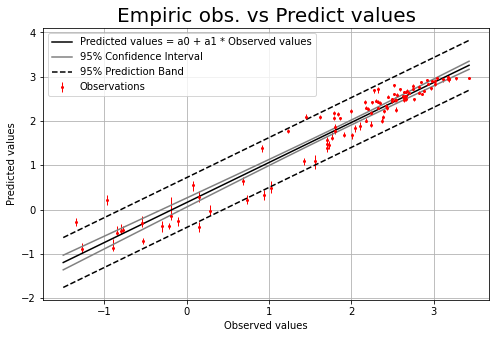

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.198, median - 0.197, CI - [0.168-0.224]

SHAP-values for: mf_chm_MAX: mean - 0.276, median - 0.278, CI - [0.251-0.304]

SHAP-values for: mf_chm_MEAN: mean - 0.473, median - 0.472, CI - [0.447-0.5]



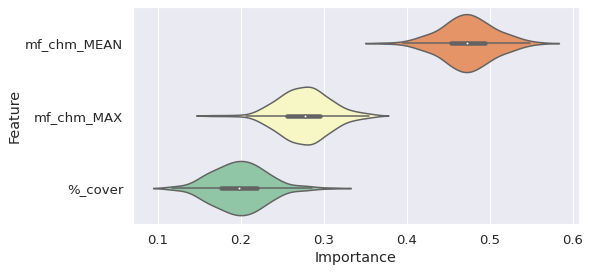

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MEAN', 'mf_chm_MAX', '%_cover'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 163.695, median: 171.0,
 pred. interval (P(0.025)-P(0.975)): 106.0-188.0, 
 conf. interval (p-value=0.95): 139.393-185.449 
***
Aggregate bias statistic: 
 mean: -0.019, median: -0.026,
 pred. interval (P(0.025)-P(0.975)): -0.139-0.136, 
 conf. interval (p-value=0.95): -0.077-0.042 
***
Aggregate RMSE statistic: 
 mean: 0.303, median: 0.294, pred. interval (P(0.025)-P(0.975)): 0.199-0.45, 
 conf. interval (p-value=0.95): 0.243-0.361 
***
Aggregate MSE statistic: 
 mean: 0.096, median: 0.087, pred. interval (P(0.025)-P(0.975)): 0.04-0.202, 
 conf. interval (p-value=0.95): 0.059-0.131 
***
Aggregate R^2 statistic: 
 mean: 0.927, median: 0.927, pred. interval (P(0.025)-P(0.975)): 0.871-0.976, 
 conf. interval (p-value=0.95): 0.907-0.951 
***
Aggregate bias(%) statistic: 
 mean: -0.795, median: -1.363, pred. interval (P(0.025)-P(0.975)): -7.6-8.35, 
 conf. interval (p-value=0.95): -4.04

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

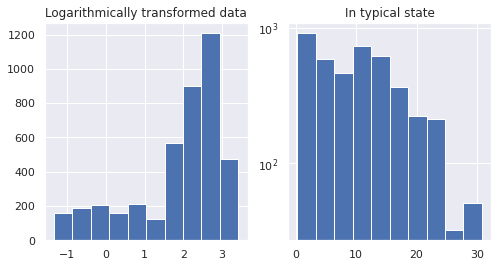

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1, 5, 10, 20, 30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

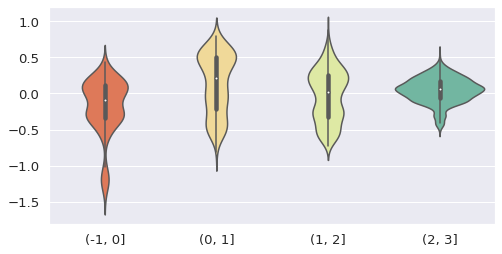

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

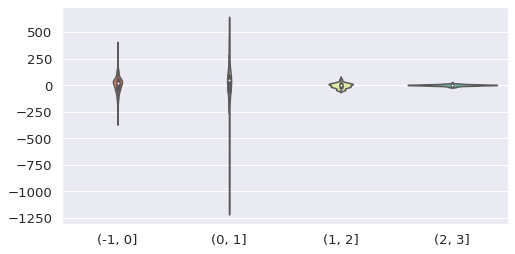

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

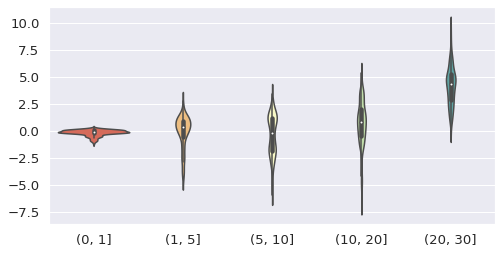

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

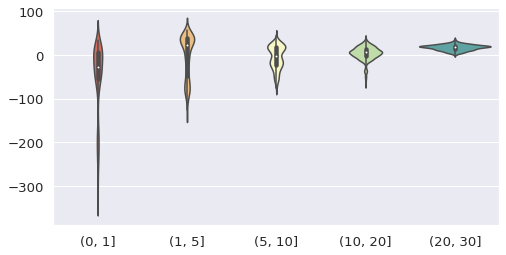

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.76553
[1]	validation_0-rmse:1.72066
[2]	validation_0-rmse:1.67424
[3]	validation_0-rmse:1.62878
[4]	validation_0-rmse:1.58684
[5]	validation_0-rmse:1.54590
[6]	validation_0-rmse:1.50594
[7]	validation_0-rmse:1.46747
[8]	validation_0-rmse:1.43480
[9]	validation_0-rmse:1.40110
[10]	validation_0-rmse:1.36464
[11]	validation_0-rmse:1.33070


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.29984
[13]	validation_0-rmse:1.26823
[14]	validation_0-rmse:1.23730
[15]	validation_0-rmse:1.20535
[16]	validation_0-rmse:1.17327
[17]	validation_0-rmse:1.14692
[18]	validation_0-rmse:1.11809
[19]	validation_0-rmse:1.09057
[20]	validation_0-rmse:1.06156
[21]	validation_0-rmse:1.03948
[22]	validation_0-rmse:1.01448
[23]	validation_0-rmse:0.99060
[24]	validation_0-rmse:0.96759
[25]	validation_0-rmse:0.94438
[26]	validation_0-rmse:0.92054
[27]	validation_0-rmse:0.89856
[28]	validation_0-rmse:0.87778
[29]	validation_0-rmse:0.85624
[30]	validation_0-rmse:0.83377
[31]	validation_0-rmse:0.81332
[32]	validation_0-rmse:0.79517
[33]	validation_0-rmse:0.77736
[34]	validation_0-rmse:0.75907
[35]	validation_0-rmse:0.74276
[36]	validation_0-rmse:0.72693
[37]	validation_0-rmse:0.71160
[38]	validation_0-rmse:0.69476
[39]	validation_0-rmse:0.67839
[40]	validation_0-rmse:0.66419
[41]	validation_0-rmse:0.64820
[42]	validation_0-rmse:0.63274
[43]	validation_0-rmse:0.62043
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 188


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

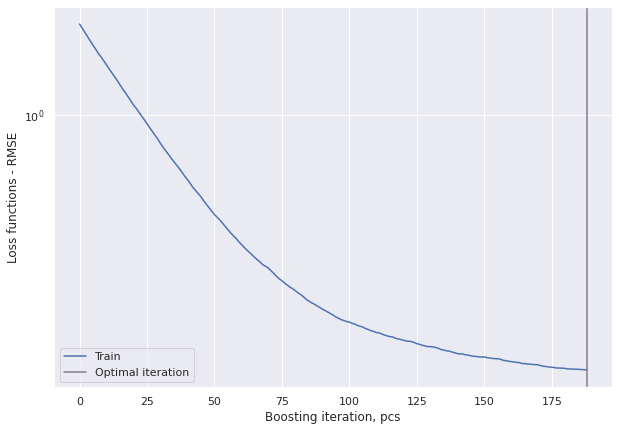

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.08
RMSE: 0.2
Relative RMSE(%):  10.771
MSE: 0.0
R square: 97.2%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.972
Uncertainty
a0: 0.101+/-0.035
a1: 0.945+/-0.016


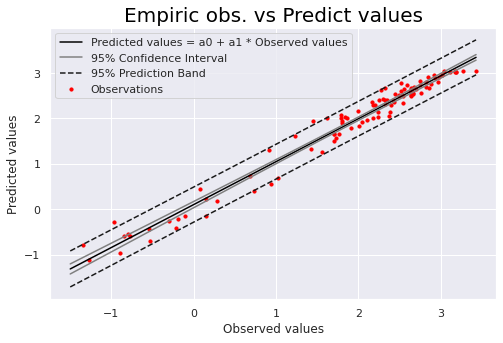

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

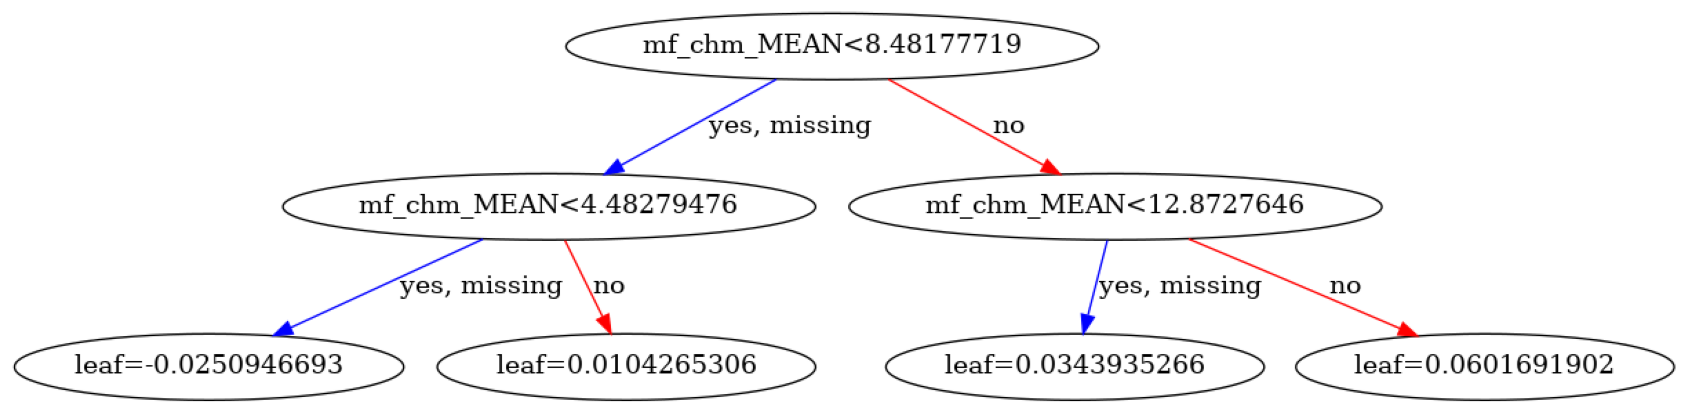

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

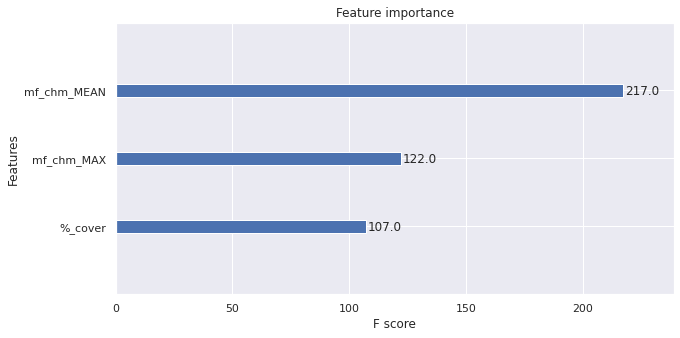

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

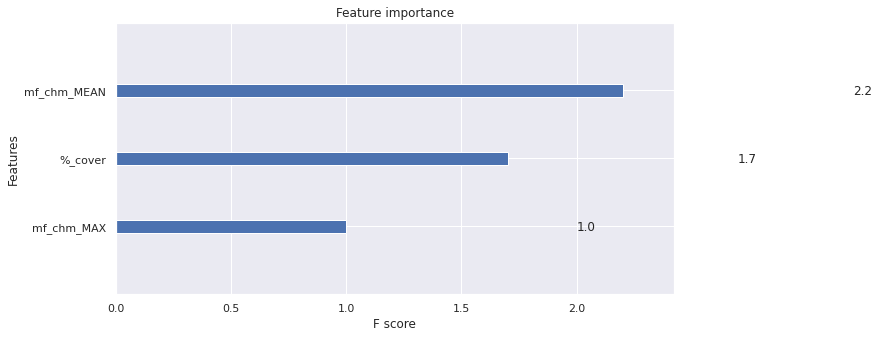

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

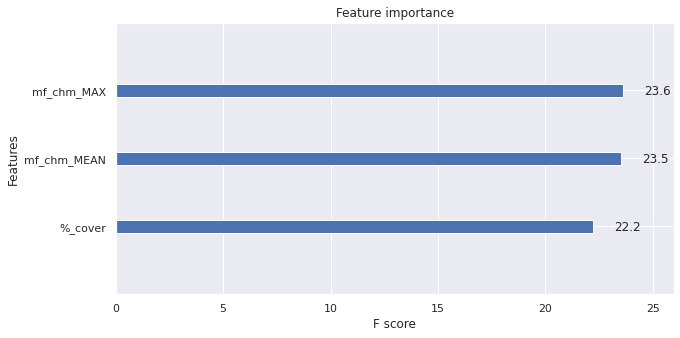

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


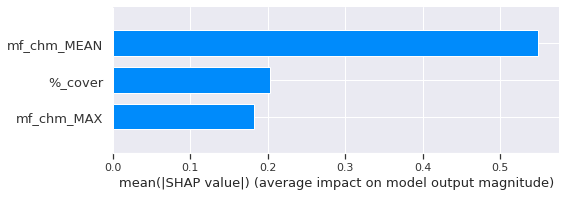

In [53]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

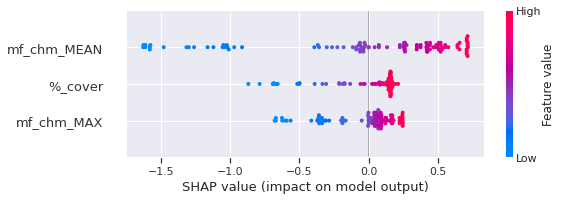

In [54]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

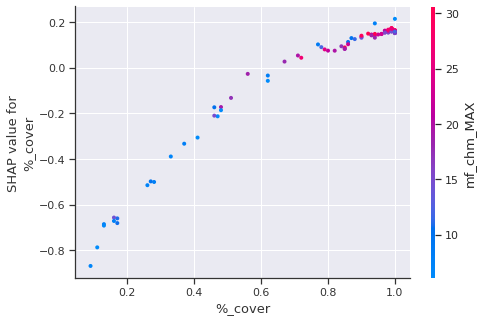

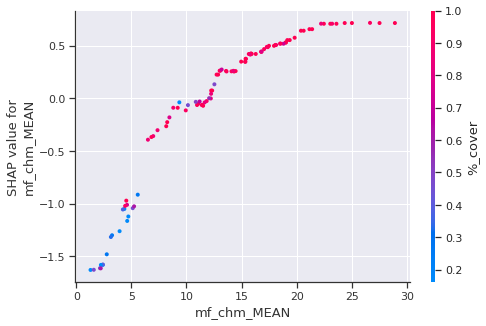

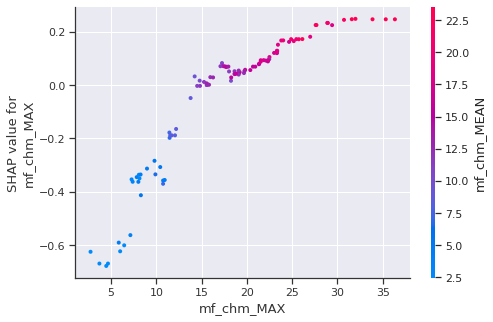

In [55]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/02_LN_Mstem_CHM_without_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/02_LN_Mstem_CHM_without_RGB_XGB_model.txt")